In [2]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import scipy.stats as stats
from datetime import timedelta

/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


- No sig differences in biomass in field corn or soy
- No sig differences in stand loss in soy
- Sig higher stand count in fung-only field corn

In [293]:
stand = pd.read_csv('Data/stand_loss.csv')
stand

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
0,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,1,V1,88.0,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,2,V1,89.0,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,3,V1,85.0,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,4,V1,90.0,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,5,V1,94.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1741,Paul Cerosaletti,CER_DEL_2,6/26/25,V3/V4,Field corn,Fung,5,V4,26.0,NaN
1742,Paul Cerosaletti,CER_DEL_2,6/26/25,V3/V4,Field corn,Fung,6,V4,21.0,NaN
1743,Paul Cerosaletti,CER_DEL_2,6/26/25,V3/V4,Field corn,Fung,7,V4,22.0,NaN
1744,Paul Cerosaletti,CER_DEL_2,6/26/25,V3/V4,Field corn,Fung,8,V4,28.0,NaN


In [290]:
biomass = pd.read_csv('Data/fresh_biomass.csv')
biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.7,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.8,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.4,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.6,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
949,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,5,V4,15,45.5,NaN,NaN
950,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,6,V4,15,47.8,NaN,NaN
951,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,7,V4,15,48.2,NaN,NaN
952,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,8,V4,15,42.2,NaN,NaN


In [5]:
deli_cup = pd.read_csv('Data/deli_cup.csv')
deli_cup

,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Seed Type,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,SCM Seed,Phorid Seed,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes
0,25_D_1181,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,14.0,1,0,0,0,1,3,0,YES,YES,Y,294,NaN
1,25_D_1182,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,14.0,0,0,0,0,0,0,0,NO,NO,Y,293,NaN
2,25_D_1183,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,17.0,2,0,0,0,0,0,0,NO,NO,Y,380,NaN
3,25_D_1184,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,15.0,0,0,0,0,0,0,0,NO,NO,Y,308,NaN
4,25_D_1185,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,15.0,2,0,0,0,0,0,0,NO,NO,Y,51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,25_D_2513,DELI,R,ZUE_VOT,FUNG,7/4/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,712,NaN
982,25_D_2514,DELI,R,ZUE_VOT,FUNG,7/3/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,710,NaN
983,25_D_2515,DELI,R,ZUE_VOT,FUNG,7/8/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,716,NaN
984,25_D_2516,DELI,R,ZUE_VOT,FUNG,7/6/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,714,NaN


In [6]:
snap_yield = pd.read_csv('Data/snap_bean_yield.csv')
snap_yield

,Data Collector,Field ID,Date,Sampling period,Treatment,Section,Number of Pods,Total weight (kg),Number of Plants,Notes
0,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,1,856,1.40,110,NaN
1,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,2,783,1.50,115,NaN
2,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,3,896,1.76,114,NaN
3,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,4,907,1.86,96,NaN
4,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,5,644,0.94,106,NaN
5,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,6,483,0.94,104,NaN
6,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Fung,1,416,1.04,43,NaN
7,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Fung,2,661,1.42,69,NaN
8,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Fung,3,441,0.64,59,NaN
9,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Fung,4,370,0.75,61,NaN


In [7]:
sweet_corn_yield = pd.read_csv('Data/sweet_corn_yield.csv')
sweet_corn_yield

,Data Collector,Field ID,Date,Sampling period,Treatment,Section,Ears,Total weight (kg),Number of Plants,Notes
0,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,1,19,9.98,27,NaN
1,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,2,16,6.18,18,NaN
2,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,3,16,7.32,15,NaN
3,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,4,21,9.64,19,NaN
4,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,5,18,8.10,20,NaN
5,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,6,19,8.34,18,NaN
6,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Fung,1,22,7.28,22,NaN
7,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Fung,2,21,7.56,24,NaN
8,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Fung,3,18,5.72,21,NaN
9,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Fung,4,18,5.46,21,NaN


In [8]:
deli_cup['Total SCM'] = deli_cup['SCM Larvae Sum'] + deli_cup['SCM Pupae Sum']
field_deli_cup = deli_cup[(deli_cup['Seed Type'] != 'SWEET CORN') & (deli_cup['Seed Type'] != 'SNAP')]

field_deli_cup['Treatment'] = field_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
field_deli_cup['Seed Type'] = field_deli_cup['Seed Type'].replace({'FIELD CORN': 'Field corn', 'SOY': 'Soybean'})
field_deli_cup = field_deli_cup.rename(columns={'Seed Type': 'Crop'})

field_deli_cup['Avg SCM'] = field_deli_cup['Total SCM'] / field_deli_cup['Number Seeds']


field_deli_cup

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/3951772869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_deli_cup['Treatment'] = field_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/3951772869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_deli_cup['Seed Type'] = field_deli_cup['Seed Type'].replace({'FIELD CORN': 'Field corn', 'SOY': 'Soybean'})


,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Crop,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes,Total SCM,Avg SCM
0,25_D_1181,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,14.0,1,0,...,1,3,0,YES,YES,Y,294,NaN,1,0.071429
1,25_D_1182,DELI,R,CER_DEL_1,Untreated,5/28/25,Field corn,14.0,0,0,...,0,0,0,NO,NO,Y,293,NaN,0,0.000000
2,25_D_1183,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,17.0,2,0,...,0,0,0,NO,NO,Y,380,NaN,2,0.117647
3,25_D_1184,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,308,NaN,0,0.000000
4,25_D_1185,DELI,R,CER_DEL_1,Untreated,5/28/25,Field corn,15.0,2,0,...,0,0,0,NO,NO,Y,51,NaN,2,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25_D_1158,DELI,R,STA_WOO,Untreated,5/23/25,Field corn,15.0,1,1,...,0,1,1,YES,NO,Y,15,NaN,2,0.133333
946,25_D_1159,DELI,R,STA_WOO,Treated,5/23/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,296,NaN,0,0.000000
947,25_D_1160,DELI,R,STA_WOO,Treated,5/23/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,295,NaN,0,0.000000
948,25_D_1161,DELI,R,STA_WOO,Untreated,5/23/25,Field corn,15.0,3,0,...,1,0,1,NO,NO,Y,3,NaN,3,0.200000


Text(0, 0.5, 'Average SCM/seed')

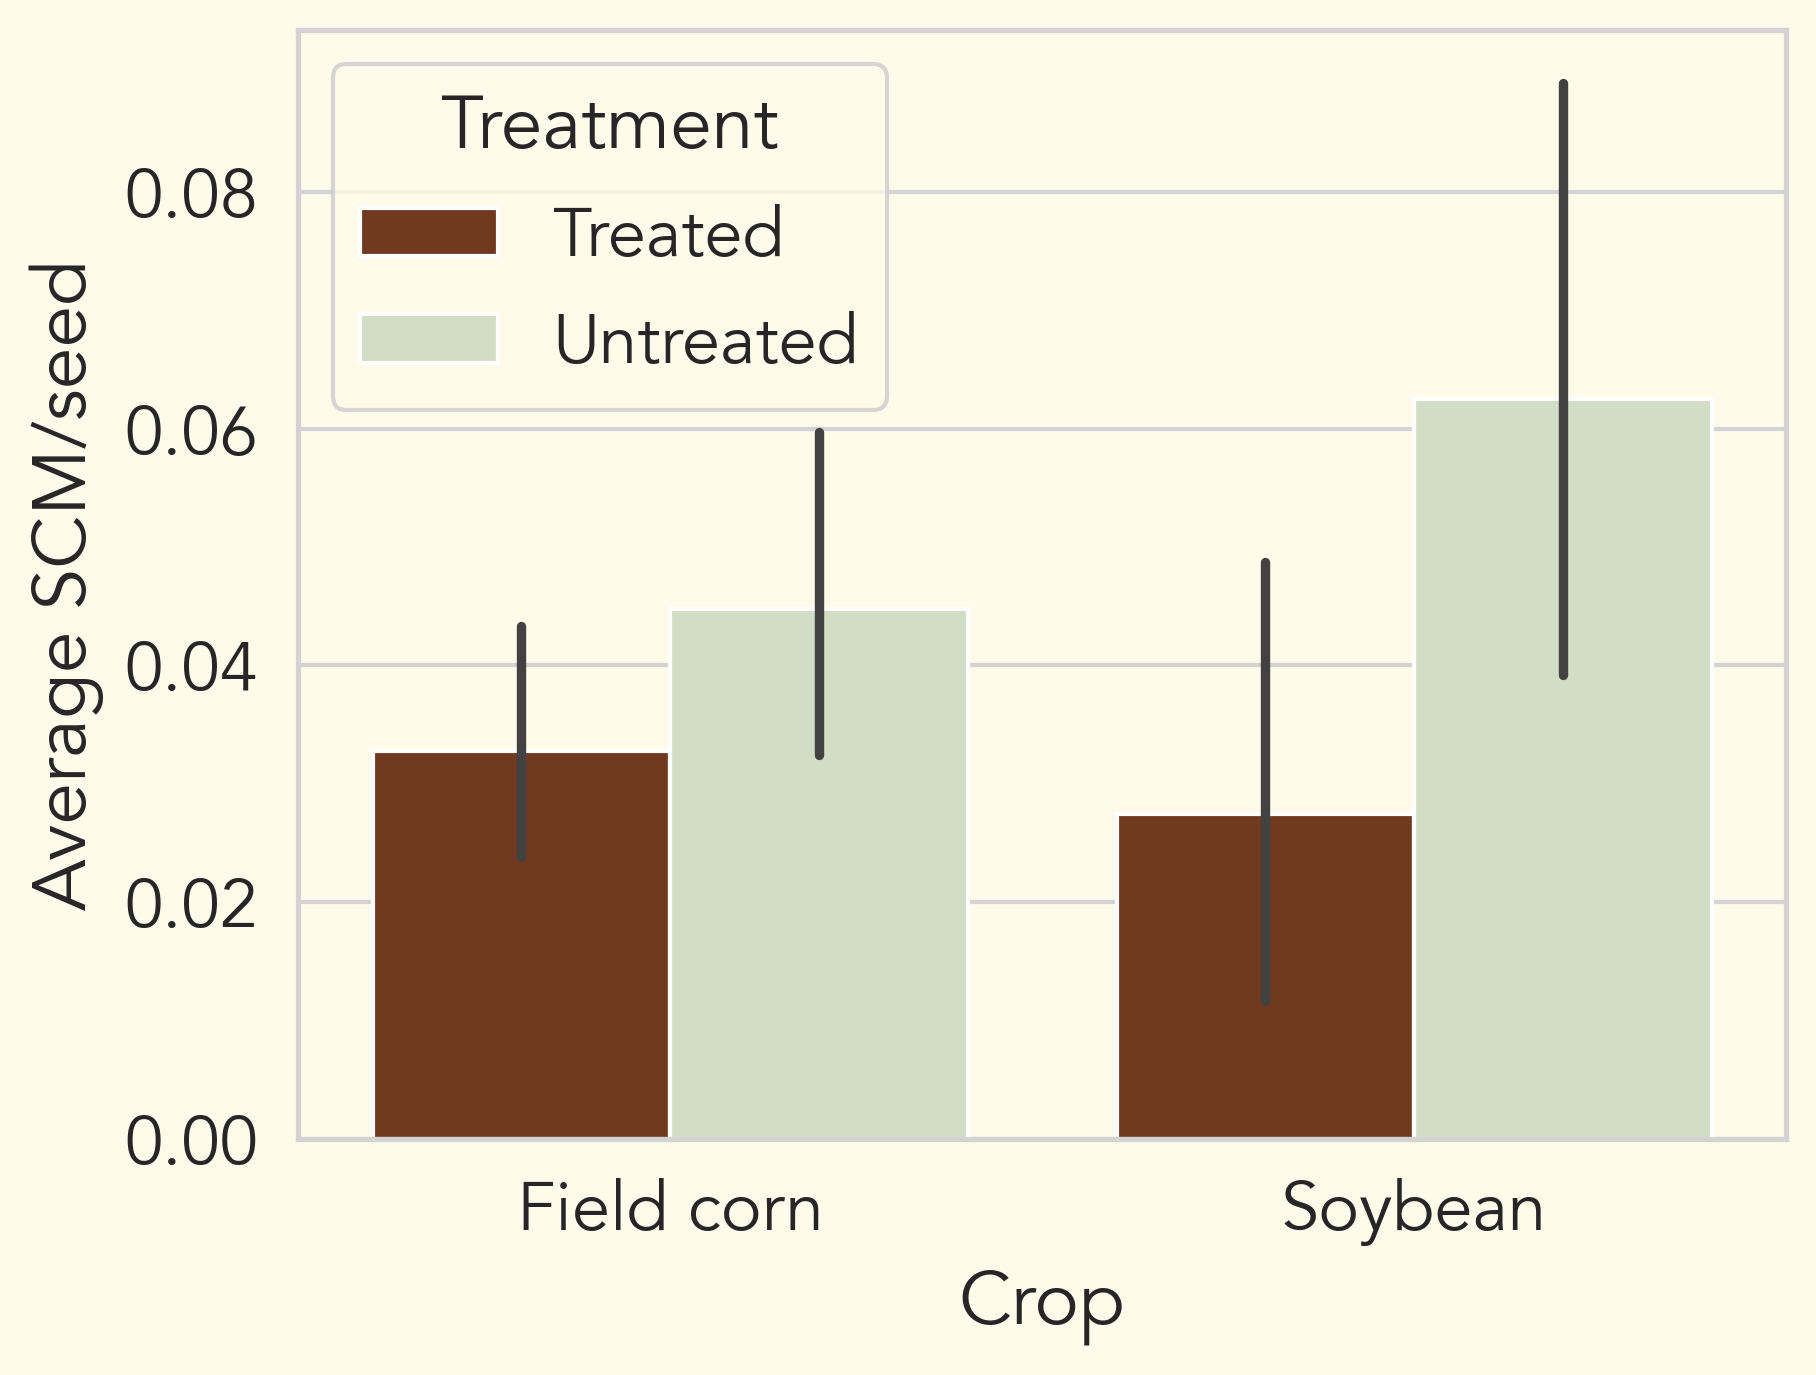

In [145]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

#sns.swarmplot(x="Crop", y="Avg SCM", data=field_deli_cup, color="black", hue = 'Treatment', dodge = True, size=2, alpha=0.7, hue_order=hue_order)

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
sns.barplot(data = field_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette, hue_order=hue_order)
plt.ylabel('Average SCM/seed')

In [10]:
veg_deli_cup = deli_cup[(deli_cup['Seed Type'] != 'FIELD CORN') & (deli_cup['Seed Type'] != 'SOY')]

veg_deli_cup['Treatment'] = veg_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
veg_deli_cup['Seed Type'] = veg_deli_cup['Seed Type'].replace({'SWEET CORN': 'Sweet corn', 'SNAP': 'Snap bean'})
veg_deli_cup = veg_deli_cup.rename(columns={'Seed Type': 'Crop'})

veg_deli_cup['Avg SCM'] = veg_deli_cup['Total SCM'] / veg_deli_cup['Number Seeds']


veg_deli_cup

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1349109760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_deli_cup['Treatment'] = veg_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1349109760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_deli_cup['Seed Type'] = veg_deli_cup['Seed Type'].replace({'SWEET CORN': 'Sweet corn', 'SNAP': 'Snap bean'})


,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Crop,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes,Total SCM,Avg SCM
233,25_D_2392,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,15.0,0,0,...,0,0,0,NO,NO,Y,NaN,NaN,0,0.0
234,25_D_2393,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,15.0,0,0,...,0,0,0,NO,NO,Y,NaN,NaN,0,0.0
235,25_D_2394,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,15.0,0,0,...,0,0,0,NO,NO,Y,NaN,NaN,0,0.0
236,25_D_2395,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,15.0,0,0,...,0,0,0,NO,NO,Y,NaN,NaN,0,0.0
237,25_D_2396,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,17.0,0,0,...,0,0,0,NO,YES,Y,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,25_D_2513,DELI,R,ZUE_VOT,Untreated,7/4/25,Snap bean,15.0,0,0,...,0,0,0,NO,NO,Y,712,NaN,0,0.0
982,25_D_2514,DELI,R,ZUE_VOT,Untreated,7/3/25,Snap bean,15.0,0,0,...,0,0,0,NO,NO,Y,710,NaN,0,0.0
983,25_D_2515,DELI,R,ZUE_VOT,Untreated,7/8/25,Snap bean,15.0,0,0,...,0,0,0,NO,NO,Y,716,NaN,0,0.0
984,25_D_2516,DELI,R,ZUE_VOT,Untreated,7/6/25,Snap bean,15.0,0,0,...,0,0,0,NO,NO,Y,714,NaN,0,0.0


Text(0, 0.5, 'Average SCM/seed')

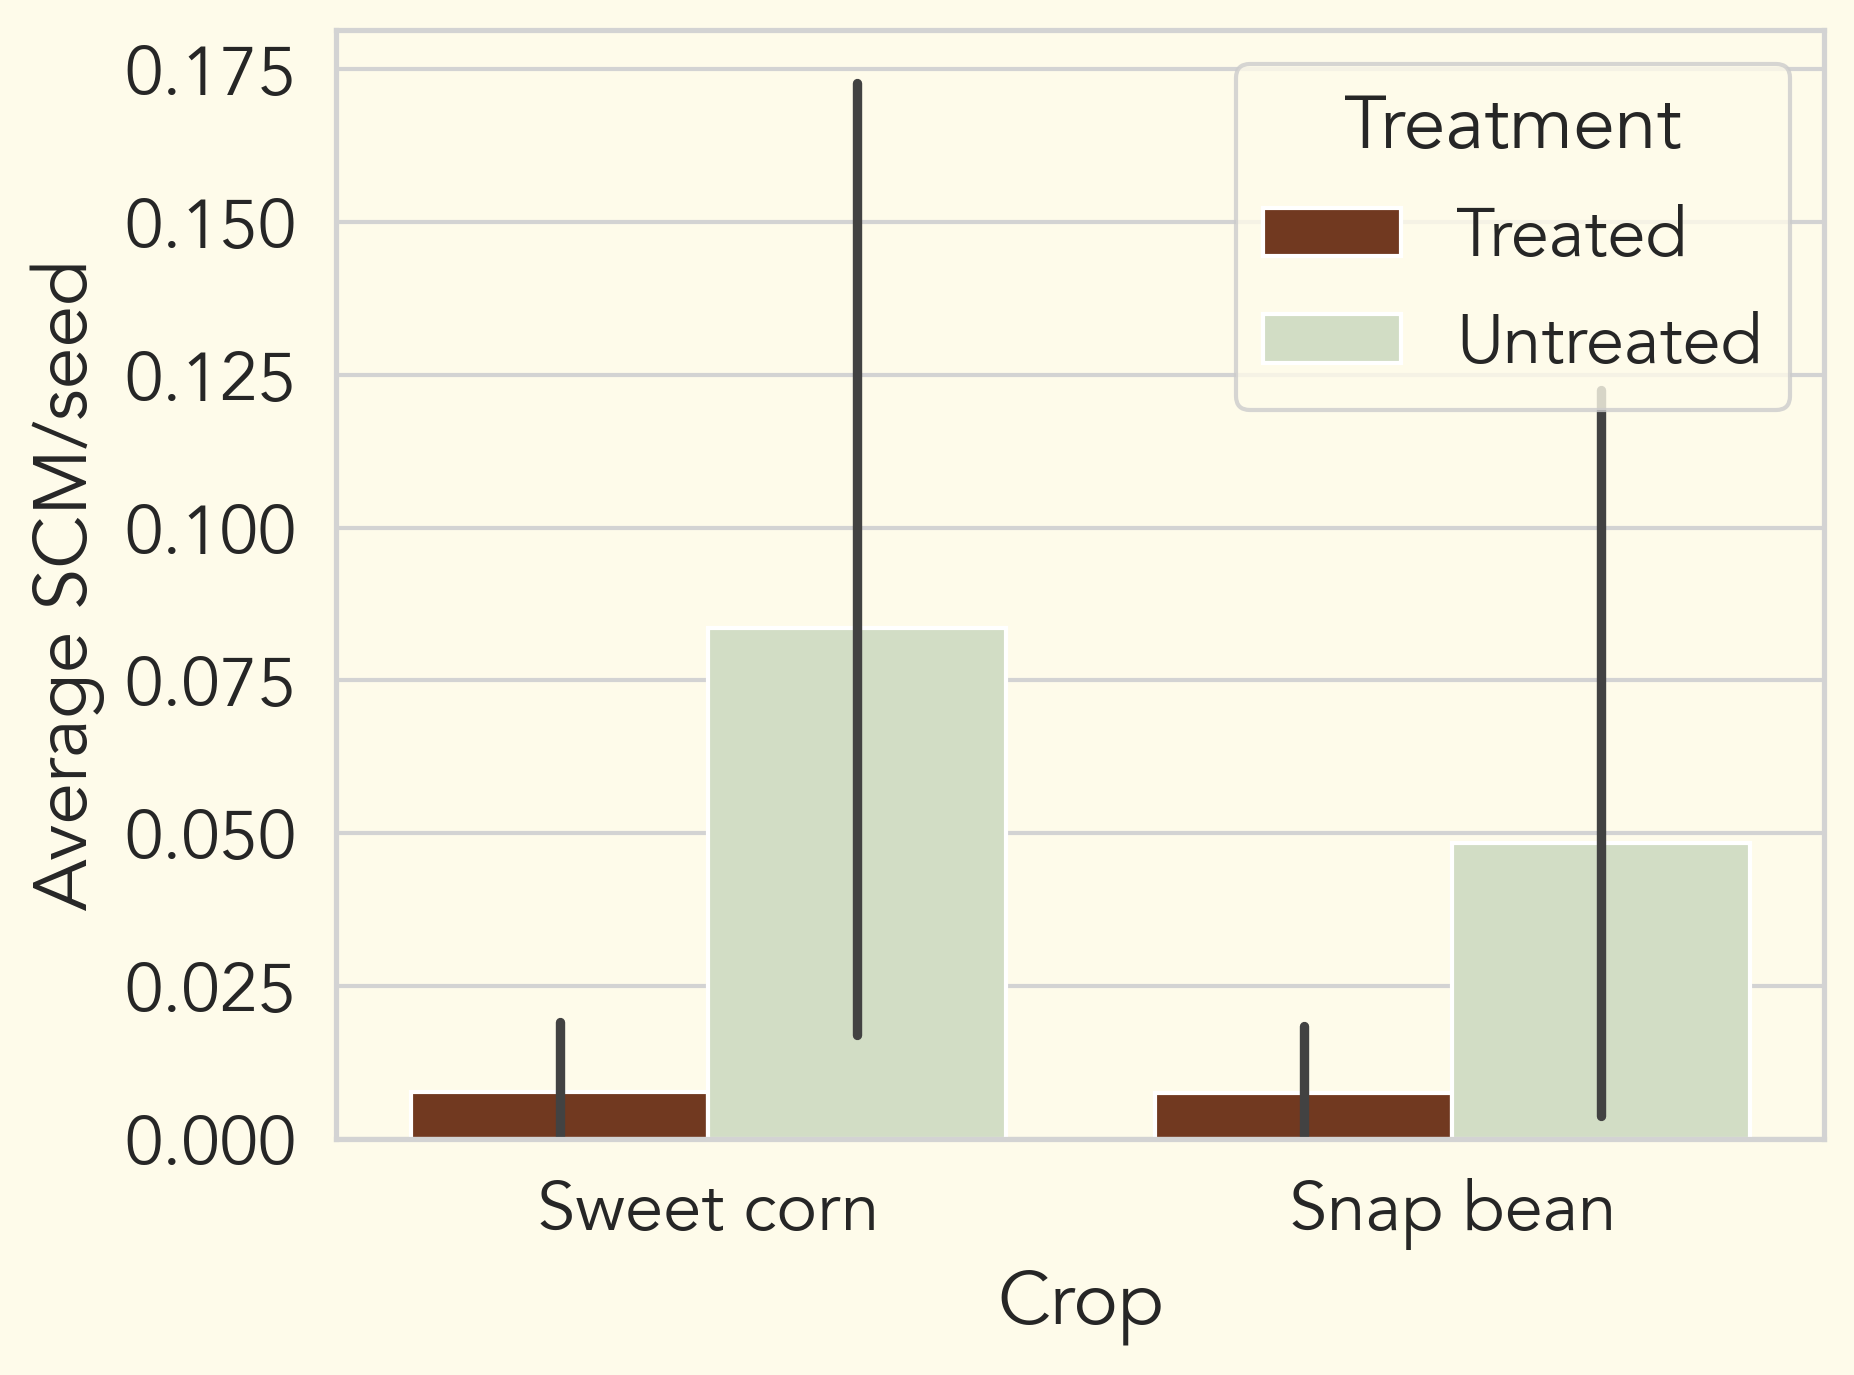

In [11]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = veg_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette, hue_order=hue_order)
#sns.swarmplot(x="Crop", y="Avg SCM", data=veg_deli_cup, color="black", hue = 'Treatment', dodge = True, size=2, alpha=0.7, hue_order=hue_order)
sns.move_legend(ax, "upper right")
plt.ylabel('Average SCM/seed')

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[0:2], labels[0:2])


In [12]:
corn_deli = field_deli_cup[field_deli_cup['Crop'] == 'Field corn']
soy_deli = field_deli_cup[field_deli_cup['Crop'] == 'Soybean']


In [13]:
sweet_corn_deli = veg_deli_cup[veg_deli_cup['Crop'] == 'Sweet corn']
snap_deli = veg_deli_cup[veg_deli_cup['Crop'] == 'Snap bean']


In [14]:
t1 = corn_deli.loc[corn_deli['Treatment'] == 'Untreated'].groupby('Field ID')['Avg SCM'].mean()
t2 = corn_deli.loc[corn_deli['Treatment'] == 'Treated'].groupby('Field ID')['Avg SCM'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.2063759627417392, pvalue=0.2365160321667272, df=32)

In [15]:
t1 = sweet_corn_deli.loc[sweet_corn_deli['Treatment'] == 'Untreated'].groupby('Field ID')['Avg SCM'].mean()
t2 = sweet_corn_deli.loc[sweet_corn_deli['Treatment'] == 'Treated'].groupby('Field ID')['Avg SCM'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.0314699320028493, pvalue=0.37819316275215104, df=3)

In [16]:
t1 = snap_deli.loc[snap_deli['Treatment'] == 'Untreated'].groupby('Field ID')['Avg SCM'].mean()
t2 = snap_deli.loc[snap_deli['Treatment'] == 'Treated'].groupby('Field ID')['Avg SCM'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.0, pvalue=0.49999999999999956, df=1)

In [17]:
np.mean(corn_deli['Avg SCM'])

0.038801083620261294

In [18]:
np.mean(soy_deli['Avg SCM'])

0.04490340985697022

In [294]:
field_crop_stand = stand[(stand['Crop'] != 'Sweet corn') & (stand['Crop'] != 'Snap bean')]
field_crop_stand

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
0,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,1,V1,88.0,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,2,V1,89.0,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,3,V1,85.0,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,4,V1,90.0,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/9/25,VE/V1,Soybean,Neonic,5,V1,94.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1741,Paul Cerosaletti,CER_DEL_2,6/26/25,V3/V4,Field corn,Fung,5,V4,26.0,NaN
1742,Paul Cerosaletti,CER_DEL_2,6/26/25,V3/V4,Field corn,Fung,6,V4,21.0,NaN
1743,Paul Cerosaletti,CER_DEL_2,6/26/25,V3/V4,Field corn,Fung,7,V4,22.0,NaN
1744,Paul Cerosaletti,CER_DEL_2,6/26/25,V3/V4,Field corn,Fung,8,V4,28.0,NaN


In [20]:
veg_crop_stand = stand[(stand['Crop'] != 'Field corn') & (stand['Crop'] != 'Soybean')]
veg_crop_stand['Treatment'] = veg_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})

veg_crop_stand

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/803008222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_crop_stand['Treatment'] = veg_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
648,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,1,VE/V1,22.0,NaN
649,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,2,VE/V1,22.0,NaN
650,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,3,VE/V1,18.0,NaN
651,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,4,VE/V1,19.0,NaN
652,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,5,VE/V1,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1111,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,5,V2/V3,65.0,NaN
1112,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,6,V2/V3,75.0,NaN
1113,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,7,V2/V3,80.0,NaN
1114,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,8,V2/V3,85.0,NaN


In [21]:
sweet_corn_stand = veg_crop_stand[veg_crop_stand['Crop'] == 'Sweet corn']
snap_stand = veg_crop_stand[veg_crop_stand['Crop'] == 'Snap bean']


In [22]:
t1 = sweet_corn_stand.loc[sweet_corn_stand['Treatment'] == 'Untreated'].groupby('Field ID')['Stand count'].mean()
t2 = sweet_corn_stand.loc[sweet_corn_stand['Treatment'] == 'Treated'].groupby('Field ID')['Stand count'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=2.0192031121345106, pvalue=0.13676140865767591, df=3)

In [23]:
t1 = snap_stand.loc[snap_stand['Treatment'] == 'Untreated'].groupby('Field ID')['Stand count'].mean()
t2 = snap_stand.loc[snap_stand['Treatment'] == 'Treated'].groupby('Field ID')['Stand count'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.13646055437100207, pvalue=0.9136598048070722, df=1)

Text(0, 0.5, 'Stand count')

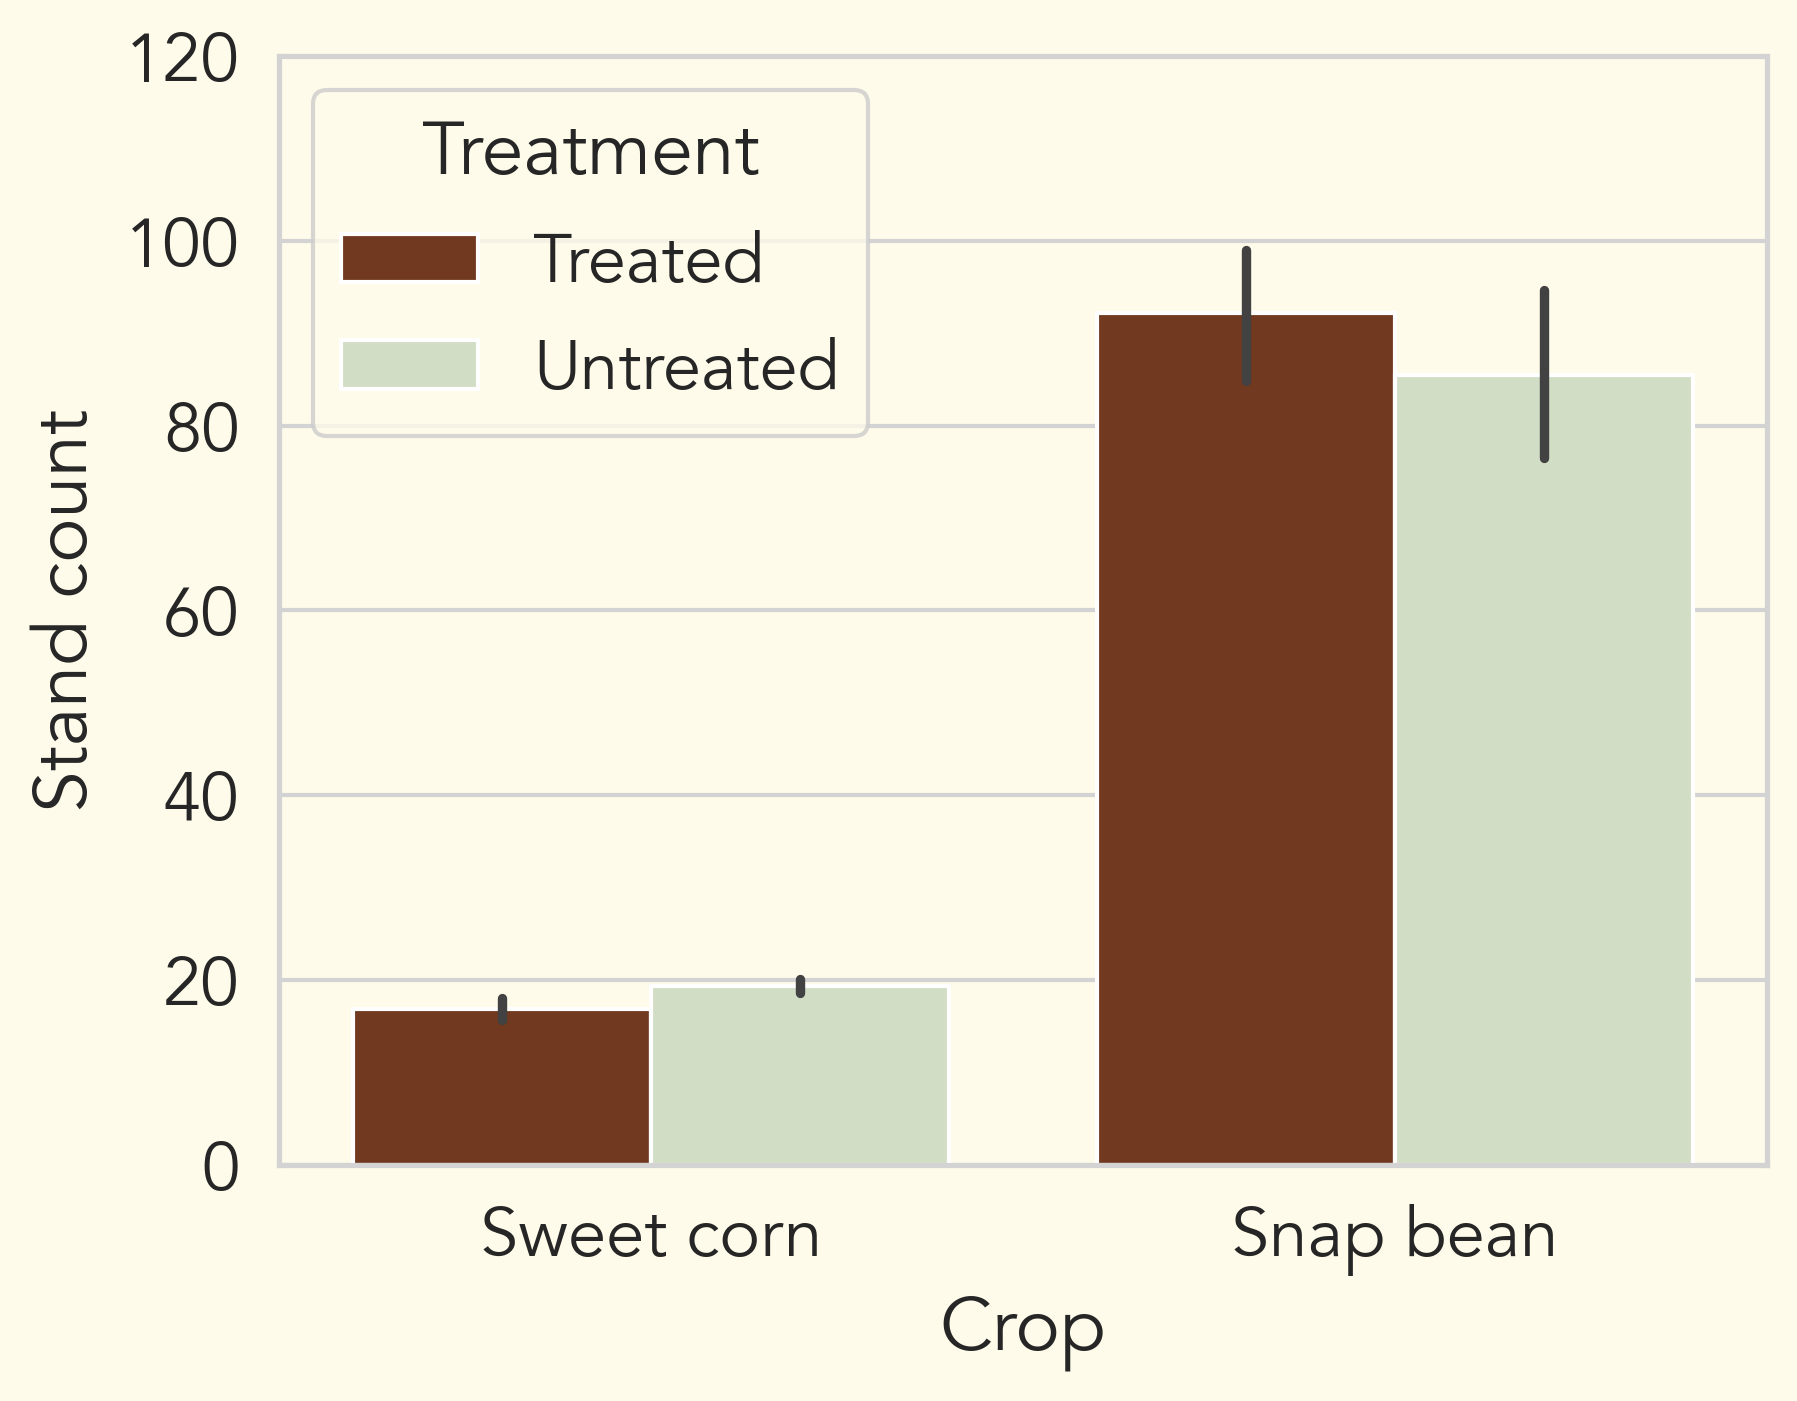

In [24]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = veg_crop_stand, x = 'Crop', y = 'Stand count', hue = 'Treatment', palette=palette, hue_order=hue_order)
ax.set_ylim(0, 120)
plt.ylabel('Stand count')

In [25]:
len(field_crop_stand.loc[field_crop_stand['Crop'] == 'Soybean']['Field ID'].unique())

11

In [26]:
len(field_crop_stand.loc[field_crop_stand['Crop'] == 'Field corn']['Field ID'].unique())

18

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/945512122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


(0.0, 120.0)

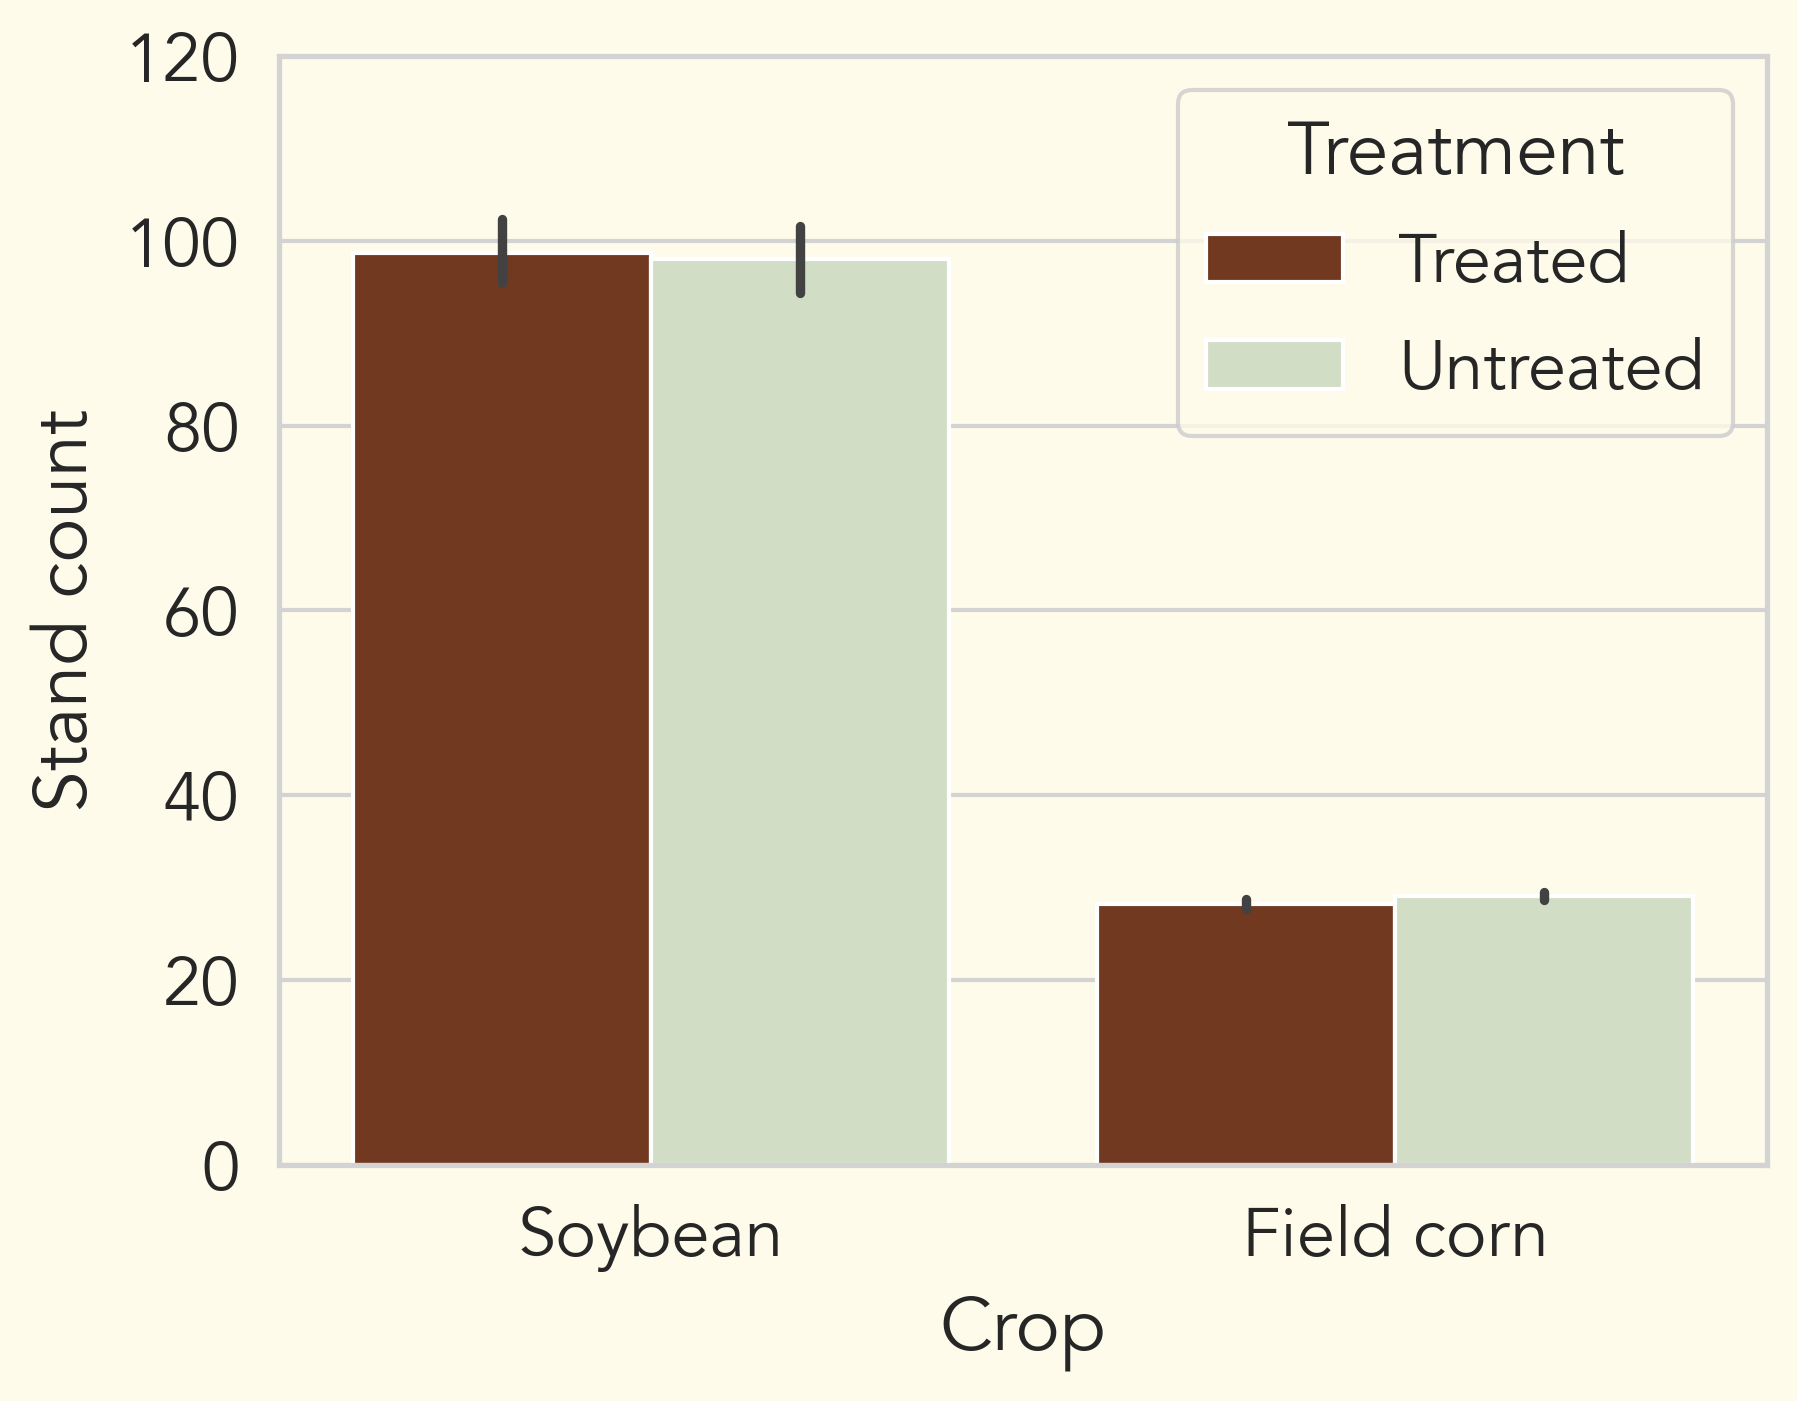

In [295]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
sns.barplot(data = field_crop_stand, x = 'Crop', y = 'Stand count', hue = 'Treatment', palette=palette, hue_order=hue_order)
plt.ylim(0, 120)


In [296]:
corn_stand = stand[stand['Crop'] == 'Field corn']
soy_stand = stand[stand['Crop'] == 'Soybean']


In [297]:
t1 = corn_stand.loc[corn_stand['Treatment'] == 'Fung'].groupby('Field ID')['Stand count'].mean()
t2 = corn_stand.loc[corn_stand['Treatment'] == 'Neonic'].groupby('Field ID')['Stand count'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.3185430953207606, pvalue=0.1966815718833915, df=32)

In [298]:
t1 = soy_stand.loc[soy_stand['Treatment'] == 'Fung'].groupby('Field ID')['Stand count'].mean()
t2 = soy_stand.loc[soy_stand['Treatment'] == 'Neonic'].groupby('Field ID')['Stand count'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.6540498470146981, pvalue=0.5236787749722621, df=14)

<Axes: xlabel='Treatment', ylabel='Stand count'>

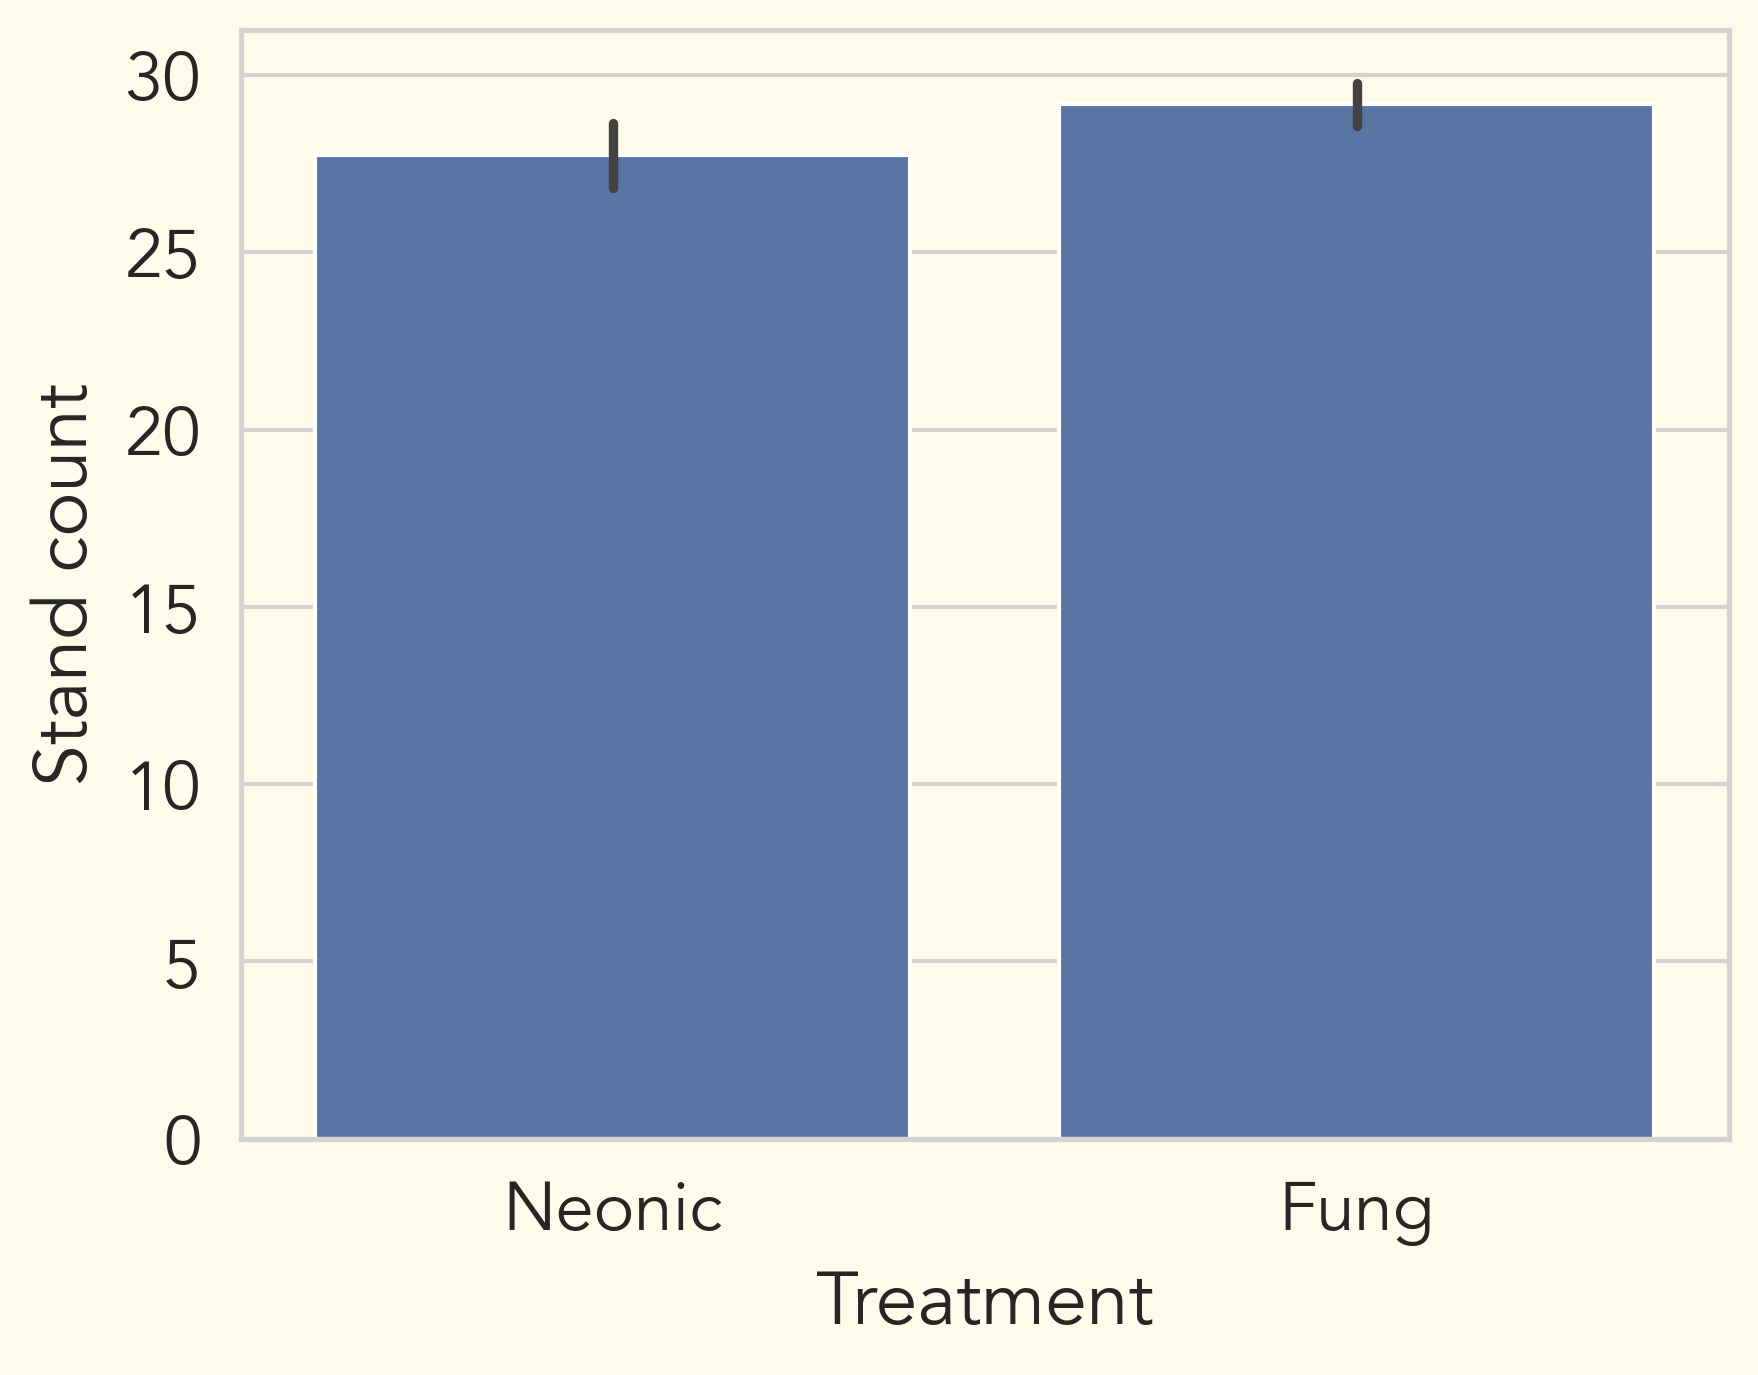

In [31]:
sns.barplot(data = corn_stand, x = 'Treatment', y = 'Stand count')

<Axes: xlabel='Treatment', ylabel='Total weight (g)'>

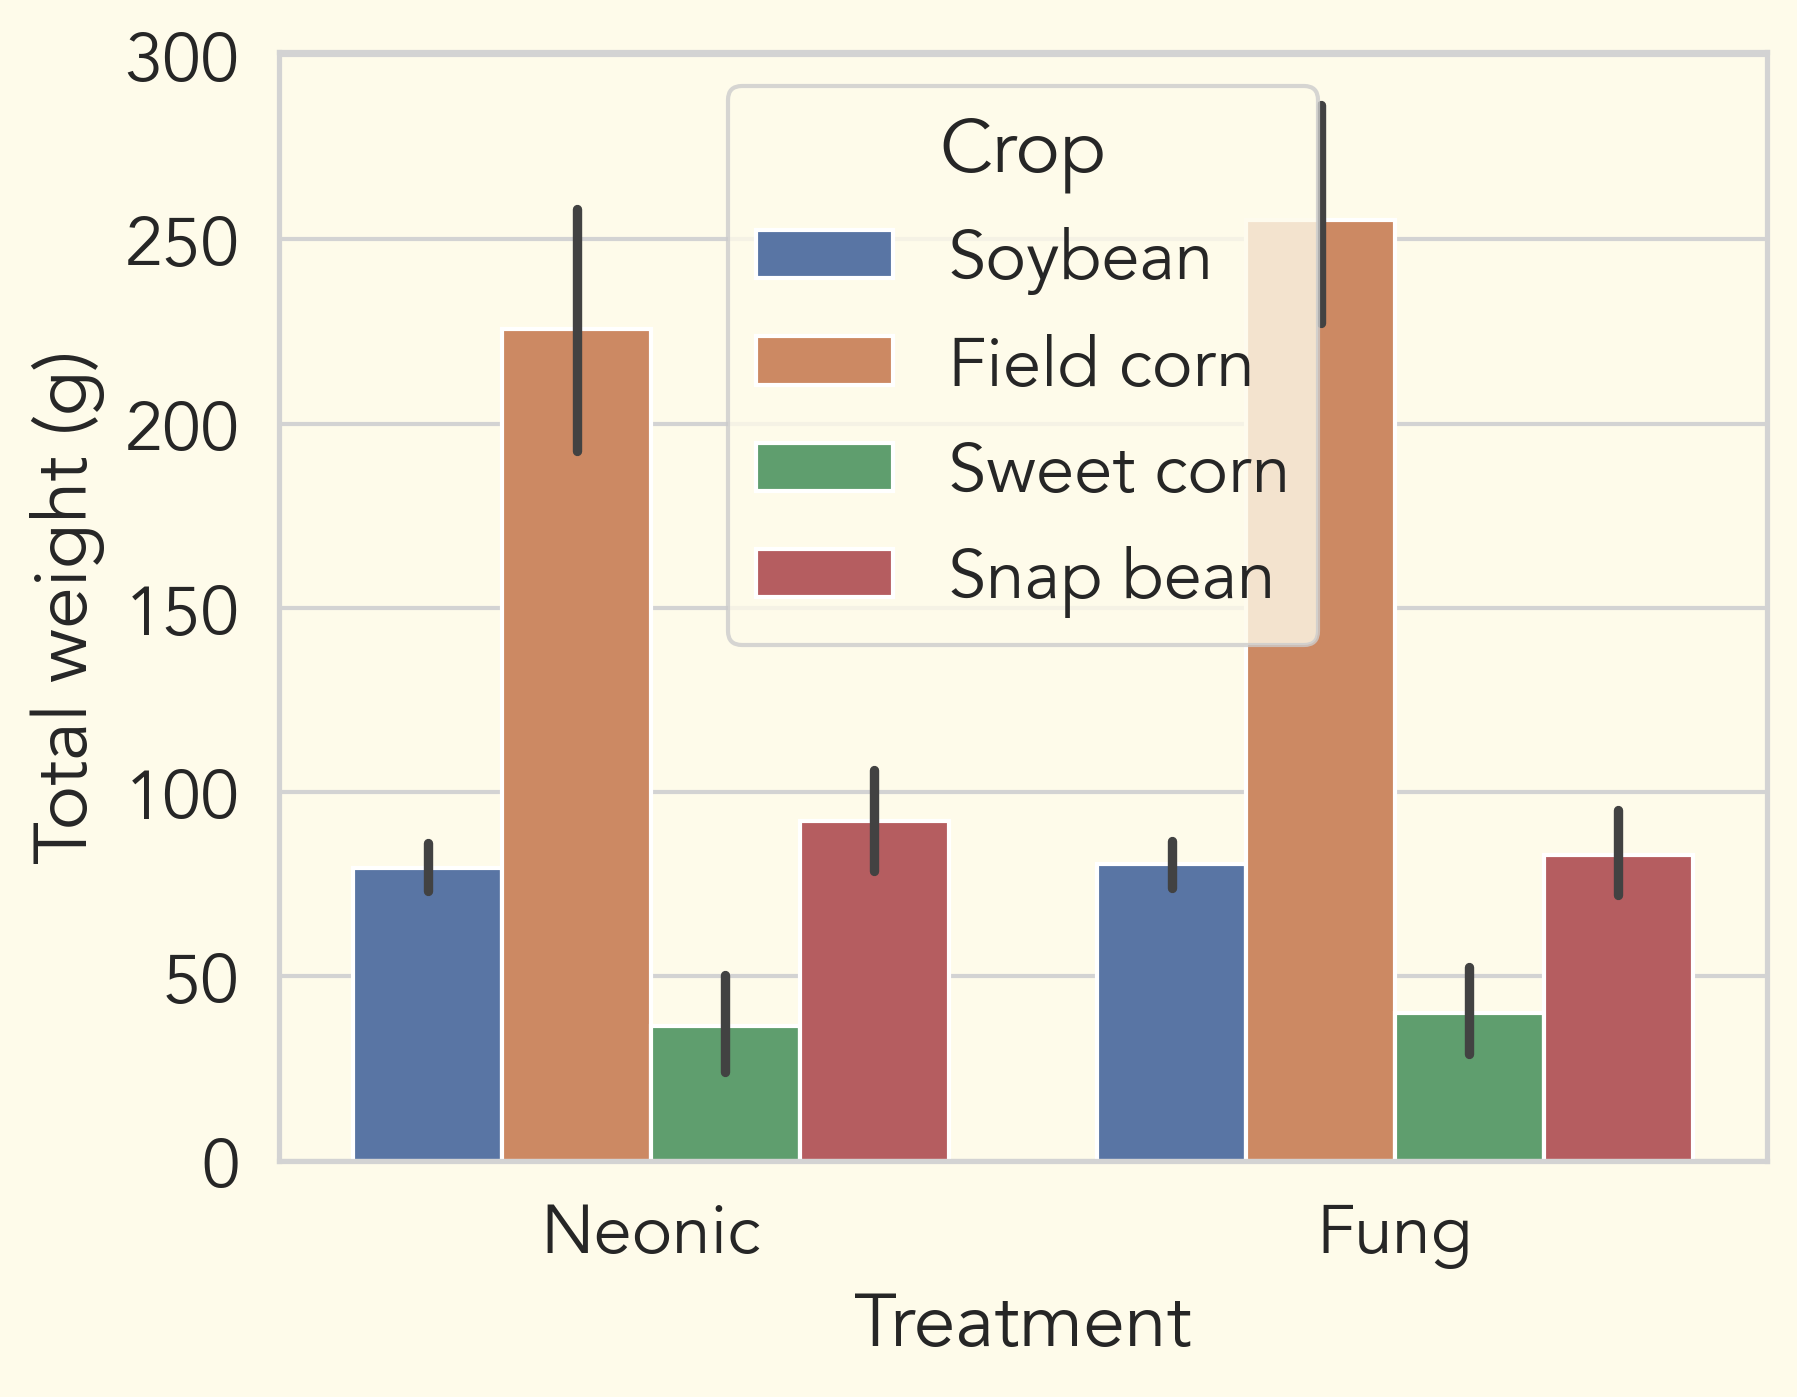

In [32]:
sns.barplot(data = biomass, x = 'Treatment', y = 'Total weight (g)', hue = 'Crop')

In [299]:
corn_biomass = biomass[biomass['Crop'] == 'Field corn']
soy_biomass = biomass[biomass['Crop'] == 'Soybean']


In [300]:
t1 = corn_biomass.loc[corn_biomass['Treatment'] == 'Fung'].groupby('Field ID')['Total weight (g)'].mean()
t2 = corn_biomass.loc[corn_biomass['Treatment'] == 'Neonic'].groupby('Field ID')['Total weight (g)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=2.3768358437898853, pvalue=0.02381836779011994, df=31)

In [301]:
t1 = soy_biomass.loc[soy_biomass['Treatment'] == 'Fung'].groupby('Field ID')['Total weight (g)'].mean()
t2 = soy_biomass.loc[soy_biomass['Treatment'] == 'Neonic'].groupby('Field ID')['Total weight (g)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=0.04934992157015034, pvalue=0.9613375835486607, df=14)

In [302]:
field_crop_biomass = biomass[(biomass['Crop'] != 'Sweet corn') & (biomass['Crop'] != 'Snap bean')]
field_crop_biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.7,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.8,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.4,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.6,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
949,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,5,V4,15,45.5,NaN,NaN
950,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,6,V4,15,47.8,NaN,NaN
951,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,7,V4,15,48.2,NaN,NaN
952,Erik Smith,SMI_HOF_2,7/8/2025,V3/V4,Soybean,Fung,8,V4,15,42.2,NaN,NaN


In [37]:
len(field_crop_biomass.loc[field_crop_biomass['Crop'] == 'Soybean']['Field ID'].unique())

11

In [38]:
len(field_crop_biomass.loc[field_crop_biomass['Crop'] == 'Field corn']['Field ID'].unique())

18

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1454366004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_biomass['Treatment'] = field_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1454366004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_biomass['Avg weight'] = field_crop_biomass['Total weight (g)'] / field_crop_biomass['Number of plants']


Text(0, 0.5, 'Average weight/plant (g)')

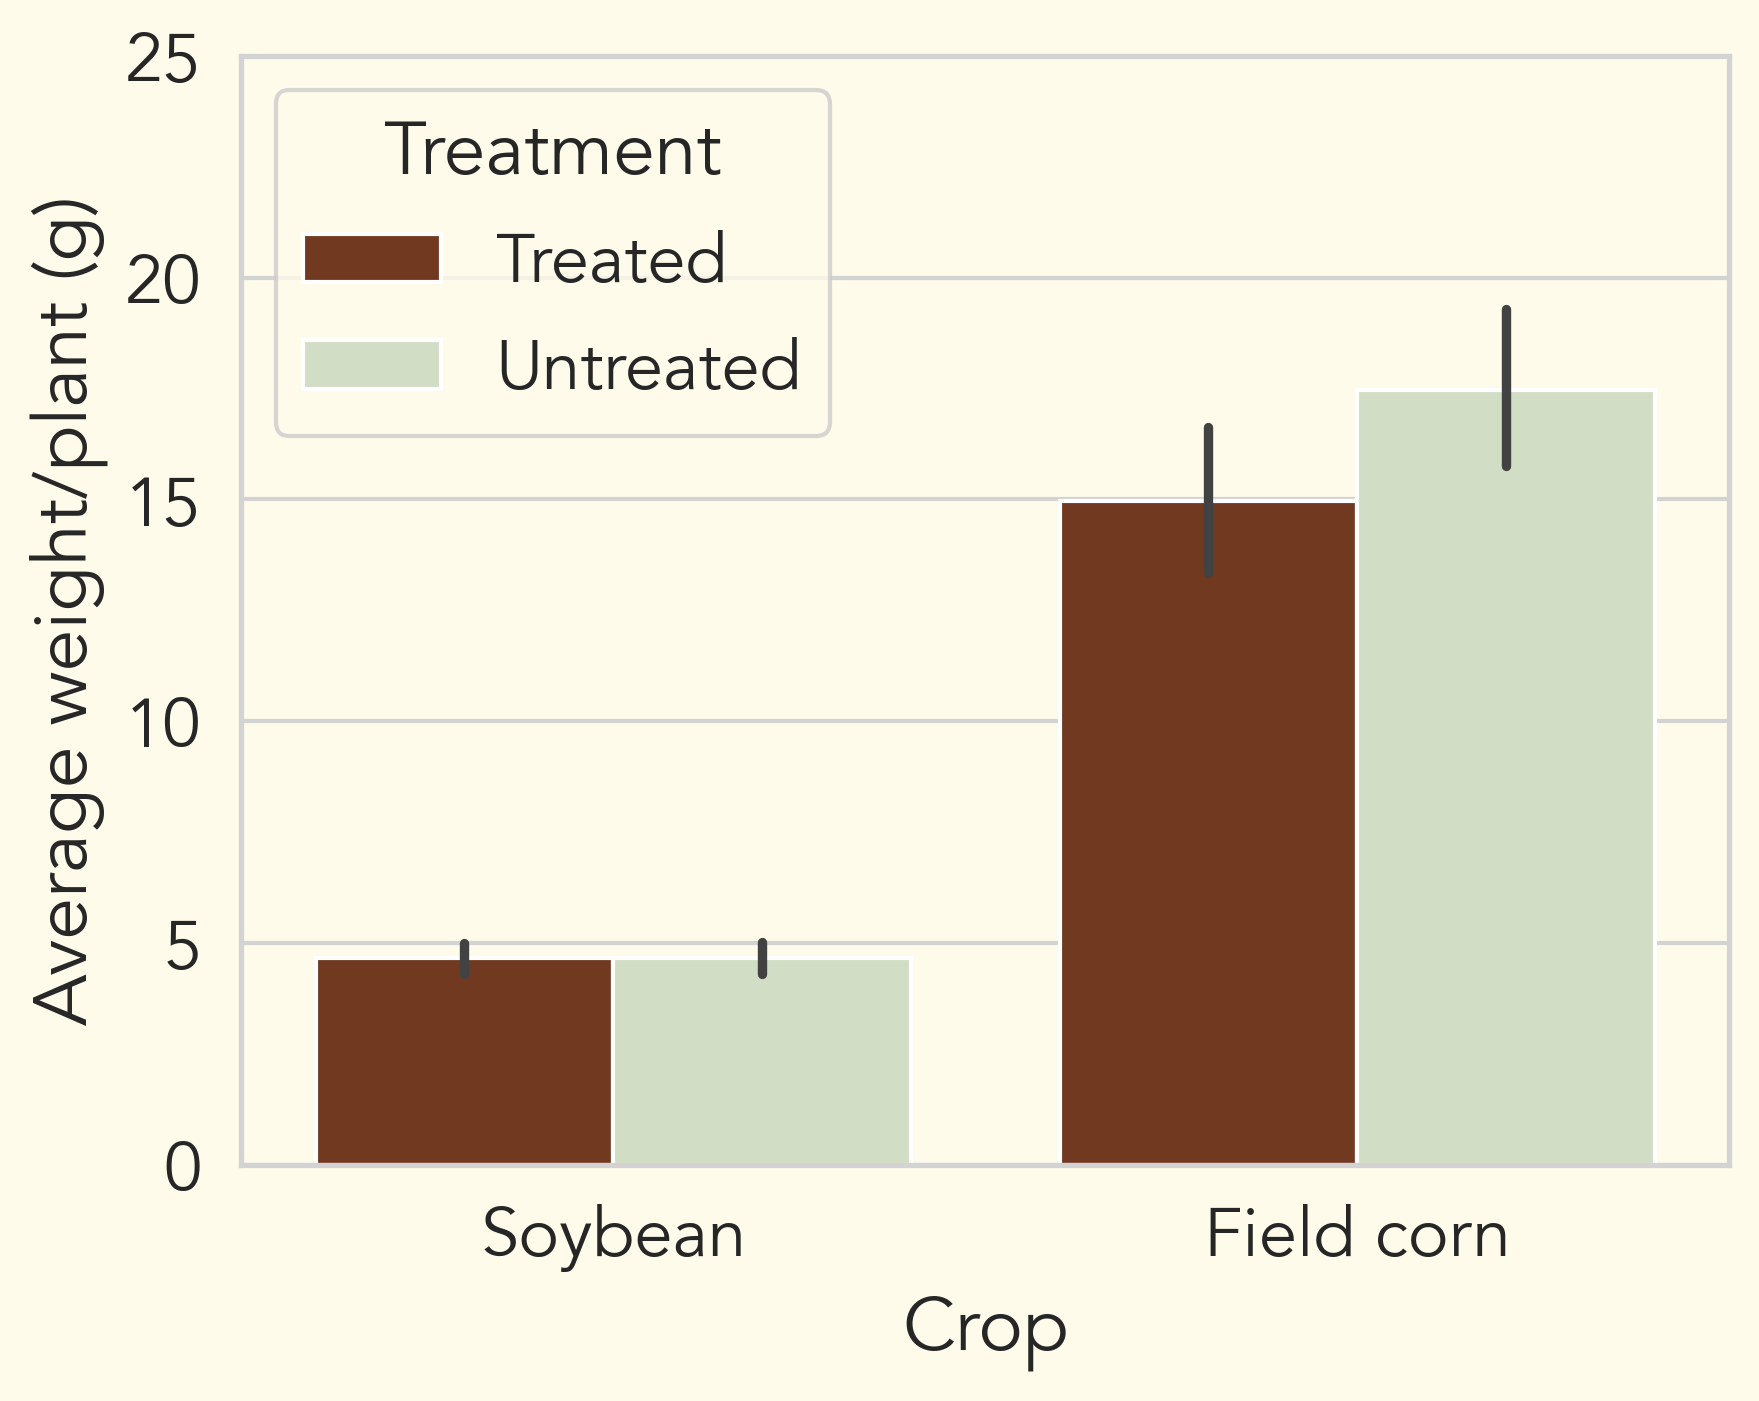

In [303]:
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})
plt.rcParams.update({"figure.dpi": 300})


field_crop_biomass['Treatment'] = field_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
field_crop_biomass['Avg weight'] = field_crop_biomass['Total weight (g)'] / field_crop_biomass['Number of plants']


palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
sns.barplot(data = field_crop_biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, hue_order=hue_order)
plt.ylim(0, 25)
plt.ylabel('Average weight/plant (g)')


In [40]:
sweet_corn_yield['Treatment'] = sweet_corn_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
sweet_corn_yield


,Data Collector,Field ID,Date,Sampling period,Treatment,Section,Ears,Total weight (kg),Number of Plants,Notes
0,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,1,19,9.98,27,NaN
1,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,2,16,6.18,18,NaN
2,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,3,16,7.32,15,NaN
3,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,4,21,9.64,19,NaN
4,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,5,18,8.10,20,NaN
5,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,6,19,8.34,18,NaN
6,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Untreated,1,22,7.28,22,NaN
7,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Untreated,2,21,7.56,24,NaN
8,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Untreated,3,18,5.72,21,NaN
9,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Untreated,4,18,5.46,21,NaN


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/176281499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Ears', palette=palette)


Text(0, 0.5, 'Number of ears')

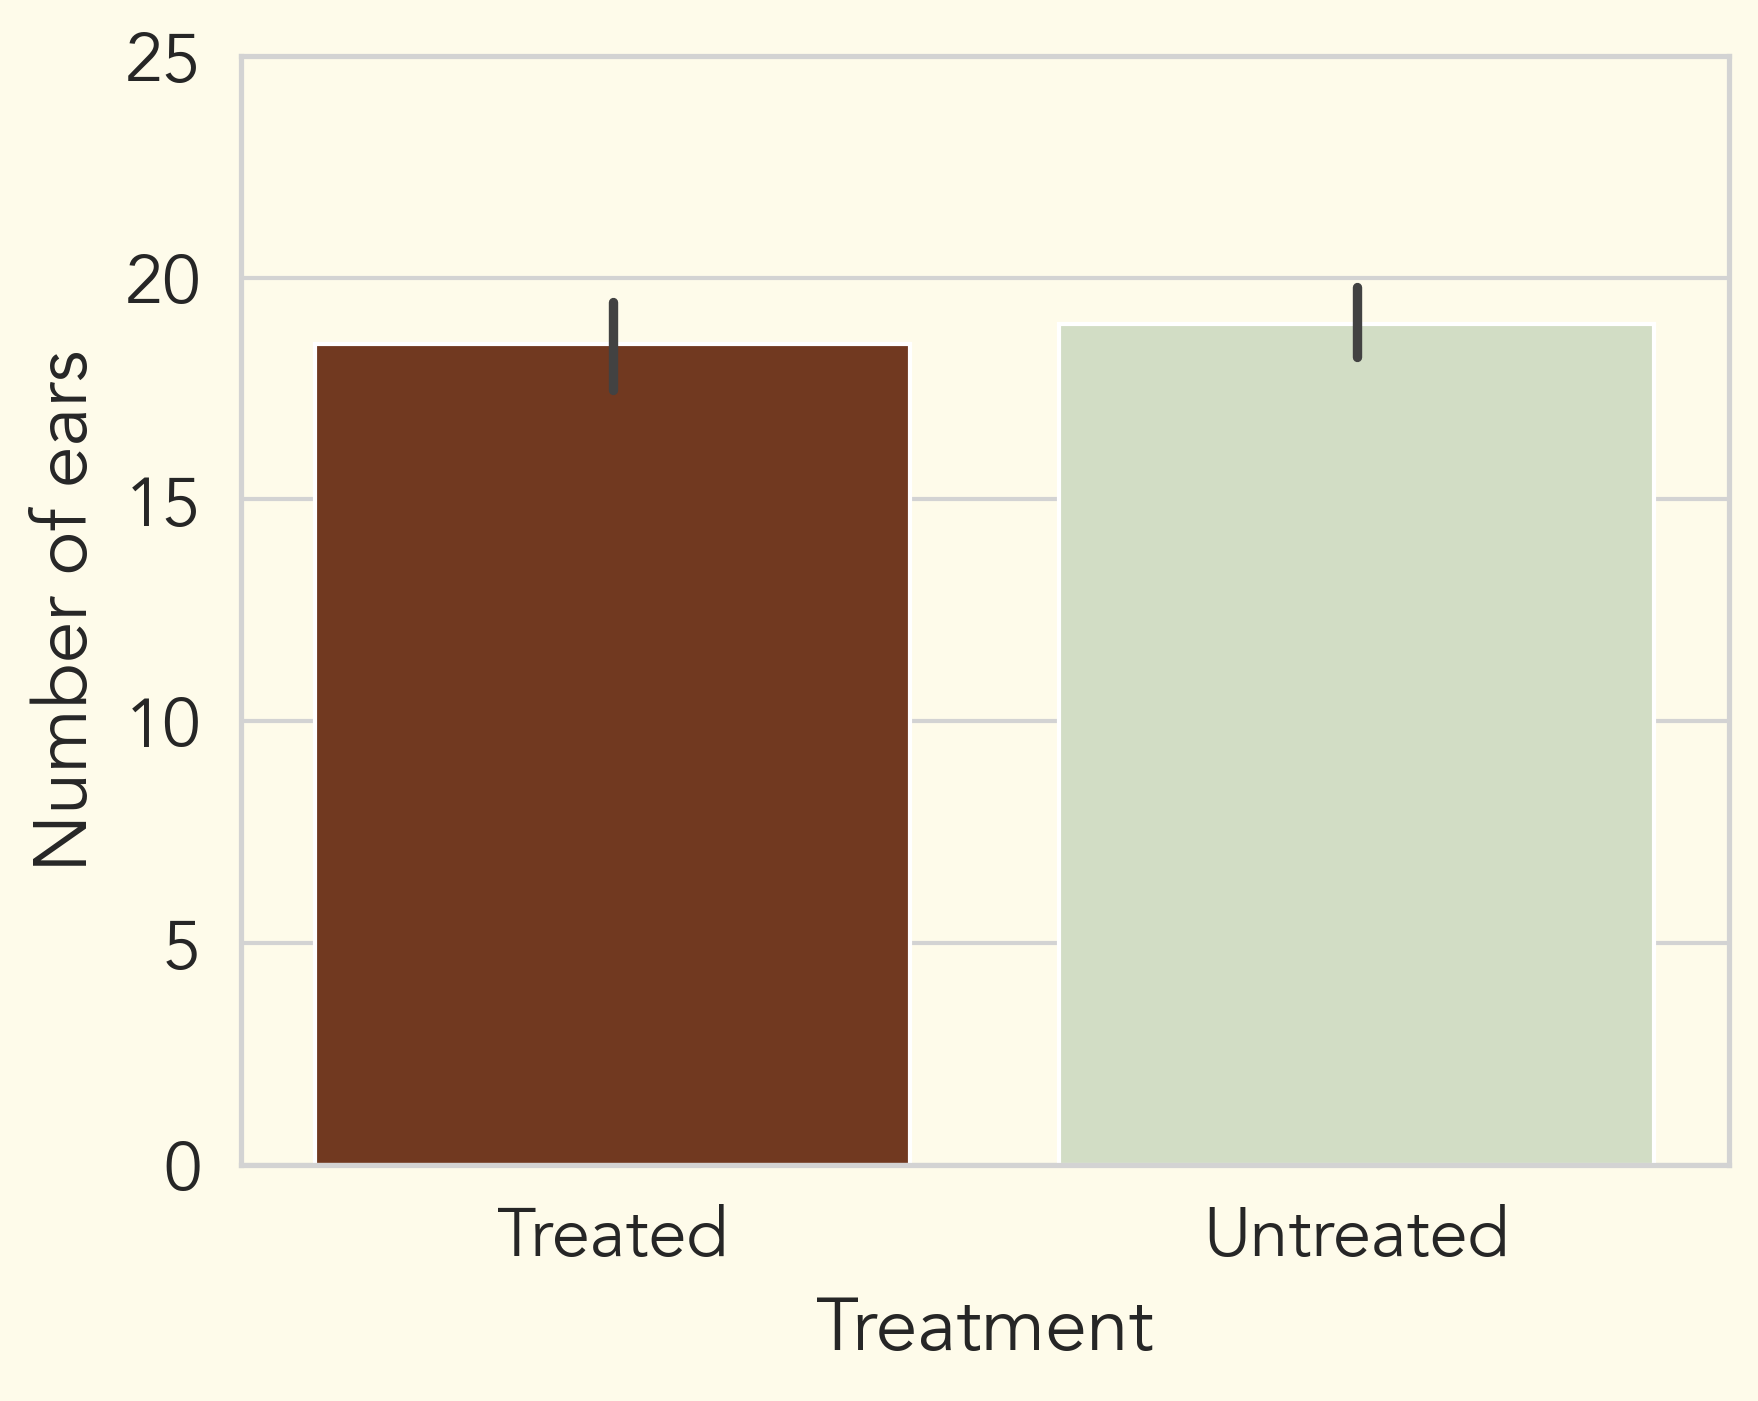

In [41]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Ears', palette=palette)
ax.set_ylim(0,25)
plt.ylabel('Number of ears')

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/2216716848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Total weight (kg)', palette=palette)


Text(0, 0.5, 'Total weight (kg)')

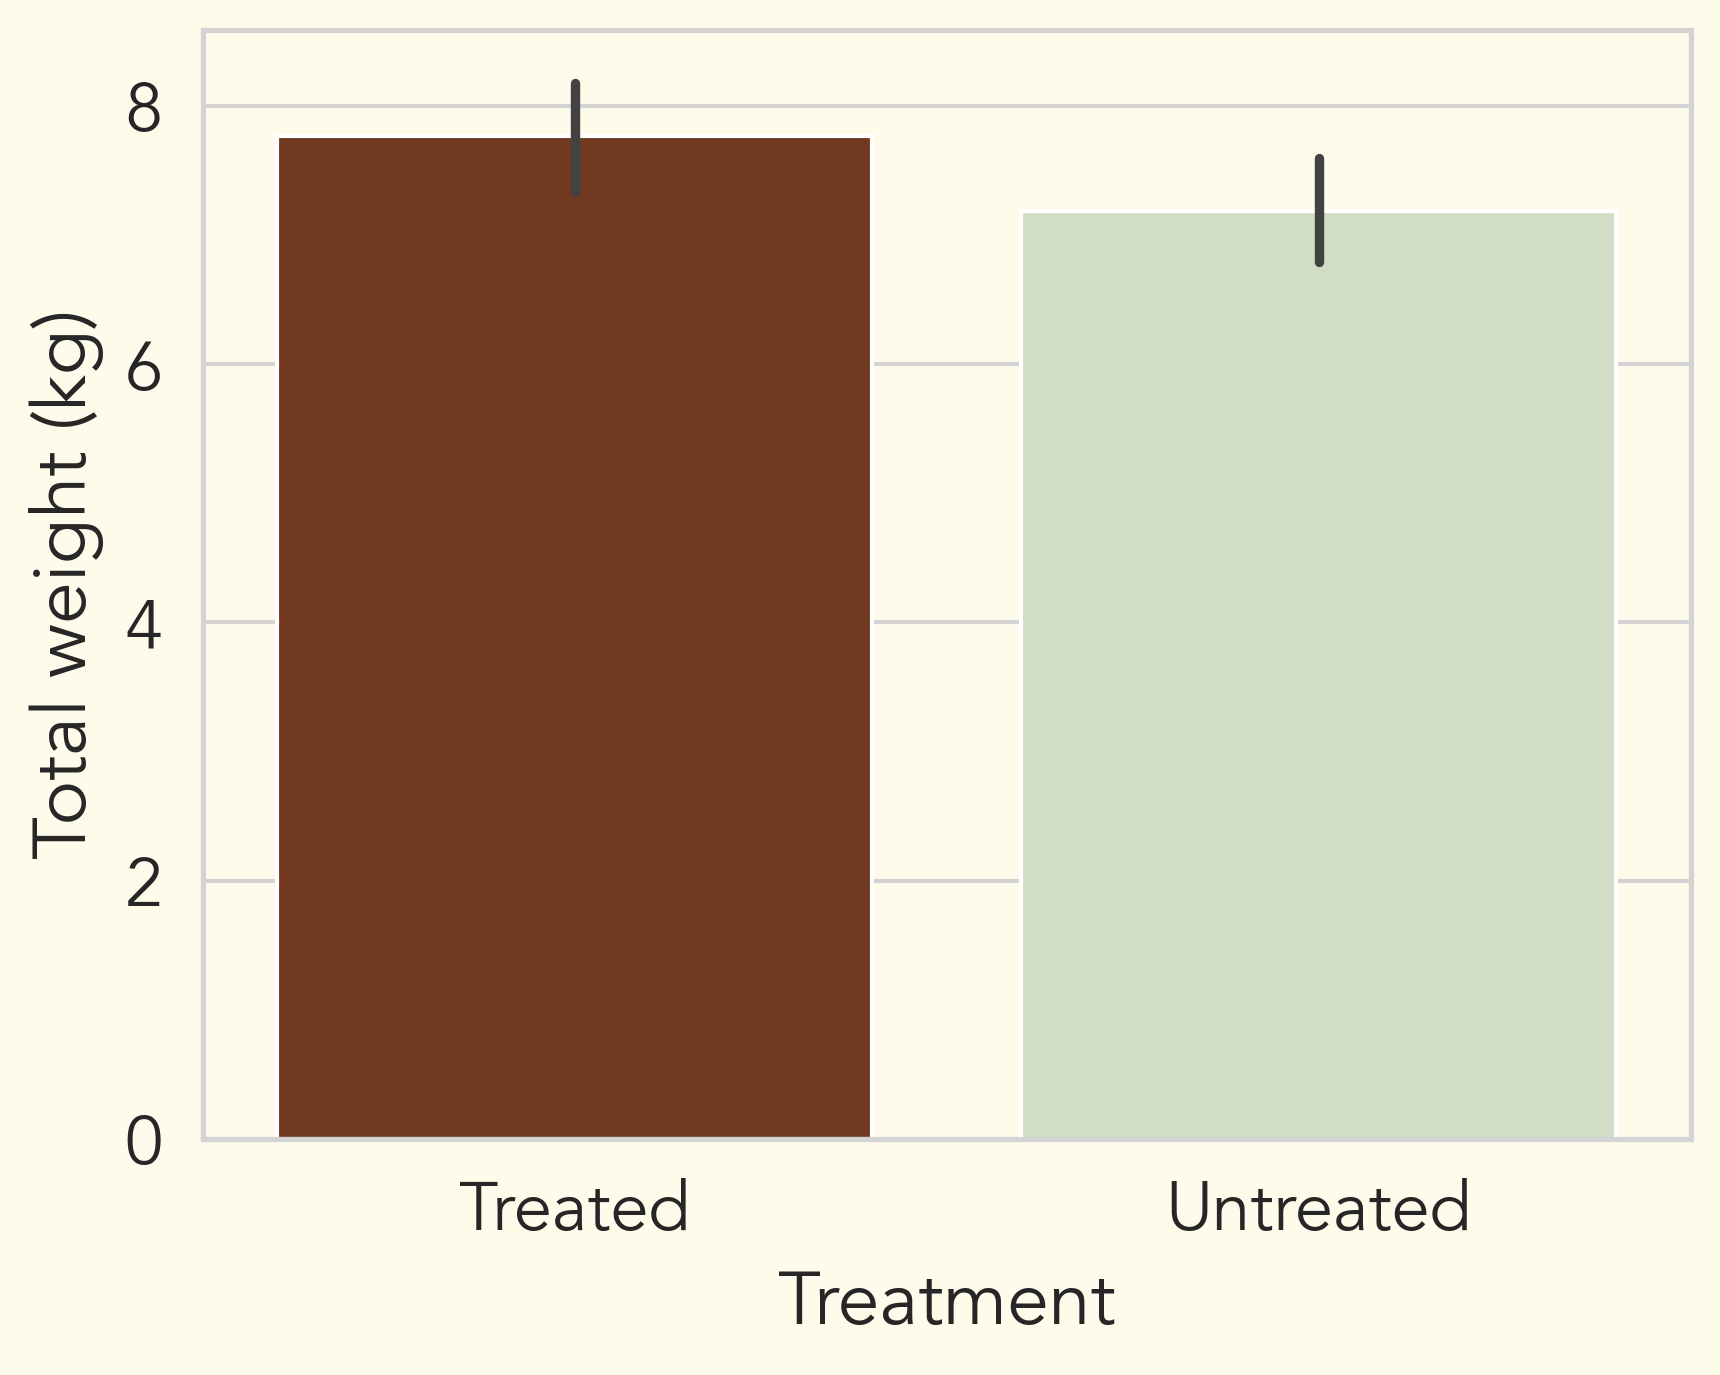

In [42]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Total weight (kg)', palette=palette)
plt.ylabel('Total weight (kg)')

In [43]:
sweet_corn_yield['Avg weight (kg)'] = sweet_corn_yield['Total weight (kg)'] / sweet_corn_yield["Ears"]

In [44]:
t1 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Treated'].groupby('Field ID')['Ears'].mean()
t2 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Ears'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.4758680547060367, pvalue=0.6666745323691353, df=3)

In [45]:
t1 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Treated'].groupby('Field ID')['Total weight (kg)'].mean()
t2 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Total weight (kg)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.6629286883900503, pvalue=0.194913755900922, df=3)

In [46]:
t1 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Treated'].groupby('Field ID')['Avg weight (kg)'].mean()
t2 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Avg weight (kg)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.4192645840294138, pvalue=0.25088261769485326, df=3)

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/450050465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Avg weight (kg)', palette=palette)


Text(0, 0.5, 'Avg weight per ear (kg)')

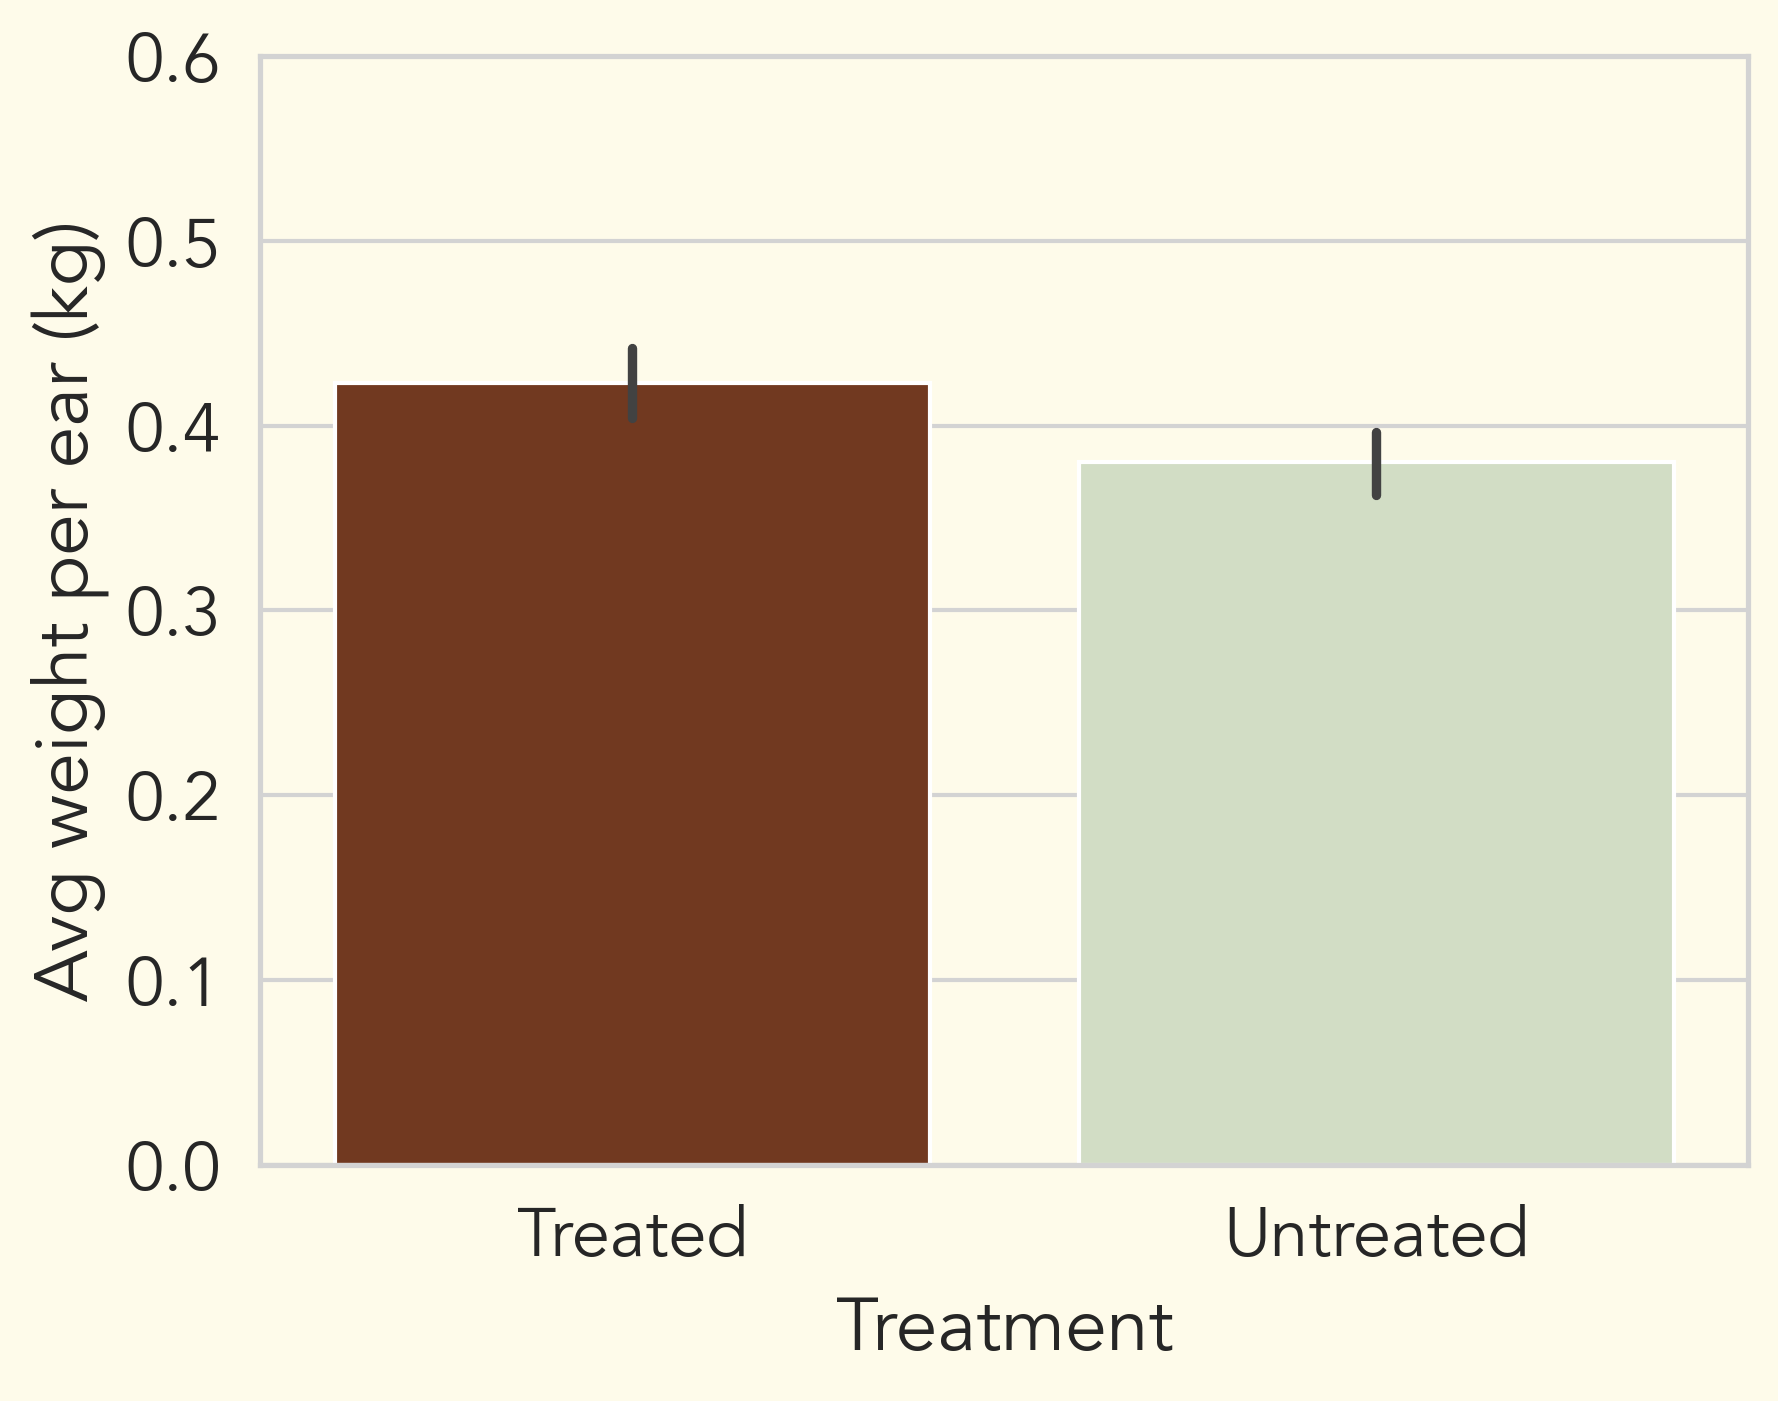

In [47]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Avg weight (kg)', palette=palette)
ax.set_ylim(0, 0.6)
plt.ylabel('Avg weight per ear (kg)')

In [48]:
snap_yield['Treatment'] = snap_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
snap_yield


,Data Collector,Field ID,Date,Sampling period,Treatment,Section,Number of Pods,Total weight (kg),Number of Plants,Notes
0,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,1,856,1.40,110,NaN
1,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,2,783,1.50,115,NaN
2,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,3,896,1.76,114,NaN
3,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,4,907,1.86,96,NaN
4,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,5,644,0.94,106,NaN
5,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,6,483,0.94,104,NaN
6,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Untreated,1,416,1.04,43,NaN
7,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Untreated,2,661,1.42,69,NaN
8,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Untreated,3,441,0.64,59,NaN
9,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Untreated,4,370,0.75,61,NaN


In [49]:
t1 = snap_yield.loc[snap_yield['Treatment'] == 'Treated'].groupby('Field ID')['Number of Pods'].mean()
t2 = snap_yield.loc[snap_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Number of Pods'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.5508462104488594, pvalue=0.6794666170846619, df=1)

In [50]:
t1 = snap_yield.loc[snap_yield['Treatment'] == 'Treated'].groupby('Field ID')['Total weight (kg)'].mean()
t2 = snap_yield.loc[snap_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Total weight (kg)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.7384083044982698, pvalue=0.5950836893399938, df=1)

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1263157783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = snap_yield, x = 'Treatment', y = 'Total weight (kg)', palette=palette)


Text(0, 0.5, 'Total weight (kg)')

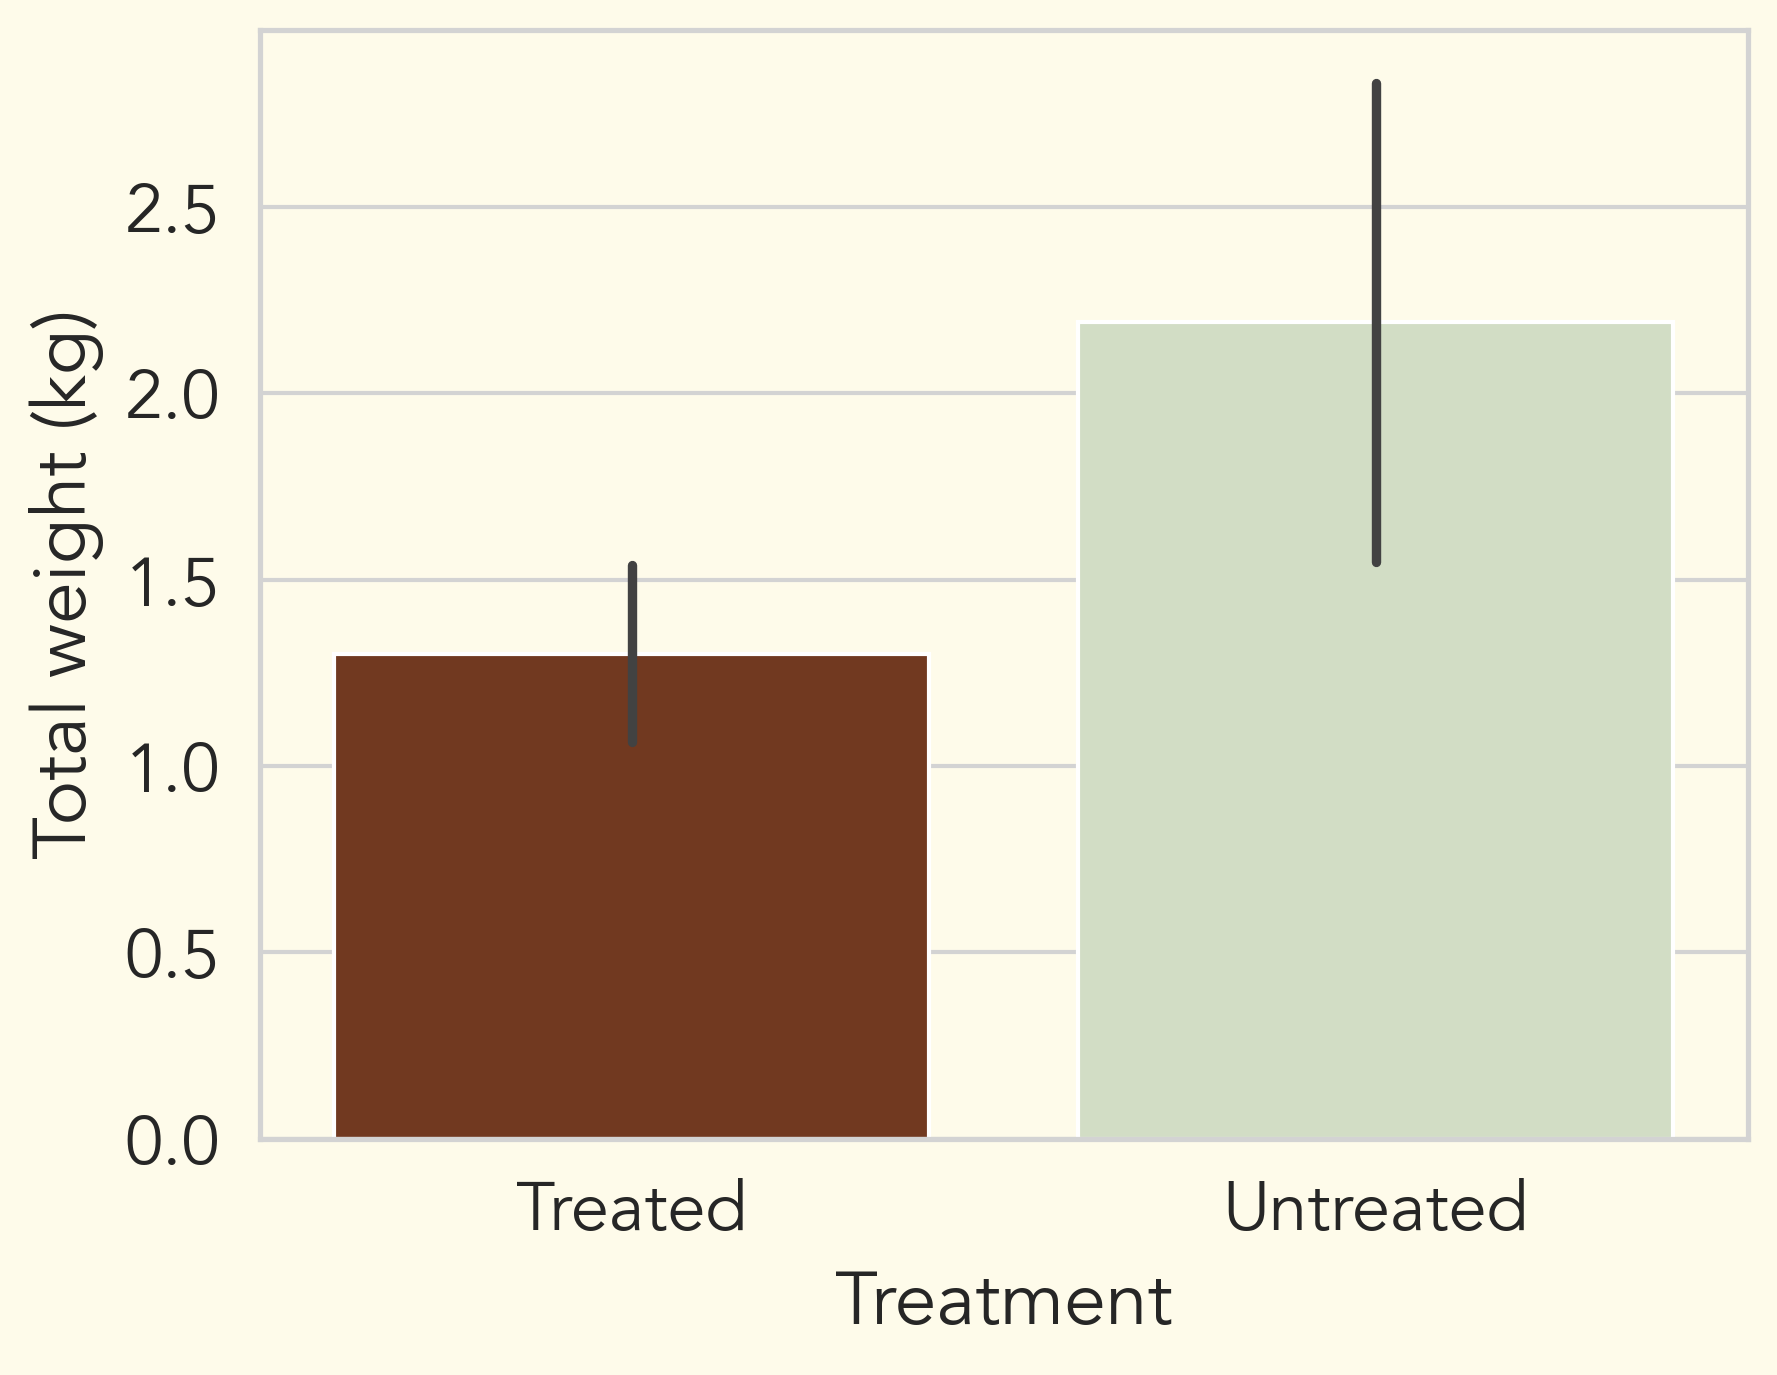

In [51]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
sns.barplot(data = snap_yield, x = 'Treatment', y = 'Total weight (kg)', palette=palette)
plt.ylabel('Total weight (kg)')

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/3153162828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = snap_yield, x = 'Treatment', y = 'Number of Pods', palette=palette)


Text(0, 0.5, 'Number of pods')

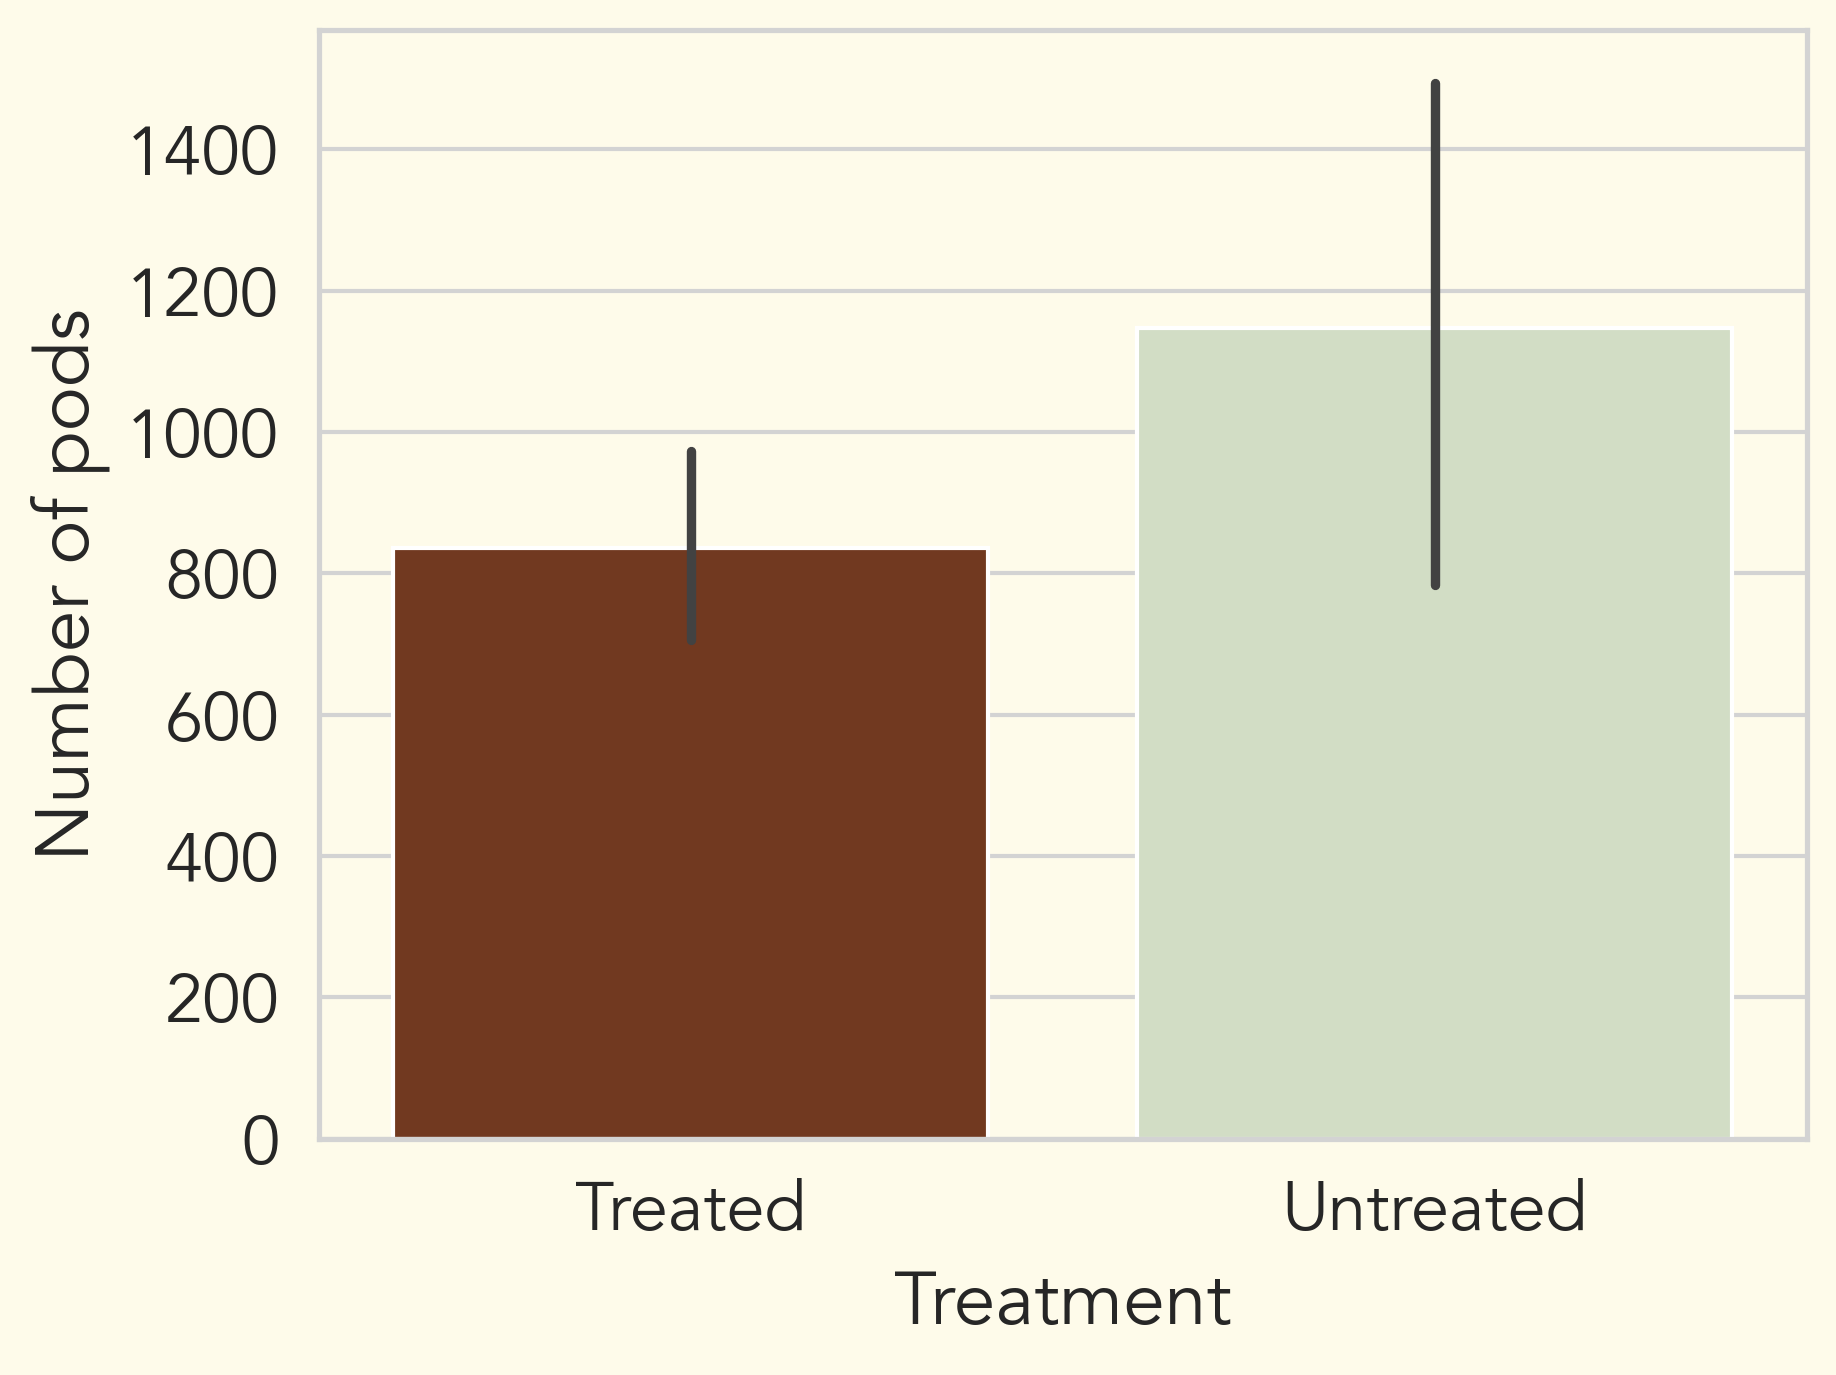

In [52]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
sns.barplot(data = snap_yield, x = 'Treatment', y = 'Number of Pods', palette=palette)
plt.ylabel('Number of pods')

In [53]:
veg_crop_biomass = biomass[(biomass['Crop'] != 'Field corn') & (biomass['Crop'] != 'Soybean')]
veg_crop_biomass['Avg weight'] = veg_crop_biomass['Total weight (g)'] / veg_crop_biomass['Number of plants']
veg_crop_biomass['Treatment'] = veg_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


veg_crop_biomass

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/275178147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_crop_biomass['Avg weight'] = veg_crop_biomass['Total weight (g)'] / veg_crop_biomass['Number of plants']
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/275178147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_crop_biomass['Treatment'] = veg_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g),Avg weight
324,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,1,V2/V3,15,19.01,Adjust for 7.59g bag,26.60,1.267333
325,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,2,V2/V3,15,31.51,Adjust for 7.59g bag,39.10,2.100667
326,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,3,V2/V3,15,21.91,Adjust for 7.59g bag,29.50,1.460667
327,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,4,V2/V3,15,18.11,Adjust for 7.59g bag,25.70,1.207333
328,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,5,V2/V3,15,11.71,Adjust for 7.59g bag,19.30,0.780667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,5,V2/V3,15,92.24,Corrected for 7.59 g bag,99.83,6.149333
626,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,6,V2/V3,15,131.41,Corrected for 7.59 g bag,139.00,8.760667
627,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,7,V2/V3,15,116.41,Corrected for 7.59 g bag,124.00,7.760667
628,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,8,V2/V3,15,125.60,Corrected for 7.59 g bag,133.19,8.373333


Text(0, 0.5, 'Average weight/plant (g)')

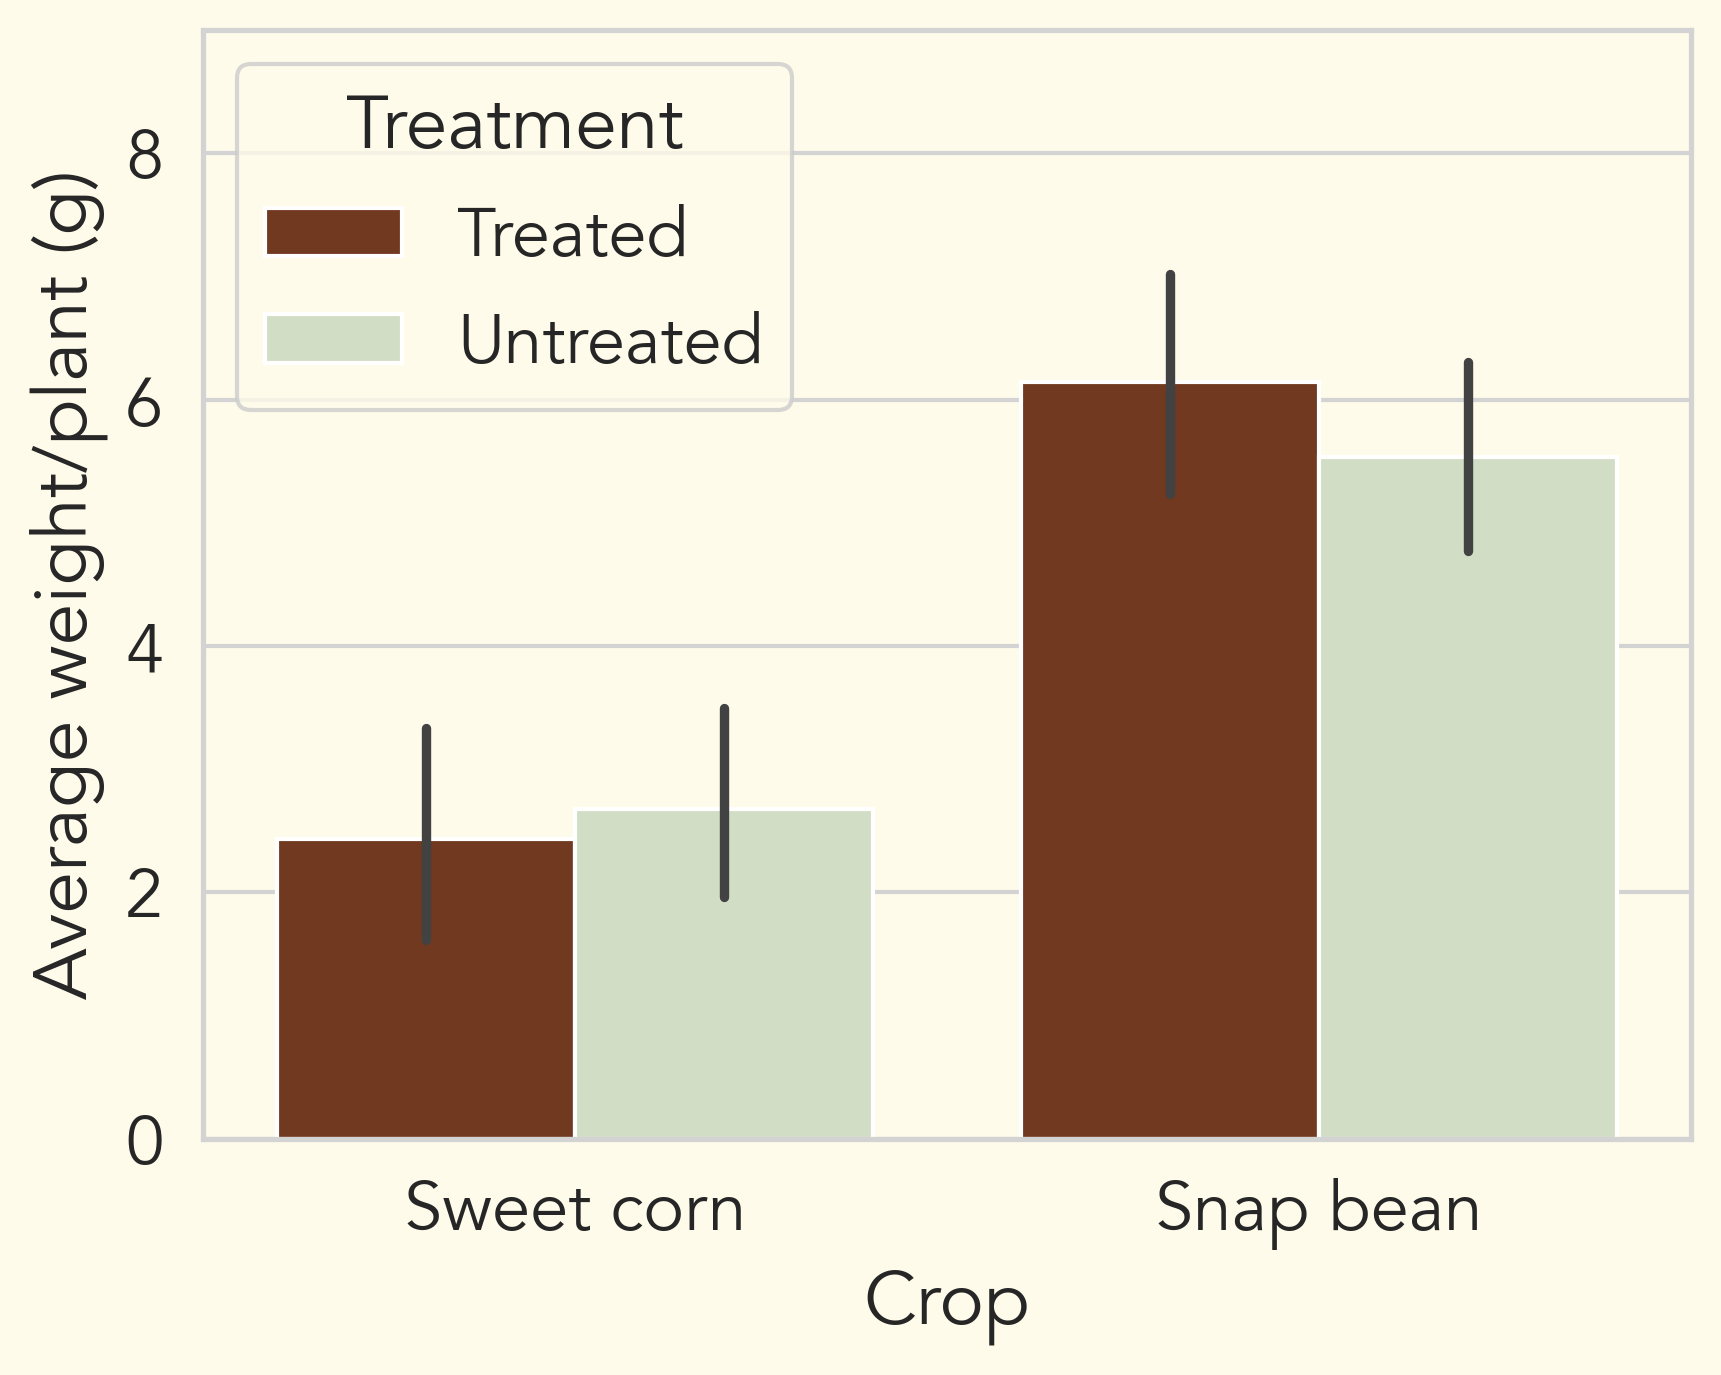

In [54]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = veg_crop_biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, hue_order=hue_order)
ax.set_ylim(0, 9)
plt.ylabel('Average weight/plant (g)')

In [55]:
sweet_corn_biomass = veg_crop_biomass[veg_crop_biomass['Crop'] == 'Sweet corn']
snap_biomass = veg_crop_biomass[veg_crop_biomass['Crop'] == 'Snap bean']

In [56]:
t1 = sweet_corn_biomass.loc[sweet_corn_biomass['Treatment'] == 'Treated'].groupby('Field ID')['Avg weight'].mean()
t2 = sweet_corn_biomass.loc[sweet_corn_biomass['Treatment'] == 'Untreated'].groupby('Field ID')['Avg weight'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.5127830343927043, pvalue=0.6434727954565693, df=3)

In [304]:
silage_yield = pd.read_csv('Data/silage_yield.csv')
silage_yield['Treatment'] = silage_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
silage_yield

,Data Collector,Field ID,Date,Sampling period,Crop,Grain or Silage,Treatment,Yield (tons/acre),Yield (dry matter)
0,Natika Walters,KUH_COL,9/17/2025,Harvest,Field corn,Silage,Treated,18.700,6.73
1,Natika Walters,KUH_COL,9/17/2025,Harvest,Field corn,Silage,Untreated,18.500,6.43
2,Katelyn Miller,MIL_CRO_2,9/22/2025,Harvest,Field corn,Silage,Treated,20.270,6.75
3,Katelyn Miller,MIL_CRO_2,9/22/2025,Harvest,Field corn,Silage,Untreated,18.350,7.32
4,Katelyn Miller,MIL_CRO_1,9/22/2025,Harvest,Field corn,Silage,Treated,30.610,9.00
5,Katelyn Miller,MIL_CRO_1,9/22/2025,Harvest,Field corn,Silage,Untreated,27.920,8.51
6,Erik Smith,SMI_LAT,10/15/2025,Harvest,Field corn,Silage,Treated,15.770,6.49
7,Erik Smith,SMI_LAT,10/15/2025,Harvest,Field corn,Silage,Untreated,17.233,6.42
8,Jodi Letham,LET_STE,9/29/2025,Harvest,Field corn,Silage,Treated,12.160,4.40
9,Jodi Letham,LET_STE,9/29/2025,Harvest,Field corn,Silage,Untreated,16.410,5.94


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/3989978922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette)


Text(0, 0.5, 'Yield (dry matter, tons/ac)')

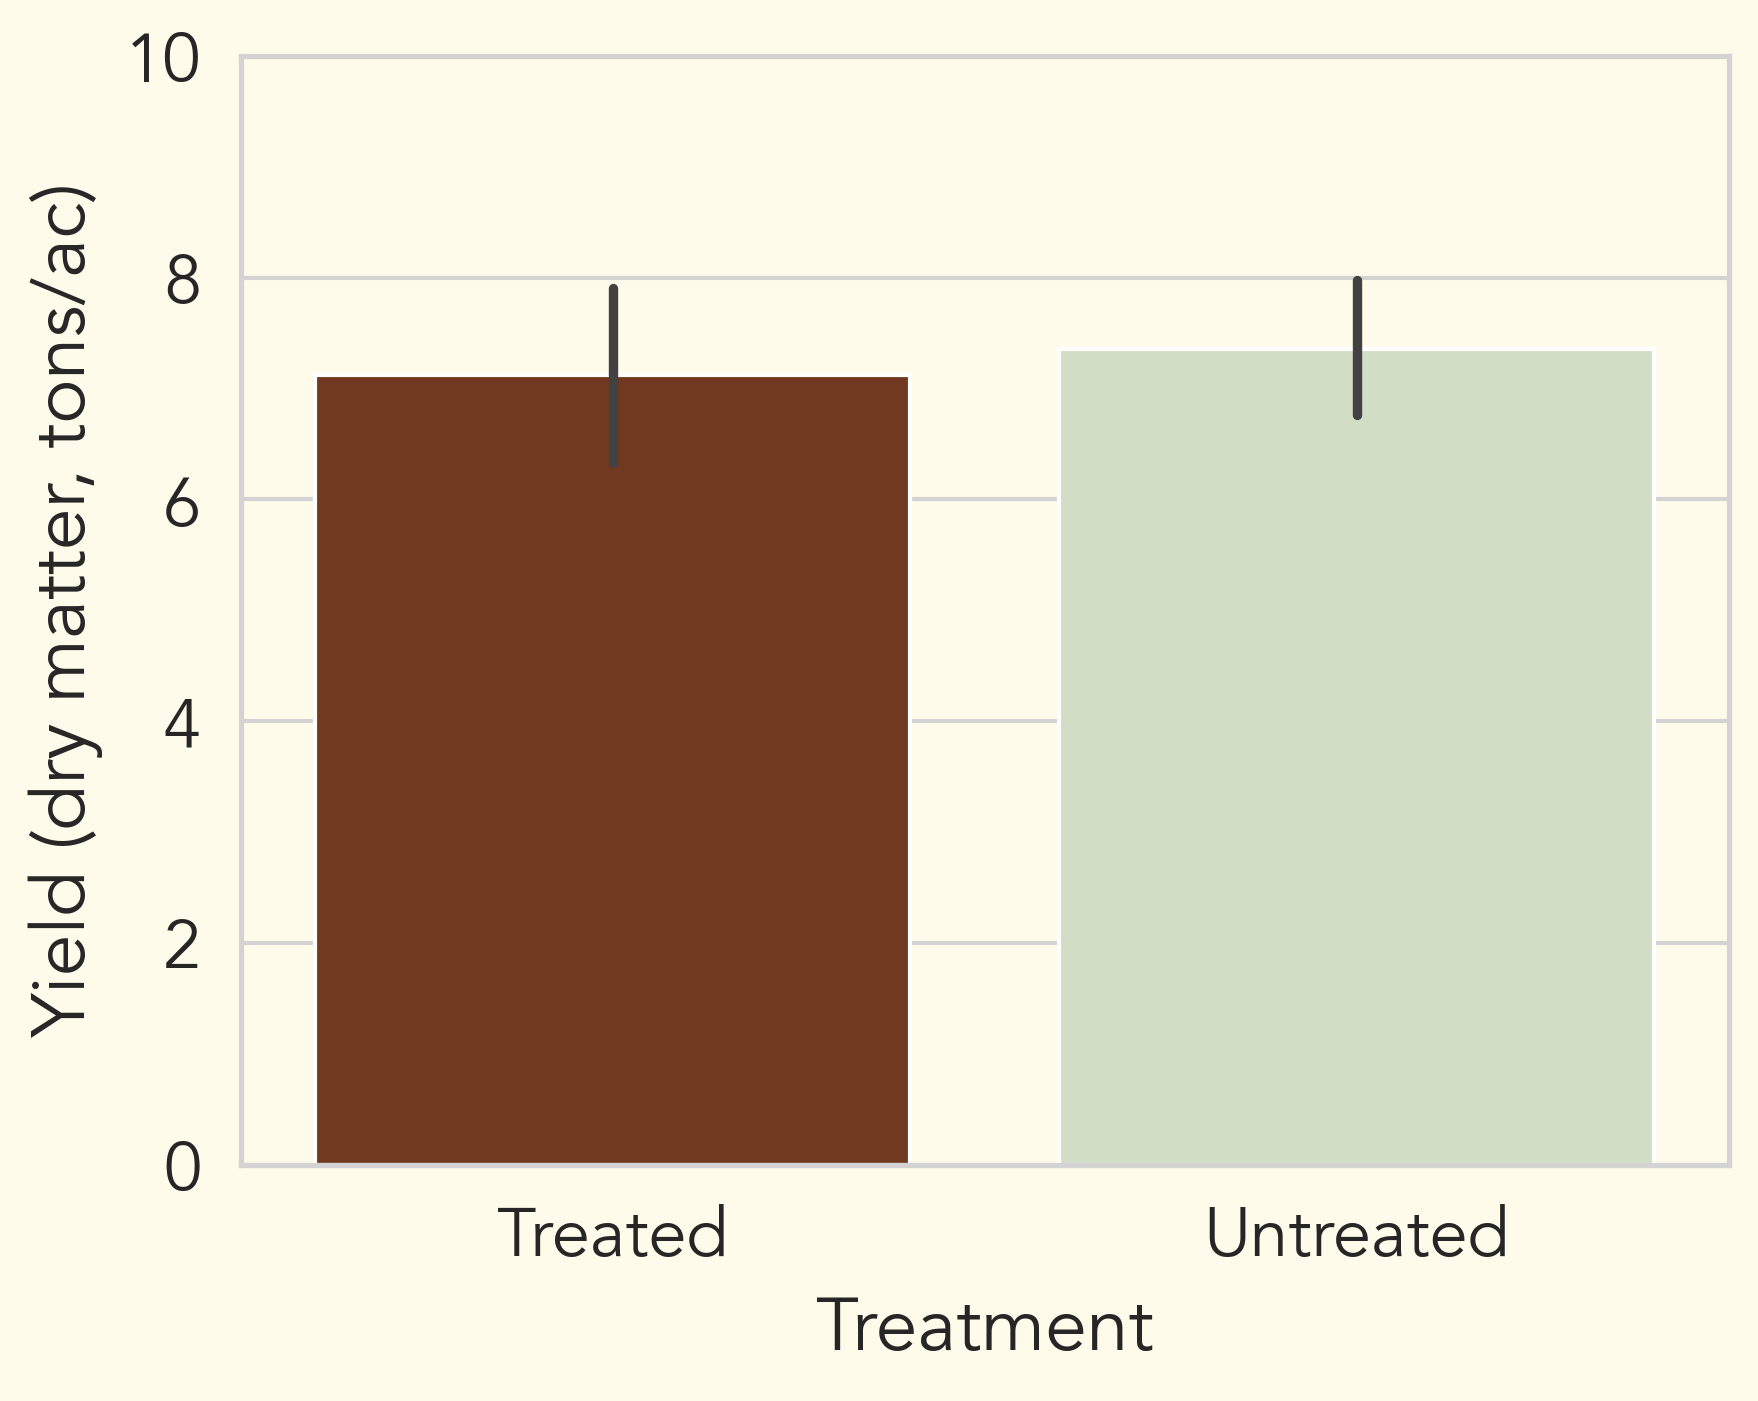

In [305]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette)
ax.set_ylim(0, 10)
plt.ylabel('Yield (dry matter, tons/ac)')

In [306]:
t1 = silage_yield.loc[silage_yield['Treatment'] == 'Treated'].groupby('Field ID')['Yield (dry matter)'].mean()
t2 = silage_yield.loc[silage_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Yield (dry matter)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.9028050186080208, pvalue=0.3830529449350125, df=13)

In [307]:
soy_yield = pd.read_csv('Data/soybean_yield.csv')
soy_yield['Treatment'] = soy_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
soy_yield

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Yield (bu/acre)
0,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Treated,57.50
1,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Untreated,54.70
2,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Treated,32.52
3,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Untreated,33.81
4,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Treated,50.99
5,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Untreated,42.18
6,Mike Stanyard,STA_FRE,10/6/2025,Harvest,Soybean,Treated,35.70
7,Mike Stanyard,STA_FRE,10/6/2025,Harvest,Soybean,Untreated,40.26
8,Mike Stanyard,STA_REE_2,9/30/2025,Harvest,Soybean,Treated,48.43
9,Mike Stanyard,STA_REE_2,9/30/2025,Harvest,Soybean,Untreated,57.79


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/3405343652.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = soy_yield, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette)


Text(0, 0.5, 'Yield (bu/acre)')

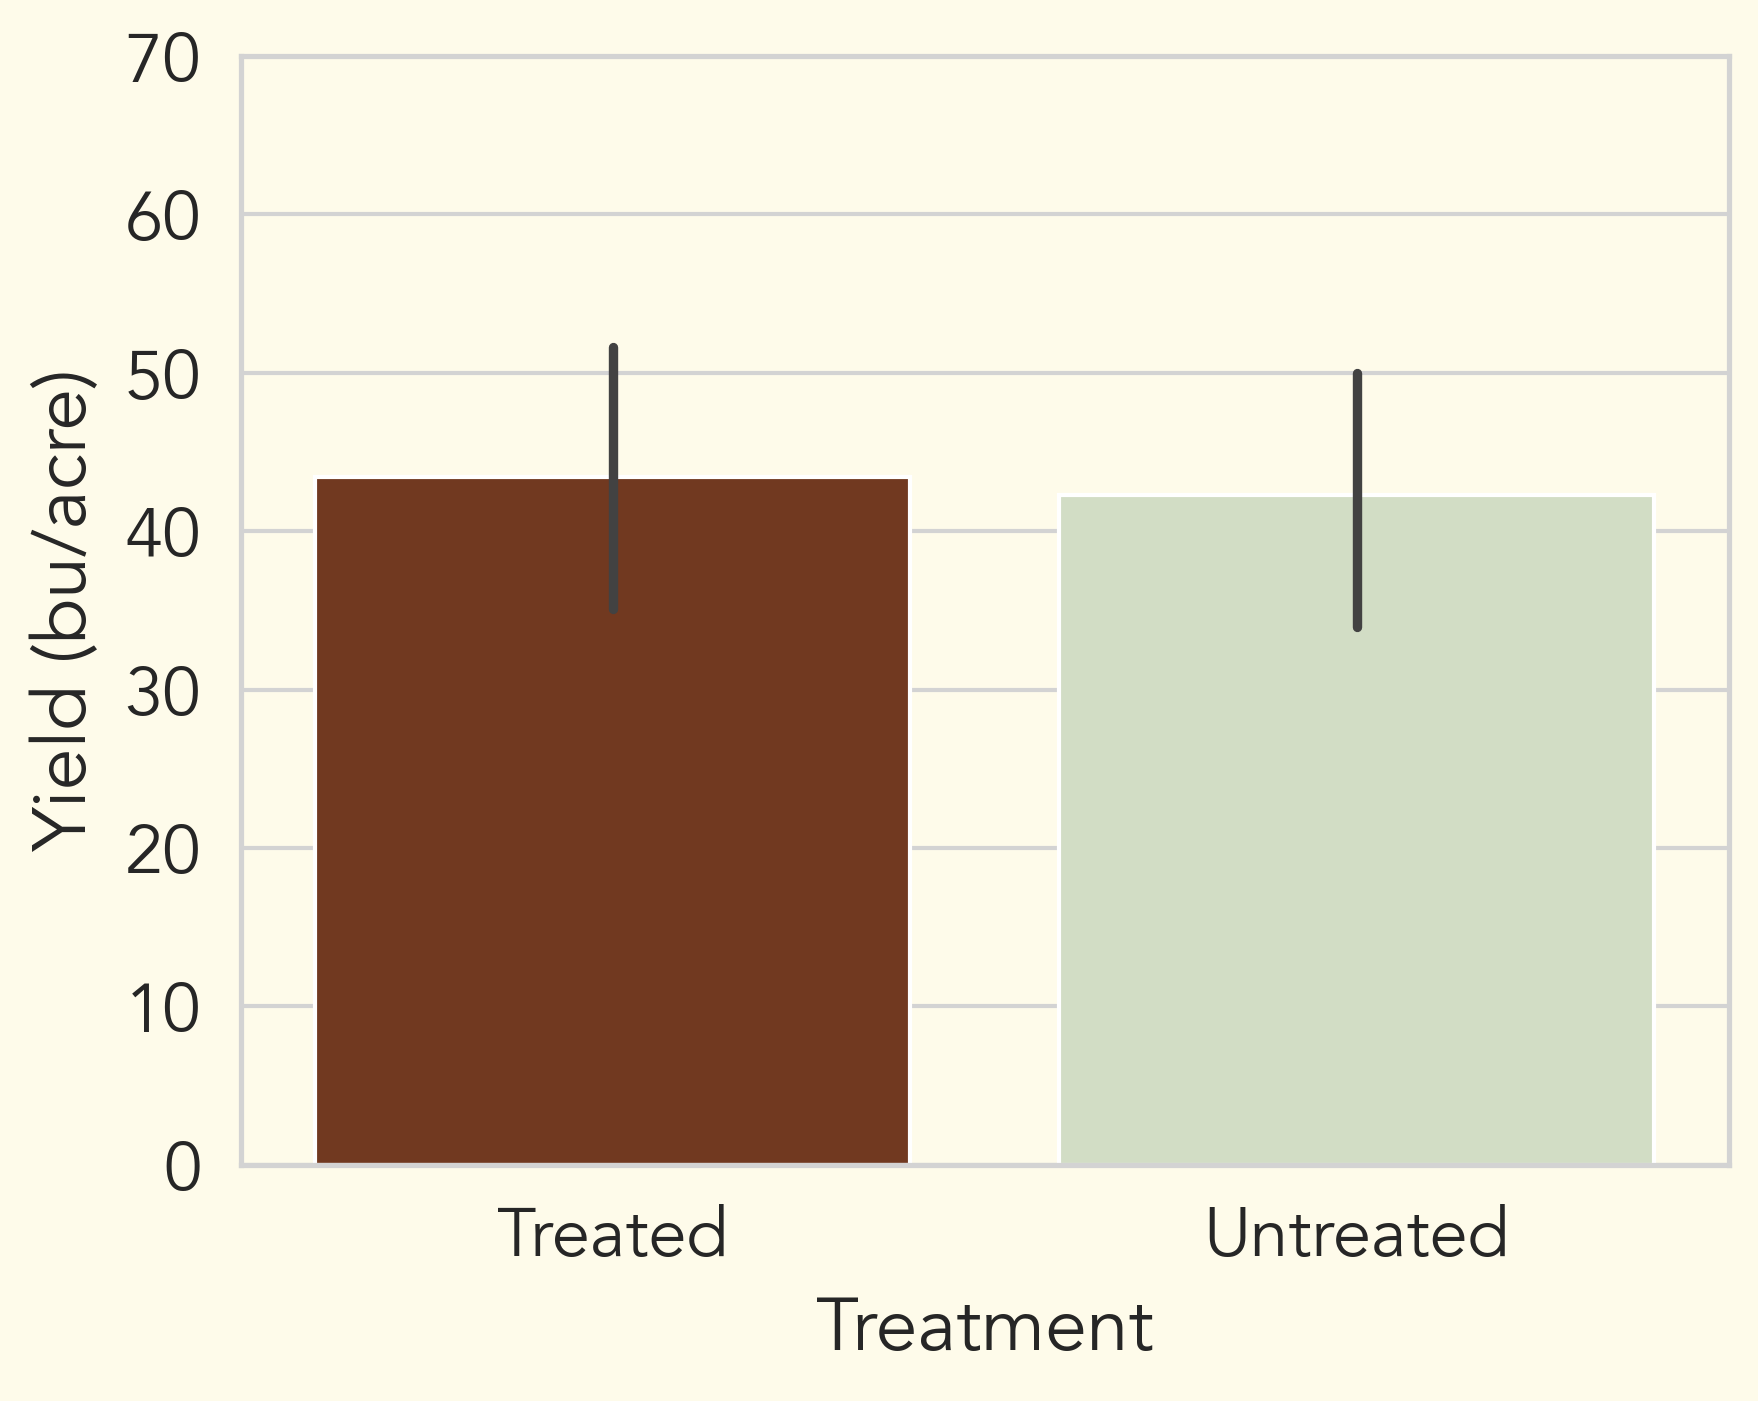

In [308]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = soy_yield, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette)
ax.set_ylim(0, 70)
plt.ylabel('Yield (bu/acre)')

In [309]:
t1 = soy_yield.loc[soy_yield['Treatment'] == 'Treated'].groupby('Field ID')['Yield (bu/acre)'].mean()
t2 = soy_yield.loc[soy_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Yield (bu/acre)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=0.8109903379006885, pvalue=0.4319687978489076, df=13)

In [63]:
sites_w_scm = deli_cup.loc[deli_cup['Total SCM'] > 0]['Field ID'].unique()
sites_w_scm

array(['CER_DEL_1', 'CER_DEL_2', 'CHO_GEN', 'DEG_DIE', 'DEG_FRI_1',
       'DEG_FRI_2', 'DEG_LAF_1', 'DEG_LAF_2', 'DEG_PER_1', 'DEG_PER_2',
       'DEG_VIL', 'HUN_REE', 'KIK_MBF', 'KIK_MYT', 'KIK_SWE', 'KUH_COL',
       'LET_MAC', 'LET_STE_1', 'LET_STE_2', 'LET_VER', 'MIL_BAR_1',
       'MIL_COB', 'MIL_CRO_2', 'MIL_TEL', 'MIL_ZIT_1', 'MIL_ZIT_2',
       'MIL_ZIT_3', 'SMI_ARN_2', 'SMI_COB', 'SMI_CON_1', 'SMI_CON_2',
       'SMI_DOU', 'SMI_HOF_1', 'SMI_HOF_2', 'SMI_LAT', 'SMI_MCC',
       'STA_BLO', 'STA_FRE', 'STA_KRE', 'STA_MAC', 'STA_STA', 'STA_WIL',
       'STA_WOO', 'ZUE_MYT'], dtype=object)

In [64]:
deli_cup.loc[deli_cup['Total SCM'] > 0]

,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Seed Type,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Phorid Seed,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes,Total SCM
0,25_D_1181,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,14.0,1,0,...,0,1,3,0,YES,YES,Y,294,NaN,1
2,25_D_1183,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,17.0,2,0,...,0,0,0,0,NO,NO,Y,380,NaN,2
4,25_D_1185,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,15.0,2,0,...,0,0,0,0,NO,NO,Y,51,NaN,2
5,25_D_1186,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,15.0,5,0,...,0,0,0,0,NO,NO,Y,50,NaN,5
10,25_D_1191,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,15.0,1,0,...,0,0,0,0,NO,NO,Y,381,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,25_D_2436,DELI,R,ZUE_MYT,NEONIC,7/1/25,SNAP,15.0,1,0,...,0,0,0,0,YES,NO,Y,734,NaN,1
959,25_D_2437,DELI,R,ZUE_MYT,FUNG,7/1/25,SNAP,15.0,1,0,...,0,0,0,0,YES,YES,Y,737,NaN,1
964,25_D_2442,DELI,R,ZUE_MYT,FUNG,7/1/25,SNAP,15.0,2,0,...,0,7,0,7,NO,NO,Y,NaN,NaN,2
965,25_D_2443,DELI,R,ZUE_MYT,FUNG,7/1/25,SNAP,14.0,1,0,...,0,0,0,0,NO,NO,Y,727,NaN,1


In [65]:
deli_cup

,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Seed Type,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Phorid Seed,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes,Total SCM
0,25_D_1181,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,14.0,1,0,...,0,1,3,0,YES,YES,Y,294,NaN,1
1,25_D_1182,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,14.0,0,0,...,0,0,0,0,NO,NO,Y,293,NaN,0
2,25_D_1183,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,17.0,2,0,...,0,0,0,0,NO,NO,Y,380,NaN,2
3,25_D_1184,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,15.0,0,0,...,0,0,0,0,NO,NO,Y,308,NaN,0
4,25_D_1185,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,15.0,2,0,...,0,0,0,0,NO,NO,Y,51,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,25_D_2513,DELI,R,ZUE_VOT,FUNG,7/4/25,SNAP,15.0,0,0,...,0,0,0,0,NO,NO,Y,712,NaN,0
982,25_D_2514,DELI,R,ZUE_VOT,FUNG,7/3/25,SNAP,15.0,0,0,...,0,0,0,0,NO,NO,Y,710,NaN,0
983,25_D_2515,DELI,R,ZUE_VOT,FUNG,7/8/25,SNAP,15.0,0,0,...,0,0,0,0,NO,NO,Y,716,NaN,0
984,25_D_2516,DELI,R,ZUE_VOT,FUNG,7/6/25,SNAP,15.0,0,0,...,0,0,0,0,NO,NO,Y,714,NaN,0


In [66]:
len(field_deli_cup.loc[field_deli_cup['Total SCM'] > 0]['Field ID'].unique())

40

In [67]:
len(field_deli_cup.loc[field_deli_cup['Total SCM'] > 10]['Field ID'].unique())

2

In [311]:
silage_yield_w_scm = silage_yield[silage_yield['Field ID'].isin(sites_w_scm)]
silage_yield_w_scm

,Data Collector,Field ID,Date,Sampling period,Crop,Grain or Silage,Treatment,Yield (tons/acre),Yield (dry matter)
0,Natika Walters,KUH_COL,9/17/2025,Harvest,Field corn,Silage,Treated,18.700,6.73
1,Natika Walters,KUH_COL,9/17/2025,Harvest,Field corn,Silage,Untreated,18.500,6.43
2,Katelyn Miller,MIL_CRO_2,9/22/2025,Harvest,Field corn,Silage,Treated,20.270,6.75
3,Katelyn Miller,MIL_CRO_2,9/22/2025,Harvest,Field corn,Silage,Untreated,18.350,7.32
6,Erik Smith,SMI_LAT,10/15/2025,Harvest,Field corn,Silage,Treated,15.770,6.49
7,Erik Smith,SMI_LAT,10/15/2025,Harvest,Field corn,Silage,Untreated,17.233,6.42
10,Jodi Letham,LET_MAC,9/30/2025,Harvest,Field corn,Silage,Treated,14.690,5.39
11,Jodi Letham,LET_MAC,9/30/2025,Harvest,Field corn,Silage,Untreated,21.020,7.71
12,Jodi Letham,LET_VER,8/29/2025,Harvest,Field corn,Silage,Treated,27.980,7.30
13,Jodi Letham,LET_VER,8/29/2025,Harvest,Field corn,Silage,Untreated,31.900,8.32


In [69]:
t1 = silage_yield_w_scm.loc[silage_yield_w_scm['Treatment'] == 'Treated'].groupby('Field ID')['Yield (dry matter)'].mean()
t2 = silage_yield_w_scm.loc[silage_yield_w_scm['Treatment'] == 'Untreated'].groupby('Field ID')['Yield (dry matter)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-1.0392269857609662, pvalue=0.3290859194521895, df=8)

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/3016319072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = silage_yield_w_scm, x = 'Treatment', y = 'Yield (dry matter)', palette=palette)


Text(0.5, 1.0, 'Yield (silage corn)')

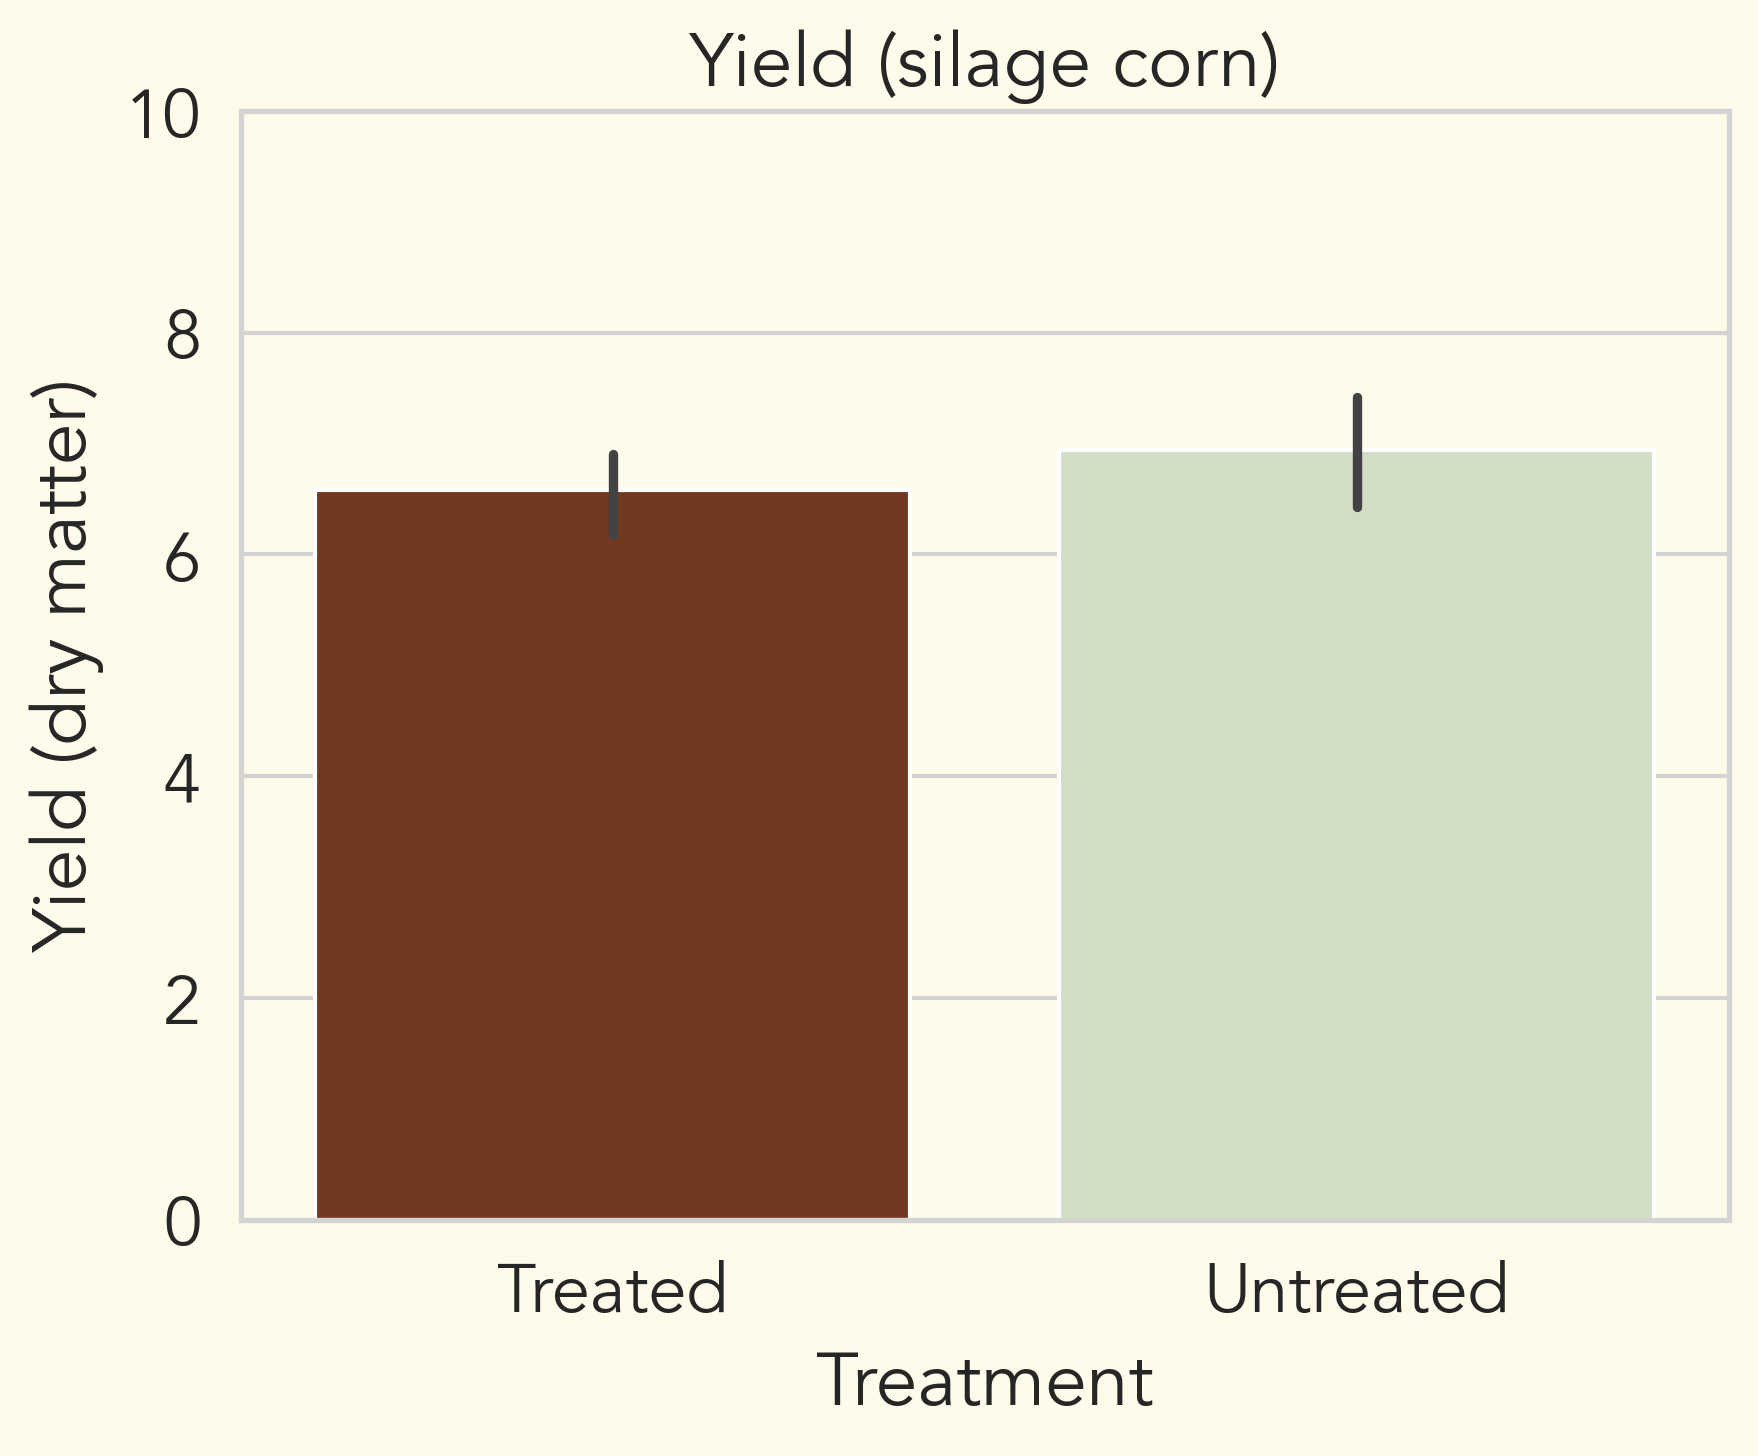

In [310]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = silage_yield_w_scm, x = 'Treatment', y = 'Yield (dry matter)', palette=palette)
ax.set_ylim(0, 10)
plt.ylabel('Yield (dry matter)')
plt.title('Yield (silage corn)')

In [71]:
soy_yield_w_scm = soy_yield[soy_yield['Field ID'].isin(sites_w_scm)]
soy_yield_w_scm

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Yield (bu/acre)
0,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Treated,57.50
1,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Untreated,54.70
2,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Treated,32.52
3,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Untreated,33.81
4,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Treated,50.99
5,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Untreated,42.18
6,Mike Stanyard,STA_FRE,10/6/2025,Harvest,Soybean,Treated,35.70
7,Mike Stanyard,STA_FRE,10/6/2025,Harvest,Soybean,Untreated,40.26
12,Janice Degni,DEG_PER_2,10/9/2025,Harvest,Soybean,Treated,64.18
13,Janice Degni,DEG_PER_2,10/9/2025,Harvest,Soybean,Untreated,58.59


In [72]:
t1 = soy_yield_w_scm.loc[soy_yield_w_scm['Treatment'] == 'Treated'].groupby('Field ID')['Yield (bu/acre)'].mean()
t2 = soy_yield_w_scm.loc[soy_yield_w_scm['Treatment'] == 'Untreated'].groupby('Field ID')['Yield (bu/acre)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=0.9533213218247036, pvalue=0.3944117842793261, df=4)

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/4034037818.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = soy_yield_w_scm, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette)


Text(0.5, 1.0, 'Yield (soybean)')

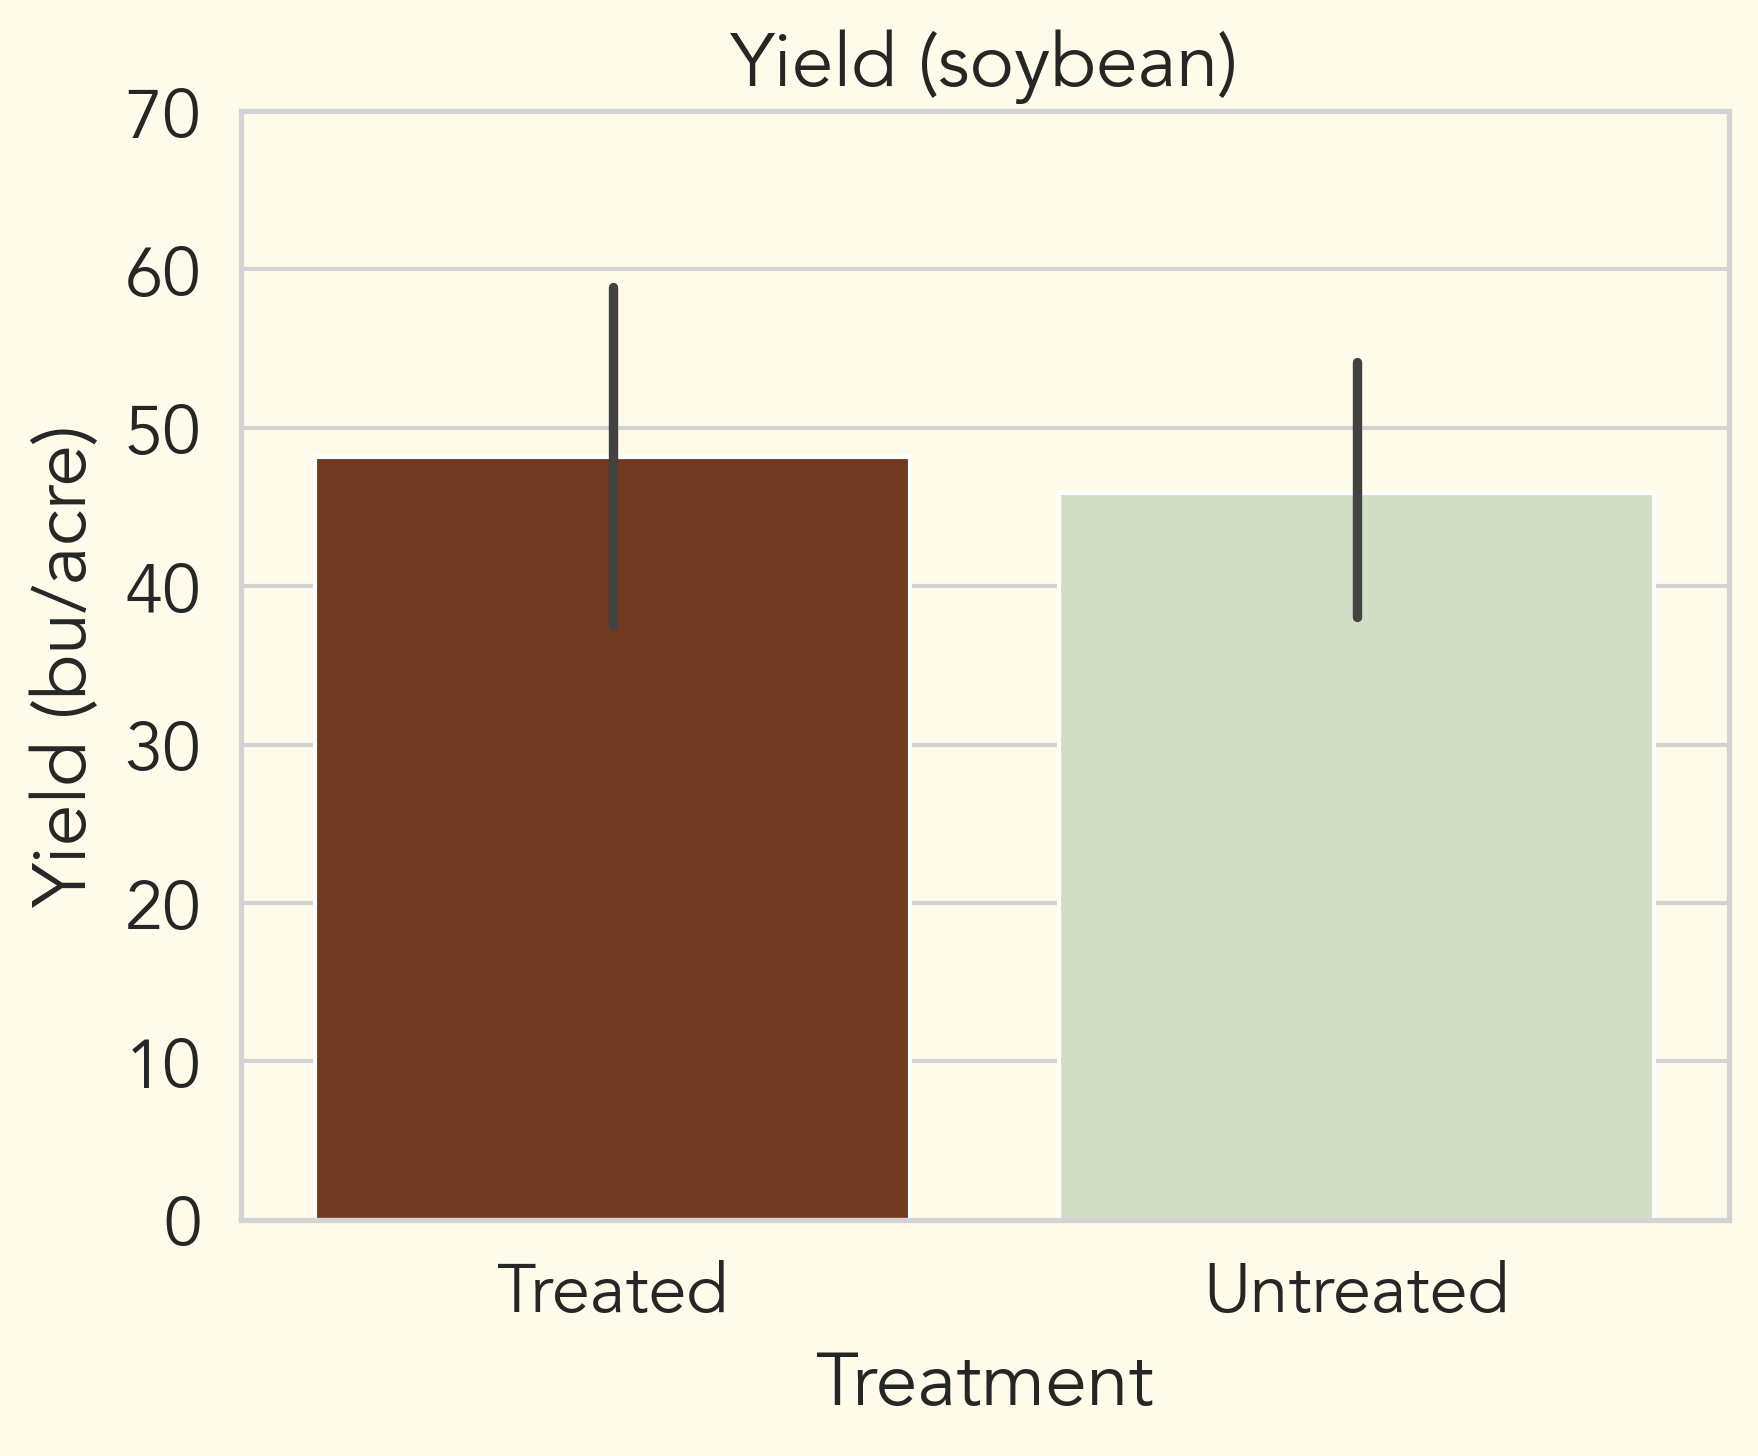

In [73]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = soy_yield_w_scm, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette)
ax.set_ylim(0, 70)
plt.ylabel('Yield (bu/acre)')
plt.title('Yield (soybean)')

Text(0, 0.5, 'Number of Observations')

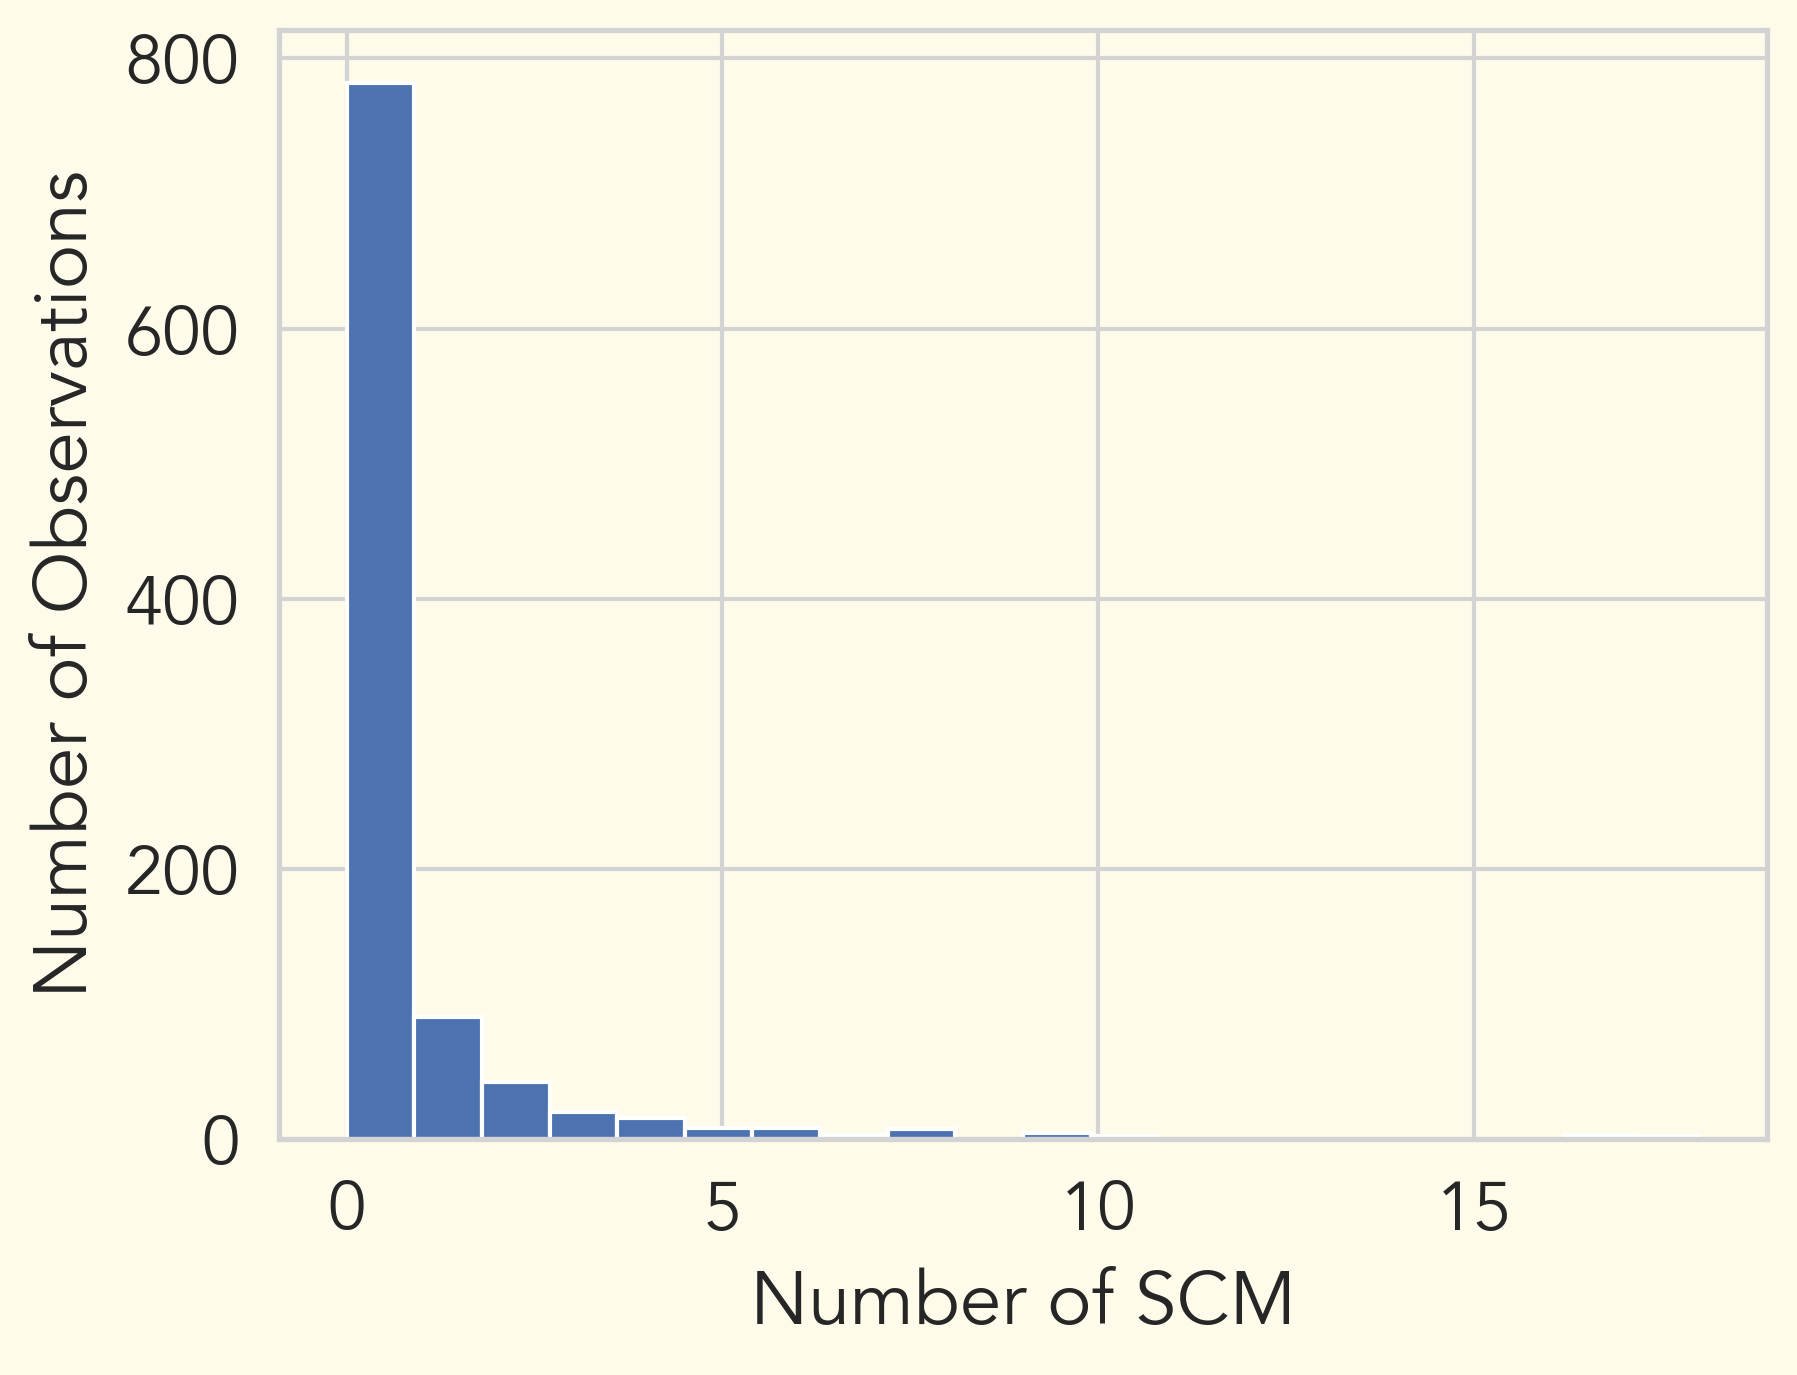

In [74]:
ax = deli_cup['Total SCM'].hist(bins=20)
plt.xlabel('Number of SCM')
plt.ylabel('Number of Observations')

Text(0, 0.5, 'Number of Observations')

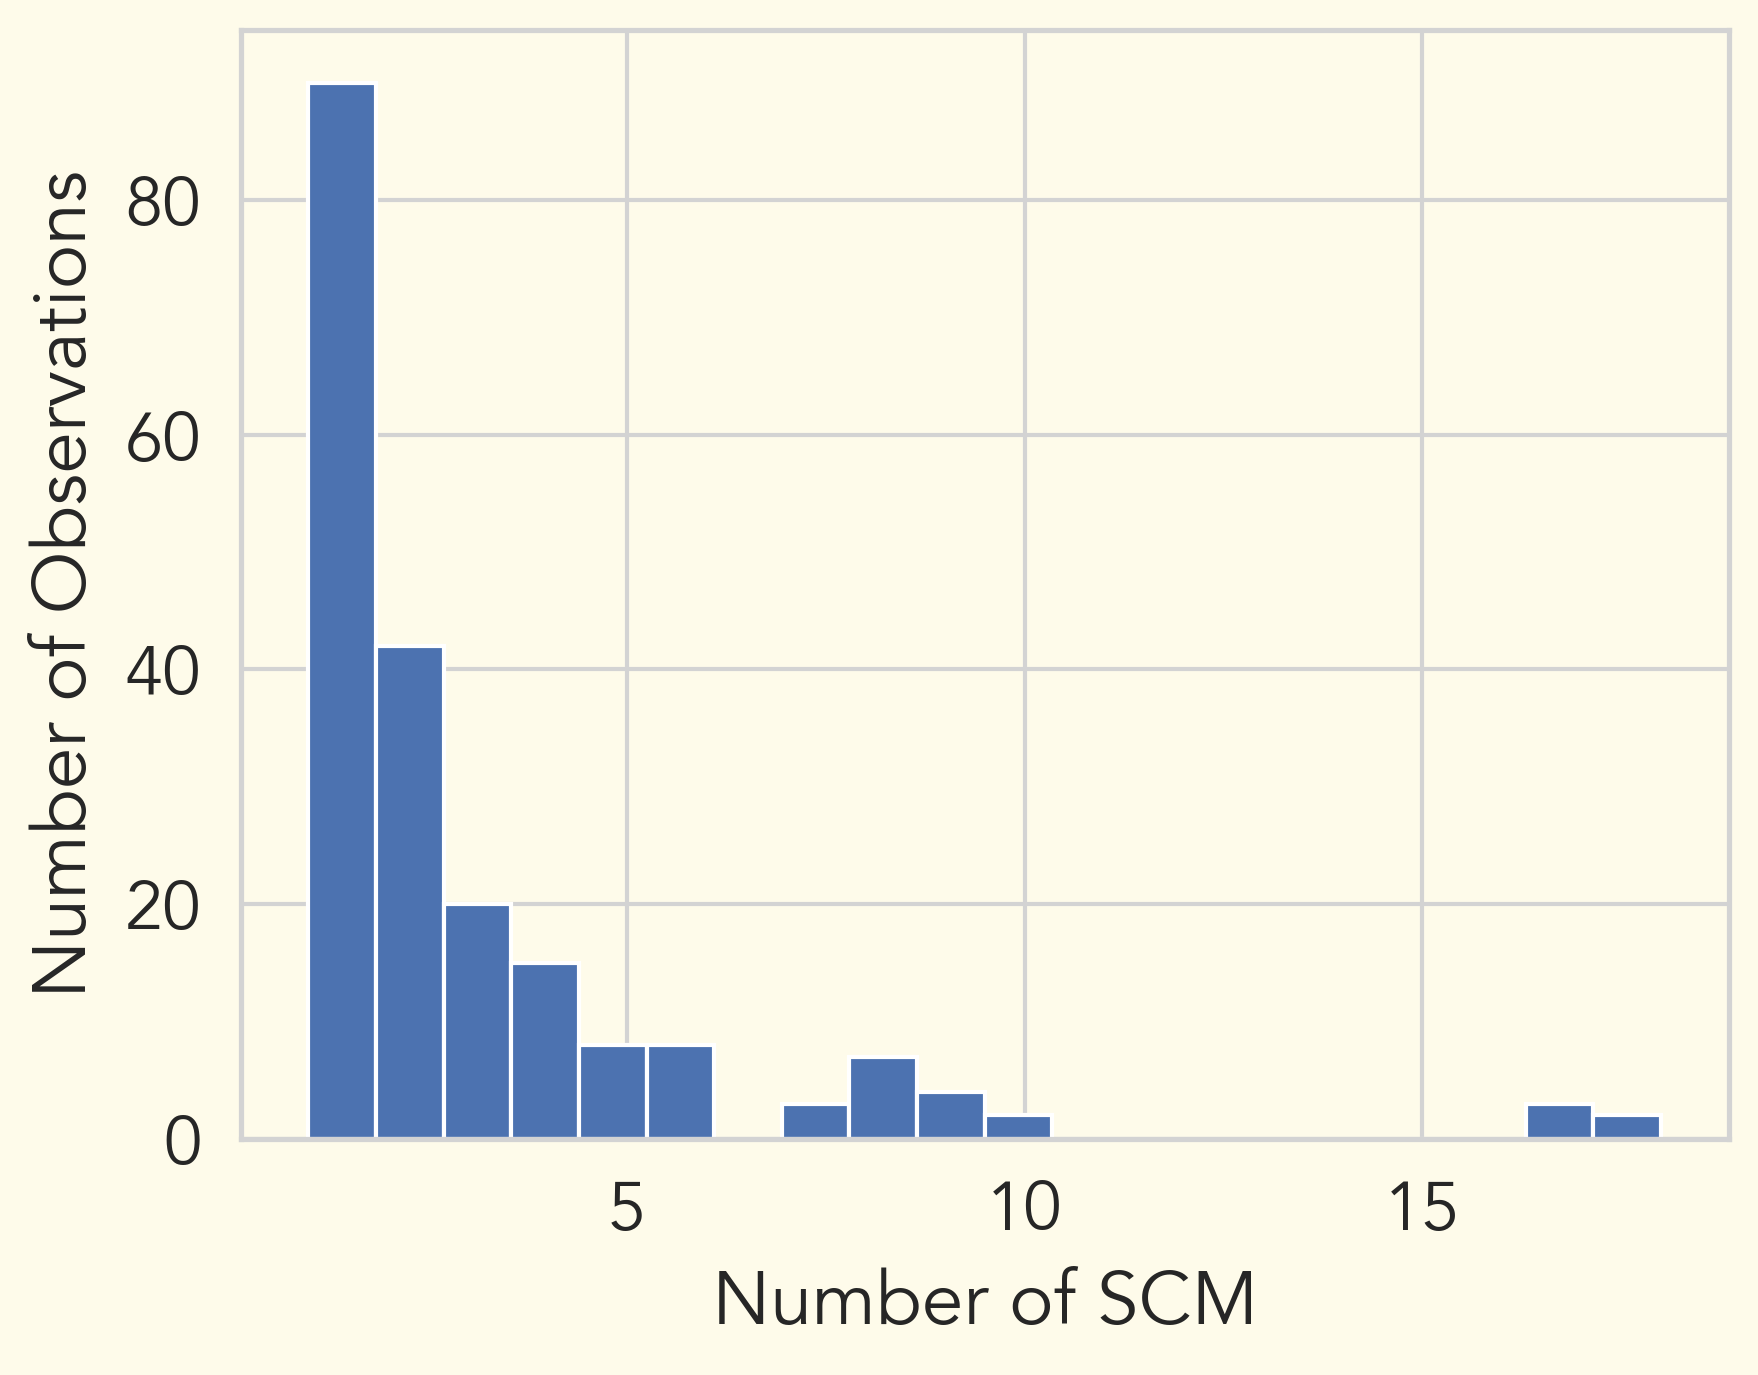

In [75]:
non_zero = deli_cup.loc[deli_cup['Total SCM'] > 0]
ax = non_zero['Total SCM'].hist(bins=20)
plt.xlabel('Number of SCM')
plt.ylabel('Number of Observations')

In [104]:
field_deli_cup

,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Crop,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes,Total SCM,Avg SCM
0,25_D_1181,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,14.0,1,0,...,1,3,0,YES,YES,Y,294,NaN,1,0.071429
1,25_D_1182,DELI,R,CER_DEL_1,Untreated,5/28/25,Field corn,14.0,0,0,...,0,0,0,NO,NO,Y,293,NaN,0,0.000000
2,25_D_1183,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,17.0,2,0,...,0,0,0,NO,NO,Y,380,NaN,2,0.117647
3,25_D_1184,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,308,NaN,0,0.000000
4,25_D_1185,DELI,R,CER_DEL_1,Untreated,5/28/25,Field corn,15.0,2,0,...,0,0,0,NO,NO,Y,51,NaN,2,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25_D_1158,DELI,R,STA_WOO,Untreated,5/23/25,Field corn,15.0,1,1,...,0,1,1,YES,NO,Y,15,NaN,2,0.133333
946,25_D_1159,DELI,R,STA_WOO,Treated,5/23/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,296,NaN,0,0.000000
947,25_D_1160,DELI,R,STA_WOO,Treated,5/23/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,295,NaN,0,0.000000
948,25_D_1161,DELI,R,STA_WOO,Untreated,5/23/25,Field corn,15.0,3,0,...,1,0,1,NO,NO,Y,3,NaN,3,0.200000


In [312]:
kuh_col_scm = field_deli_cup.loc[field_deli_cup['Field ID'] == 'KUH_COL']
kuh_col_scm = kuh_col_scm.groupby('Treatment').mean('Avg SCM').reset_index()
kuh_col_scm['Crop'] = 'Field corn'
kuh_col_scm

,Treatment,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,SCM Seed,Phorid Seed,Other Damage,Wireworms,Other Seeds,Total SCM,Avg SCM,Crop
0,Treated,15.000000,0.555556,0.000000,0.000000,0.0,0.0,0.444444,0.111111,0.555556,0.025000,Field corn
1,Untreated,15.111111,1.333333,0.111111,0.222222,0.0,0.0,0.555556,0.333333,1.444444,0.094907,Field corn


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/303818163.py:13: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=kuh_col_scm, x='Crop', y='Avg SCM', hue='Treatment', dodge=True, palette= ['yellow'], size = 15, jitter=False,


[]

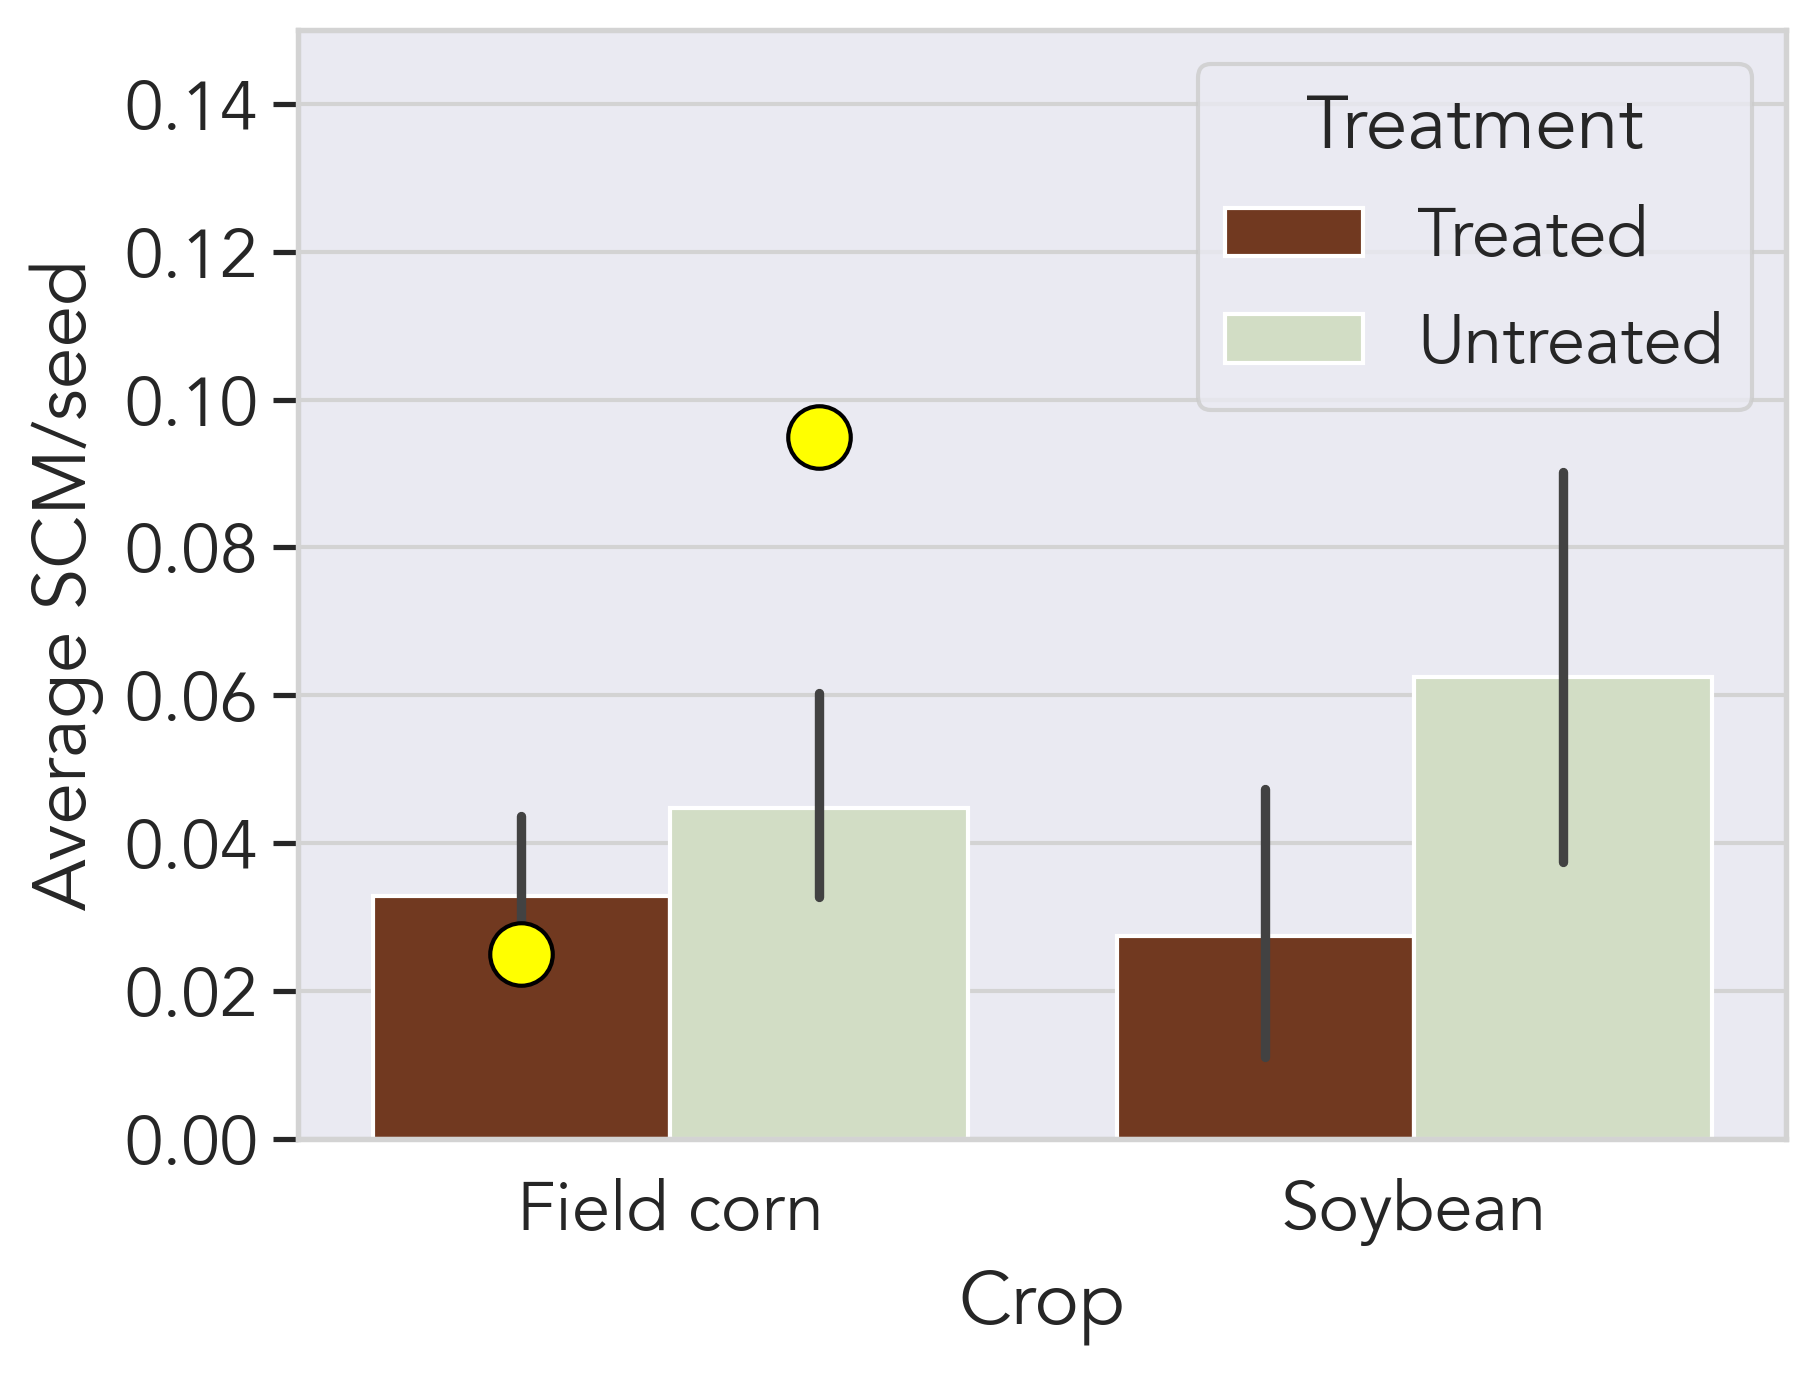

In [313]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

#sns.swarmplot(x="Crop", y="Avg SCM", data=field_deli_cup, color="black", hue = 'Treatment', dodge = True, size=2, alpha=0.7, hue_order=hue_order)

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = field_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette, hue_order=hue_order)
plt.ylabel('Average SCM/seed')
plt.ylim(0, 0.15)

ax2 = ax.twinx()
sns.stripplot(data=kuh_col_scm, x='Crop', y='Avg SCM', hue='Treatment', dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 0.15)
plt.ylabel('')
ax2.set_yticks([])



In [314]:
kuh_col_stand = corn_stand.loc[corn_stand['Field ID'] == 'KUH_COL']
kuh_col_stand = kuh_col_stand.groupby('Treatment').mean('Stand count').reset_index()
kuh_col_stand['Treatment'] = kuh_col_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
kuh_col_stand['Crop'] = 'Field corn'
kuh_col_stand

,Treatment,Section number,Stand count,Crop
0,Untreated,5.0,21.944444,Field corn
1,Treated,5.0,5.888889,Field corn


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1012832194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1012832194.py:14: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=kuh_col_stand, x='Crop', y='Stand count', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,


[]

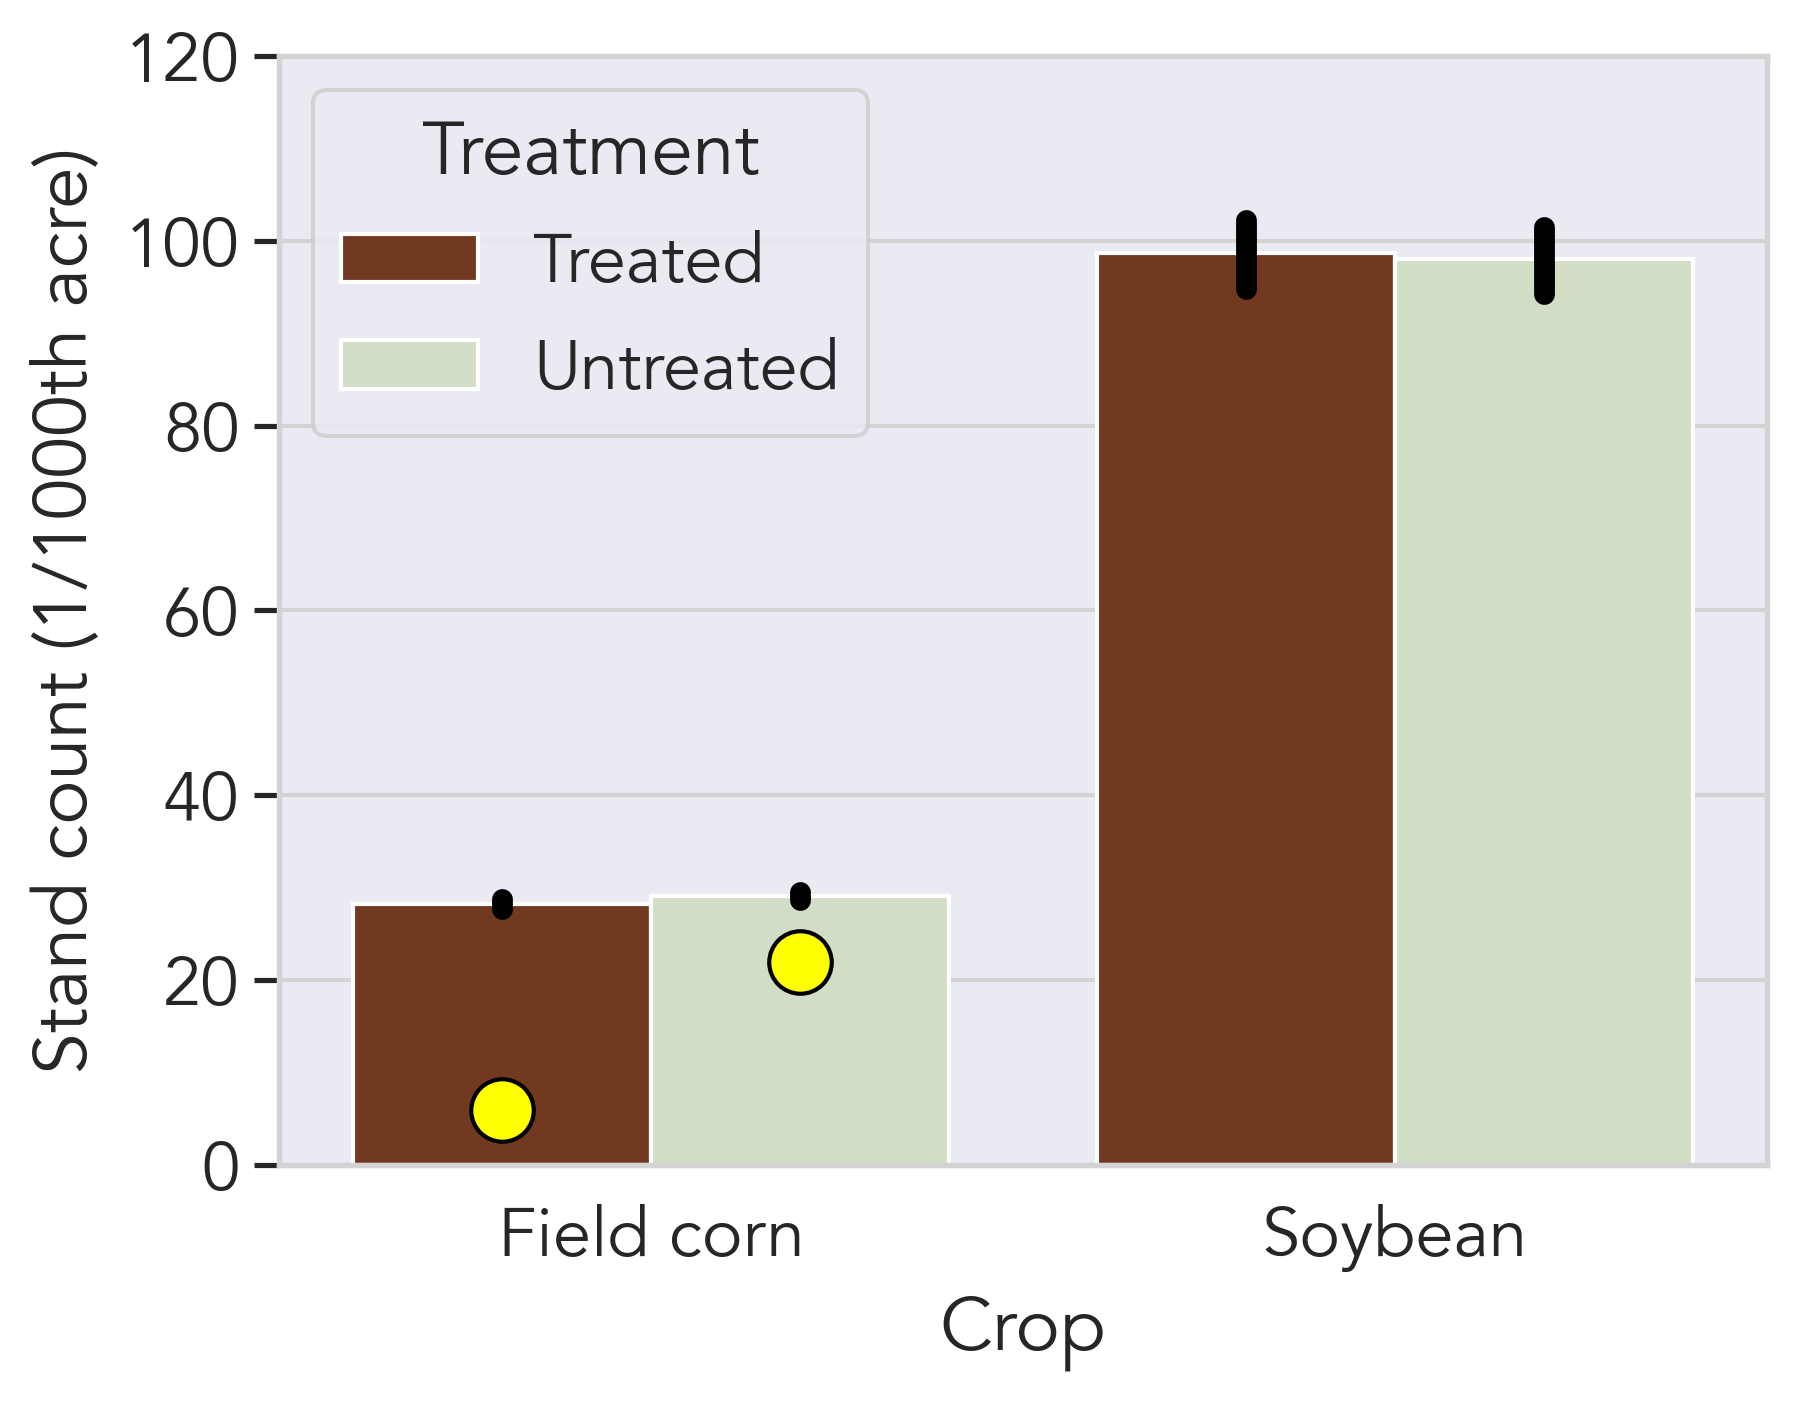

In [315]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = field_crop_stand, x = 'Crop', y = 'Stand count', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order, err_kws={'linewidth': 5, 'color':'black'})
plt.ylim(0, 120)
plt.ylabel('Stand count (1/1000th acre)')


ax2 = ax.twinx()
sns.stripplot(data=kuh_col_stand, x='Crop', y='Stand count', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 120)
plt.ylabel('')
ax2.set_yticks([])

In [316]:
kuh_col_yield = silage_yield.loc[silage_yield['Field ID'] == 'KUH_COL']
kuh_col_yield = kuh_col_yield.groupby('Treatment').mean('Yield (dry matter)').reset_index()
kuh_col_yield['Treatment'] = kuh_col_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
kuh_col_yield['Crop'] = 'Field corn'
kuh_col_yield

,Treatment,Yield (tons/acre),Yield (dry matter),Crop
0,Treated,18.7,6.73,Field corn
1,Untreated,18.5,6.43,Field corn


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1118413389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1118413389.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=kuh_col_yield, x='Treatment', y='Yield (dry matter)', palette= ['yellow'], size = 15, jitter=False,
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1118413389.py:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=kuh_col_yield, x='Tr

[]

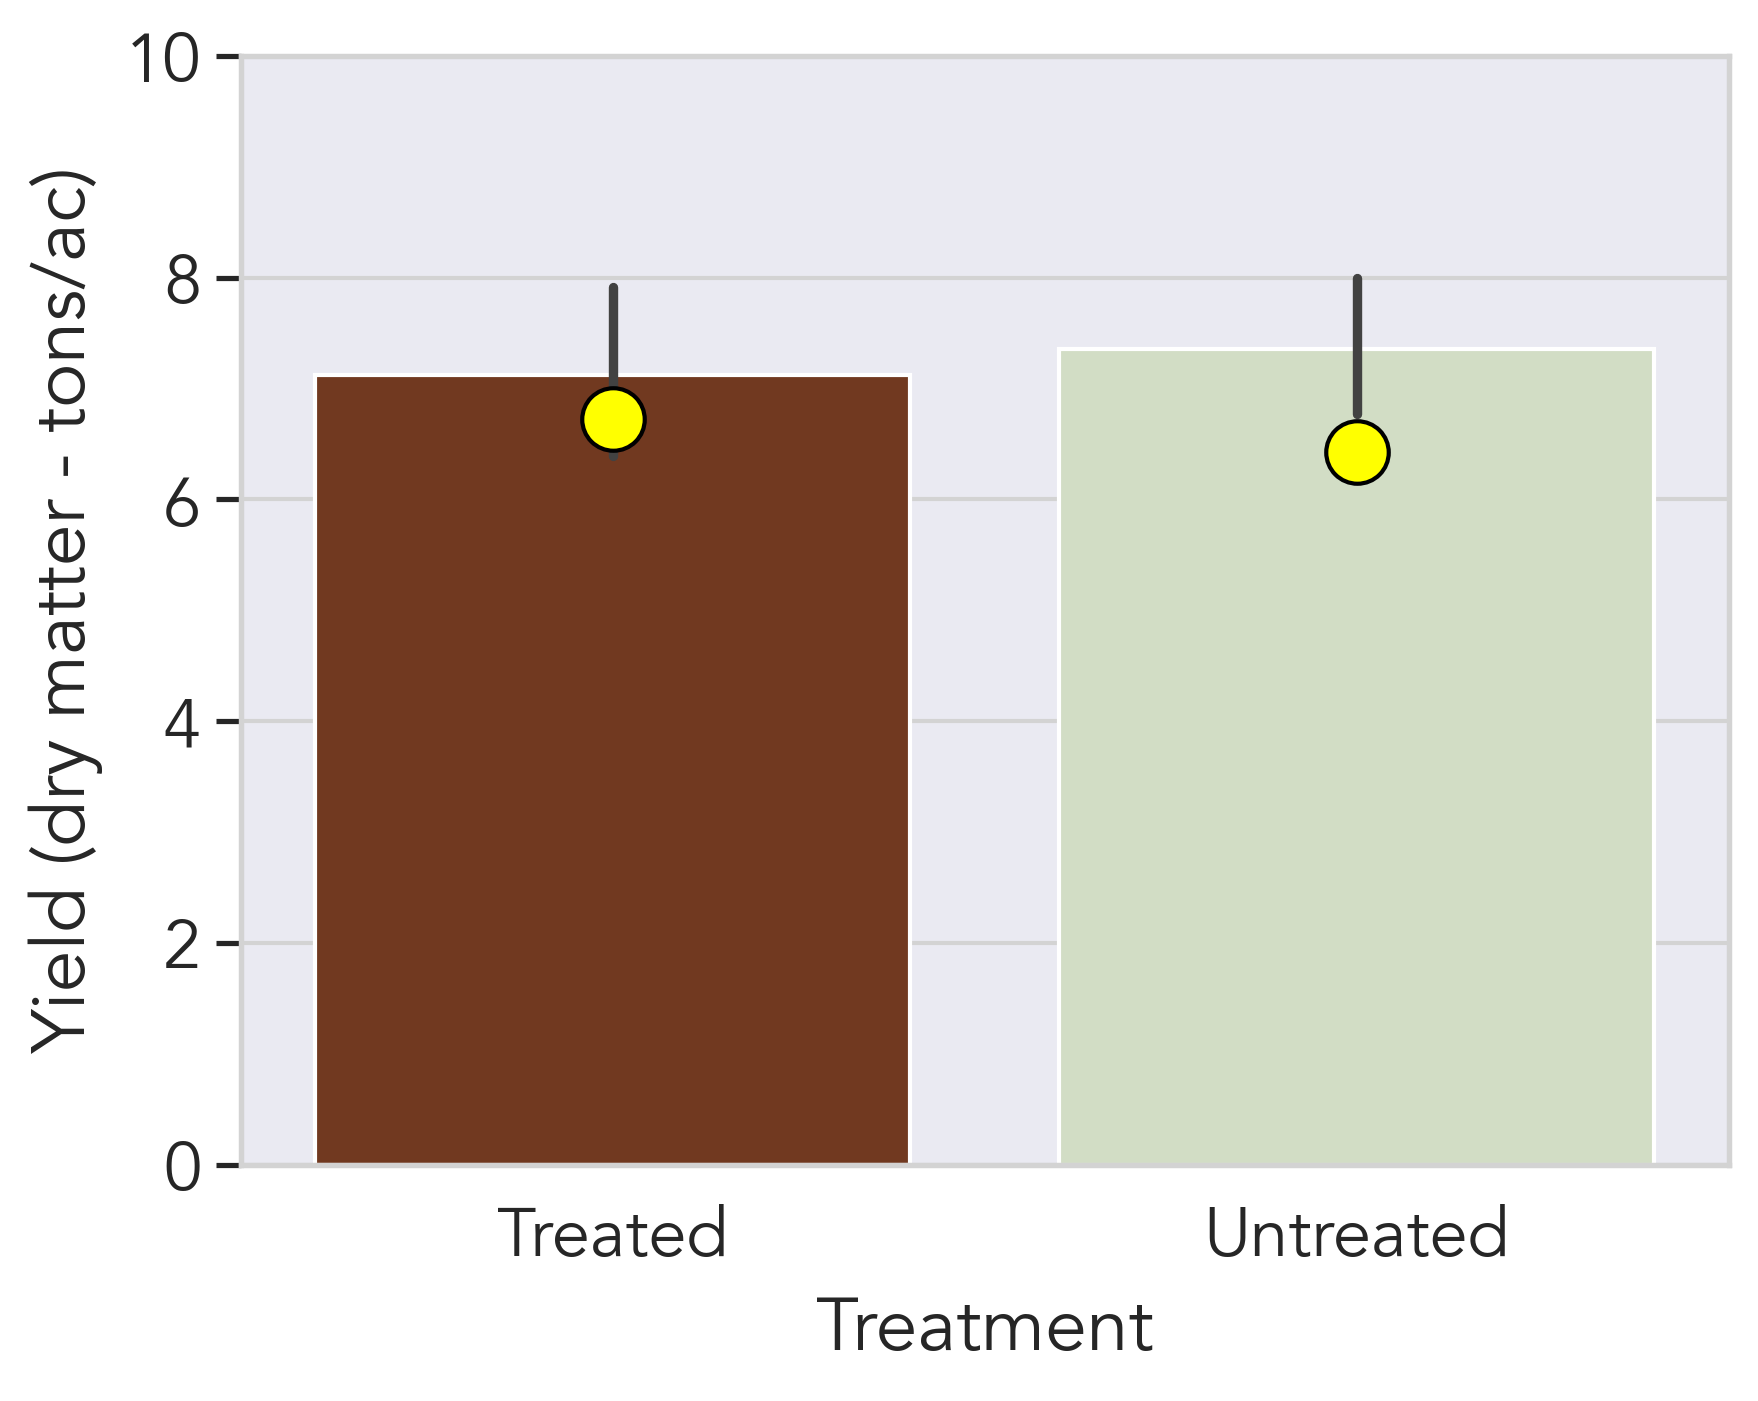

In [328]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette)
ax.set_ylim(0, 10)
plt.ylabel('Yield (dry matter - tons/ac)')
#plt.title('Yield (silage corn)')

ax2 = ax.twinx()
sns.stripplot(data=kuh_col_yield, x='Treatment', y='Yield (dry matter)', palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 10)
plt.ylabel('')
ax2.set_yticks([])

In [168]:
biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.70,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.80,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.40,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.60,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
625,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,5,V2/V3,15,92.24,Corrected for 7.59 g bag,99.83
626,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,6,V2/V3,15,131.41,Corrected for 7.59 g bag,139.00
627,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,7,V2/V3,15,116.41,Corrected for 7.59 g bag,124.00
628,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,8,V2/V3,15,125.60,Corrected for 7.59 g bag,133.19


In [318]:
kuh_col_biomass = biomass.loc[biomass['Field ID'] == 'KUH_COL']
kuh_col_biomass = kuh_col_biomass.groupby('Treatment').mean('Total weight (g)').reset_index()
kuh_col_biomass['Treatment'] = kuh_col_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
kuh_col_biomass['Crop'] = 'Field corn'
kuh_col_biomass['Avg weight'] = kuh_col_biomass['Total weight (g)'] / kuh_col_biomass['Number of plants']
kuh_col_biomass

,Treatment,Section number,Number of plants,Total weight (g),Untared weight (g),Crop,Avg weight
0,Untreated,5.0,15.0,64.877778,NaN,Field corn,4.325185
1,Treated,5.0,15.0,81.188889,NaN,Field corn,5.412593


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/1921597881.py:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=kuh_col_biomass, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,


[]

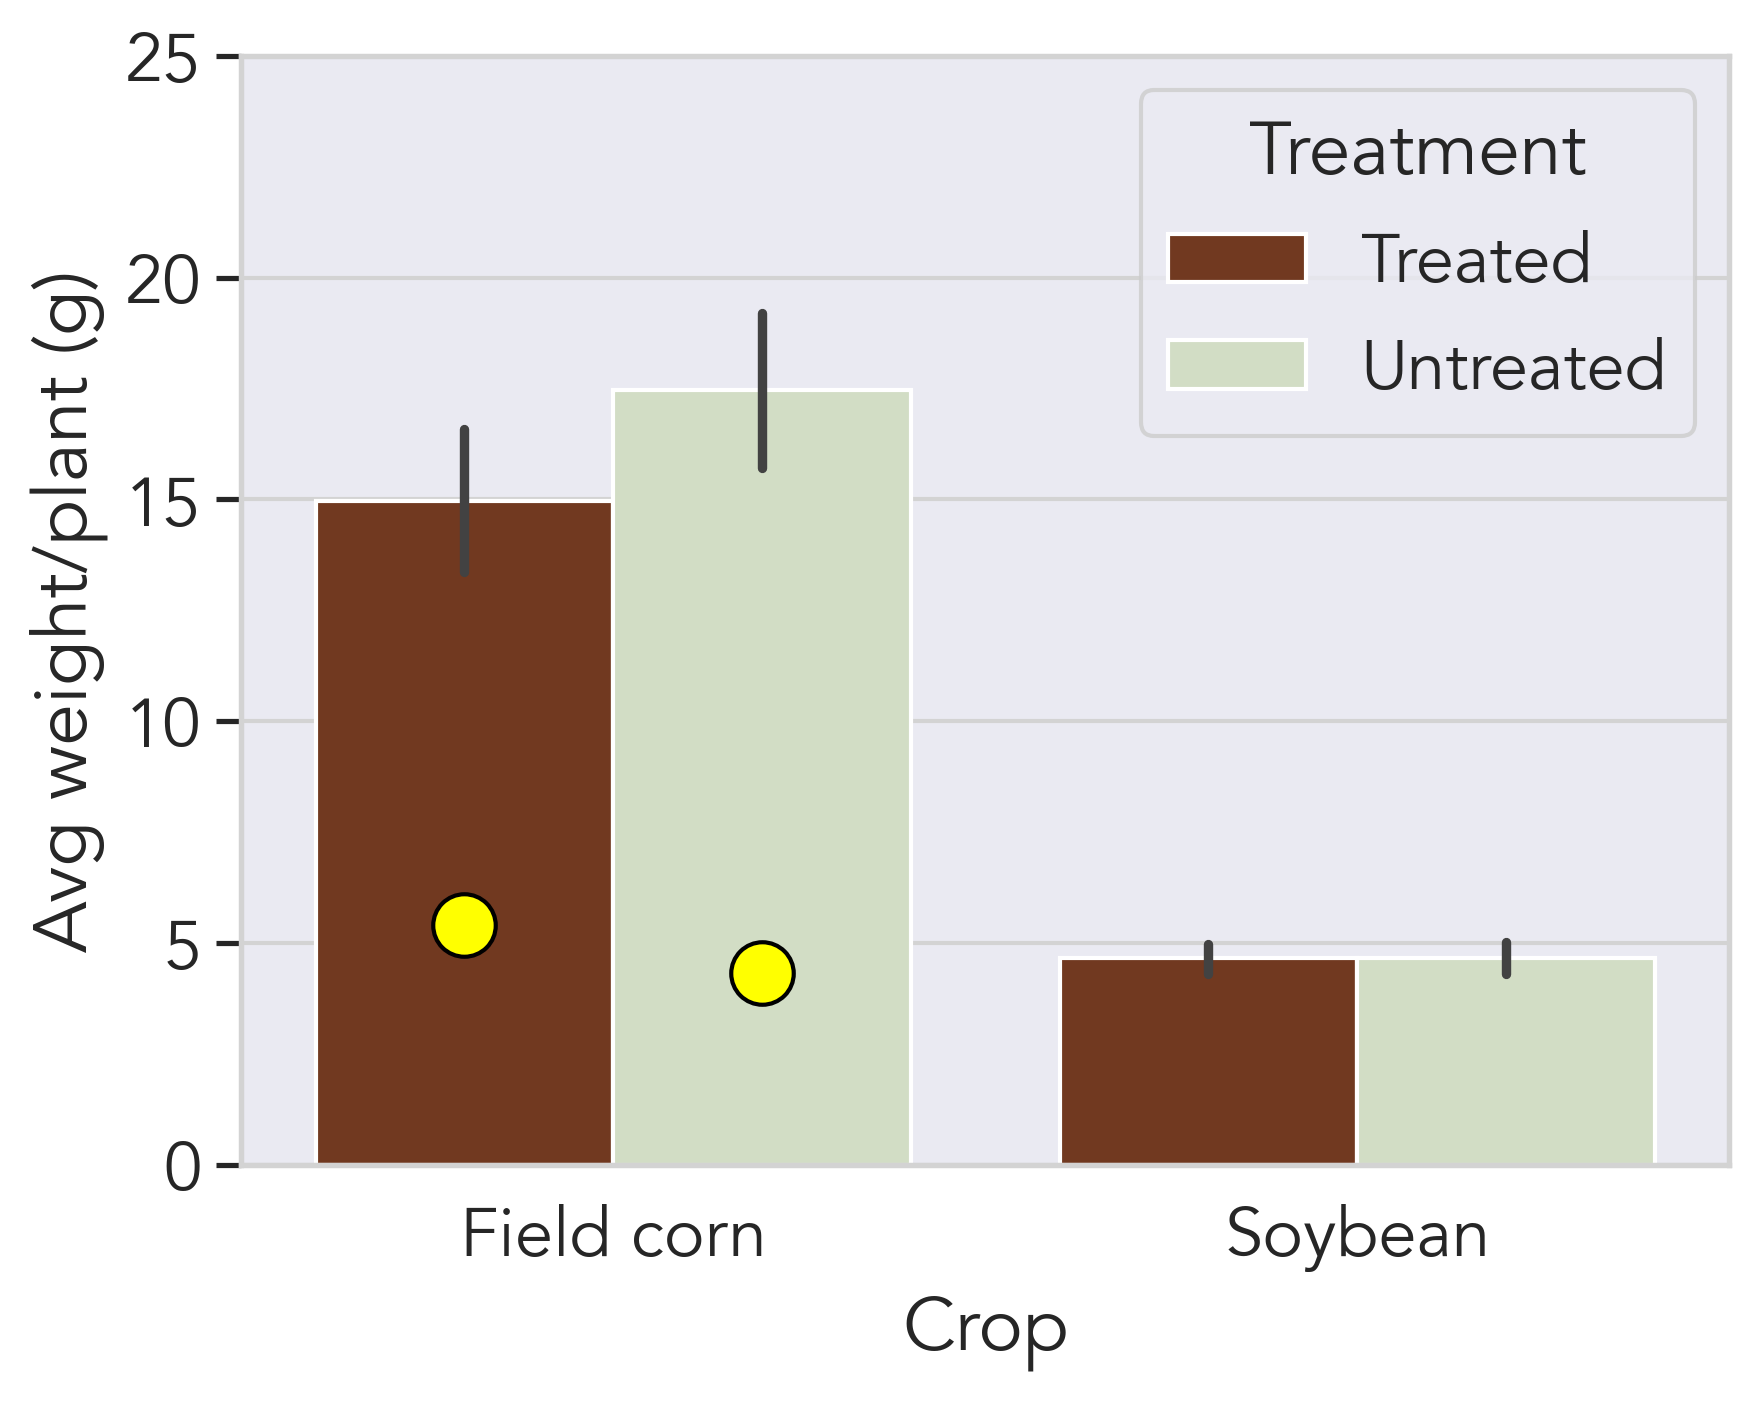

In [319]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

biomass['Treatment'] = biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
biomass['Avg weight'] = biomass['Total weight (g)'] / biomass['Number of plants']

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, order=['Field corn', 'Soybean'], hue_order=hue_order)
plt.ylim(0, 25)
plt.ylabel('Avg weight/plant (g)')



ax2 = ax.twinx()
sns.stripplot(data=kuh_col_biomass, x='Crop', y='Avg weight', hue='Treatment', hue_order = hue_order, dodge=True, palette= ['yellow'], size = 15, jitter=False,
              edgecolor='black', linewidth=1, ax=ax2, legend=False)
plt.ylim(0, 25)
plt.ylabel('')
ax2.set_yticks([])

In [321]:
silage_yield_pivot = silage_yield.pivot(index='Field ID', columns= 'Treatment', values='Yield (dry matter)')
silage_yield_pivot['Treated - Untreated'] = silage_yield_pivot['Treated'] - silage_yield_pivot['Untreated']
silage_yield_pivot = silage_yield_pivot.reset_index()
silage_yield_pivot = silage_yield_pivot.sort_values('Treated - Untreated')
silage_yield_pivot

Treatment,Field ID,Treated,Untreated,Treated - Untreated
5,LET_MAC,5.39,7.71,-2.32
6,LET_STE,4.40,5.94,-1.54
2,DEG_PER_1,6.19,7.52,-1.33
7,LET_VER,7.30,8.32,-1.02
10,MIL_CRO_2,6.75,7.32,-0.57
13,STA_MAC,6.93,6.95,-0.02
12,SMI_LAT,6.49,6.42,0.07
1,DEG_FOU,7.68,7.53,0.15
4,KUH_COL,6.73,6.43,0.30
8,LET_WAT,10.15,9.76,0.39


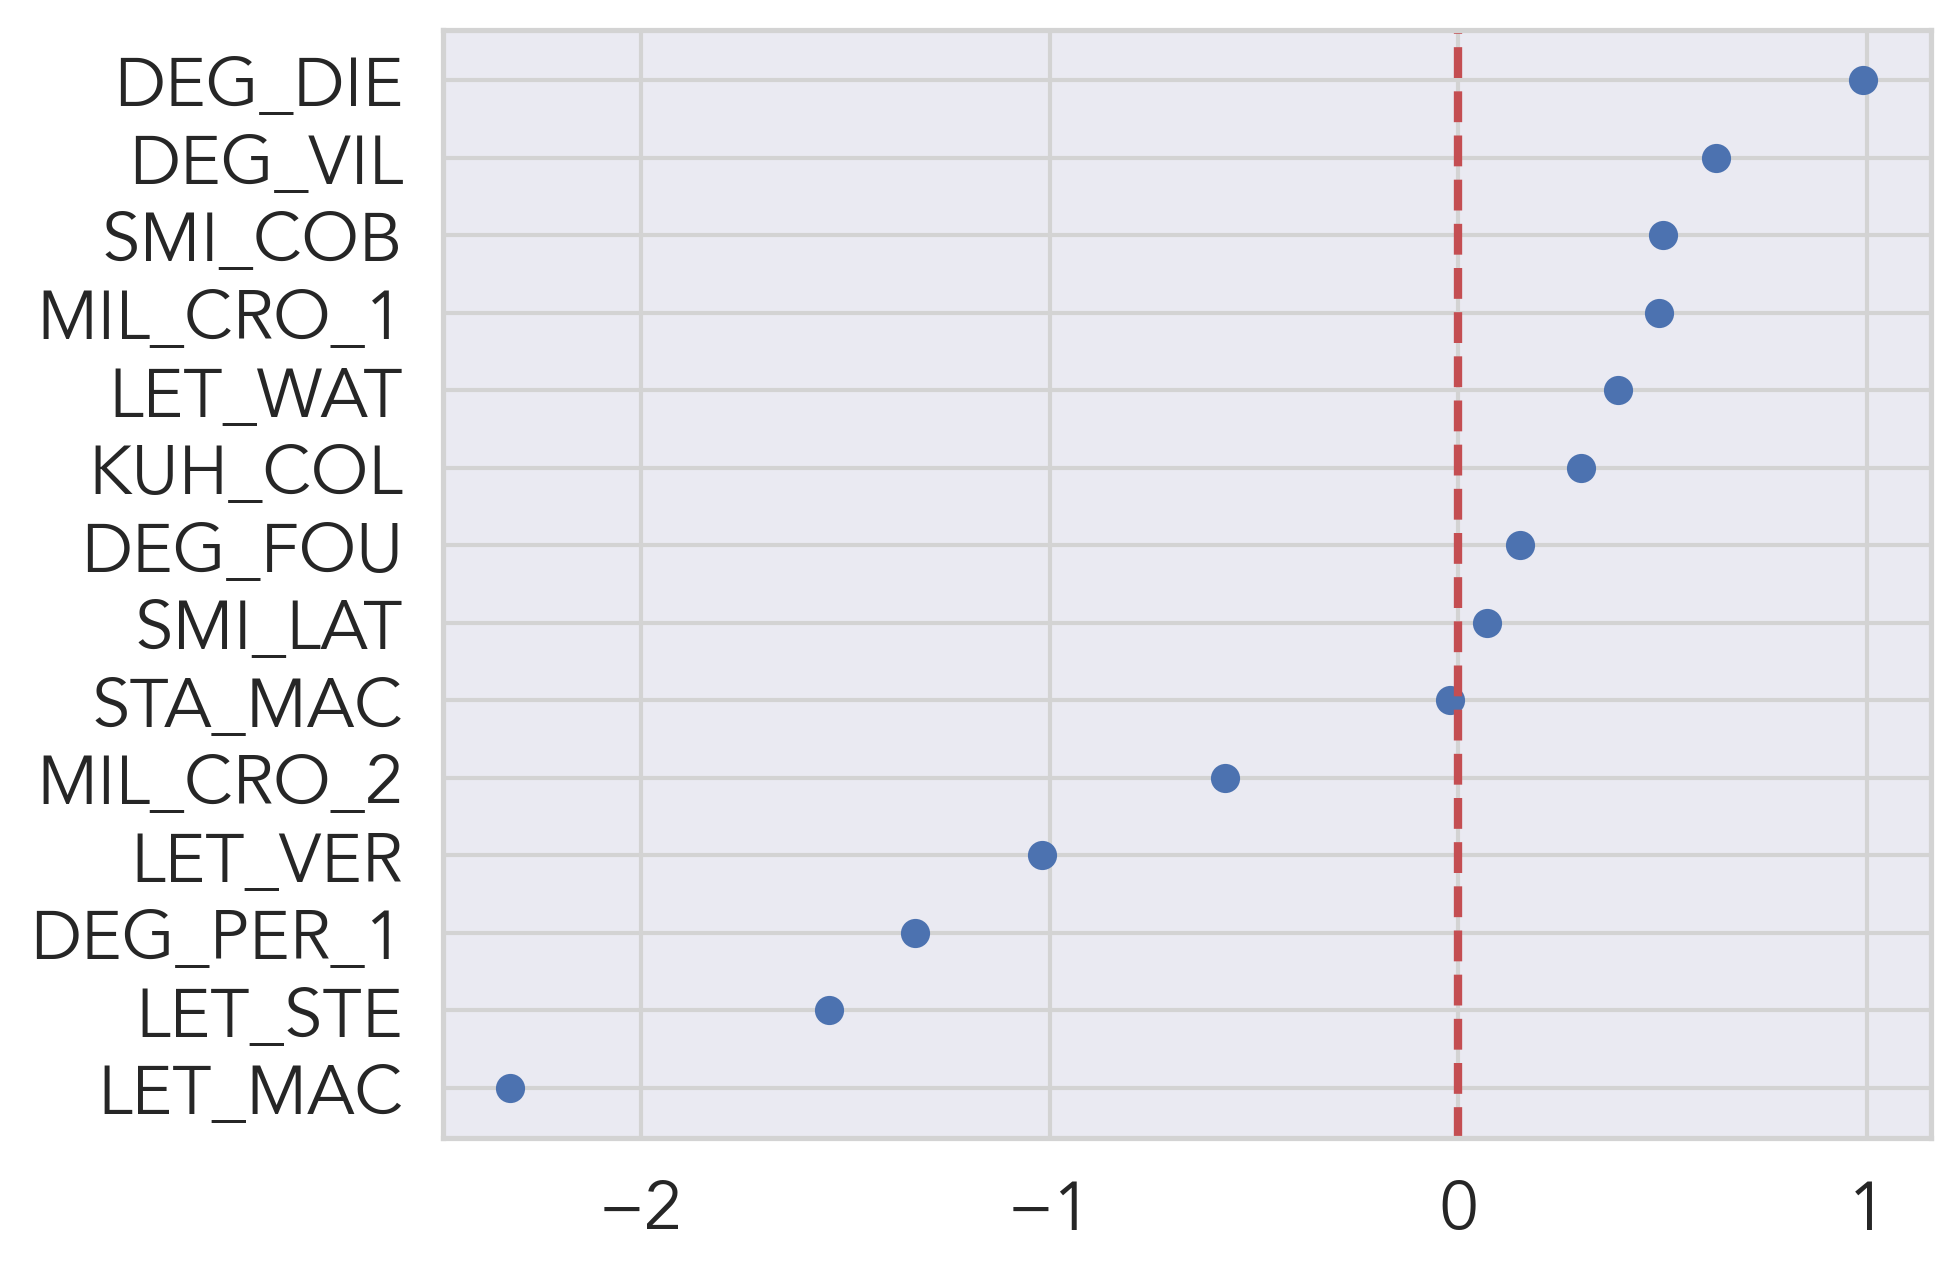

In [322]:
fig, ax = plt.subplots()
ax.scatter(silage_yield_pivot['Treated - Untreated'], silage_yield_pivot['Field ID'])
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)

In [323]:
field_corn_deli_cup = field_deli_cup.loc[field_deli_cup['Crop'] == 'Field corn']
field_corn_deli_cup = field_corn_deli_cup.groupby(['Field ID', 'Treatment'])['Avg SCM'].agg([np.mean])
field_corn_deli_cup = field_corn_deli_cup.reset_index()
field_corn_deli_cup_pivot = field_corn_deli_cup.pivot(index='Field ID', columns= 'Treatment', values= ['mean'])
field_corn_deli_cup_pivot['Diff'] = field_corn_deli_cup_pivot['mean']['Treated'] - field_corn_deli_cup_pivot['mean']['Untreated']
field_corn_deli_cup_pivot = field_corn_deli_cup_pivot.reset_index().sort_values('Diff')
field_corn_deli_cup_pivot

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/2143490544.py:2: FutureWarning: The provided callable <function mean at 0x111df72e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  field_corn_deli_cup = field_corn_deli_cup.groupby(['Field ID', 'Treatment'])['Avg SCM'].agg([np.mean])


Field ID      mean                Diff
Treatment              Treated Untreated          
32           STA_WOO  0.000000  0.246032 -0.246032
24           SMI_LAT  0.024501  0.101961 -0.077459
8            KUH_COL  0.025000  0.094907 -0.069907
23         SMI_HOF_1  0.000000  0.066667 -0.066667
9            LET_MAC  0.048366  0.111111 -0.062745
12           LET_VER  0.196759  0.229630 -0.032870
11         LET_STE_2  0.007407  0.036410 -0.029003
18         MIL_ZIT_3  0.000000  0.028571 -0.028571
27           STA_KRE  0.044444  0.069717 -0.025272
0          CER_DEL_1  0.028416  0.051852 -0.023436
21           SMI_COB  0.000000  0.014352 -0.014352
5          DEG_LAF_1  0.000000  0.013333 -0.013333
1          CER_DEL_2  0.033333  0.043056 -0.009722
31           STA_WIL  0.150265  0.155556 -0.005291
4          DEG_FRI_1  0.006944  0.007407 -0.000463
13           LET_WAT  0.000000  0.000000  0.000000
14         MIL_CRO_1  0.000000  0.000000  0.000000
15         MIL_CRO_2  0.000000  0.000000  0.000000
29           STA_MAR  0.000000  0.000000  0.000000
19         SMI_ARN_1  0.000000  0.000000  0.000000
20           SMI_BUR  0.000000  0.000000  0.000000
3            DEG_FOU  0.000000  0.000000  0.000000
30           STA_STA  0.000000  0.000000  0.000000
22         SMI_CON_2  0.006944  0.000000  0.006944
6          DEG_PER_1  0.014815  0.007407  0.007407
17         MIL_ZIT_2  0.008333  0.000000  0.008333
25           SMI_MCC  0.008333  0.000000  0.008333
7            DEG_VIL  0.040896  0.030983  0.009913
10         LET_STE_1  0.022222  0.008333  0.013889
2            DEG_DIE  0.029630  0.007407  0.022222
26           STA_BLO  0.125926  0.081019  0.044907
28           STA_MAC  0.106349  0.037037  0.069312
16           MIL_TEL  0.148148  0.026144  0.122004

In [324]:
field_corn_deli_cup_pivot.columns = [''.join(col).strip() for col in field_corn_deli_cup_pivot.columns.values]
field_corn_deli_cup_pivot

,Field ID,meanTreated,meanUntreated,Diff
32,STA_WOO,0.000000,0.246032,-0.246032
24,SMI_LAT,0.024501,0.101961,-0.077459
8,KUH_COL,0.025000,0.094907,-0.069907
23,SMI_HOF_1,0.000000,0.066667,-0.066667
9,LET_MAC,0.048366,0.111111,-0.062745
12,LET_VER,0.196759,0.229630,-0.032870
11,LET_STE_2,0.007407,0.036410,-0.029003
18,MIL_ZIT_3,0.000000,0.028571,-0.028571
27,STA_KRE,0.044444,0.069717,-0.025272
0,CER_DEL_1,0.028416,0.051852,-0.023436


In [325]:
field_corn_deli_cup_se = pd.DataFrame(field_deli_cup.loc[field_deli_cup['Crop'] == 'Field corn'].groupby('Field ID')['Avg SCM'].agg(np.std))
field_corn_deli_cup_se = field_corn_deli_cup_se.reset_index().rename(columns={'Avg SCM': 'std'})
field_corn_deli_cup_se

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_2672/198579319.py:1: FutureWarning: The provided callable <function std at 0x111df7420> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  field_corn_deli_cup_se = pd.DataFrame(field_deli_cup.loc[field_deli_cup['Crop'] == 'Field corn'].groupby('Field ID')['Avg SCM'].agg(np.std))


,Field ID,std
0,CER_DEL_1,0.085158
1,CER_DEL_2,0.056596
2,DEG_DIE,0.038301
3,DEG_FOU,0.000000
4,DEG_FRI_1,0.020897
5,DEG_LAF_1,0.021559
6,DEG_PER_1,0.025565
7,DEG_VIL,0.053724
8,KUH_COL,0.120418
9,LET_MAC,0.115137


In [326]:
field_corn_deli_cup_pivot = field_corn_deli_cup_pivot.merge(field_corn_deli_cup_se, on='Field ID')
field_corn_deli_cup_pivot

,Field ID,meanTreated,meanUntreated,Diff,std
0,STA_WOO,0.000000,0.246032,-0.246032,0.178923
1,SMI_LAT,0.024501,0.101961,-0.077459,0.090383
2,KUH_COL,0.025000,0.094907,-0.069907,0.120418
3,SMI_HOF_1,0.000000,0.066667,-0.066667,0.141421
4,LET_MAC,0.048366,0.111111,-0.062745,0.115137
5,LET_VER,0.196759,0.229630,-0.032870,0.298136
6,LET_STE_2,0.007407,0.036410,-0.029003,0.042916
7,MIL_ZIT_3,0.000000,0.028571,-0.028571,0.048507
8,STA_KRE,0.044444,0.069717,-0.025272,0.084433
9,CER_DEL_1,0.028416,0.051852,-0.023436,0.085158


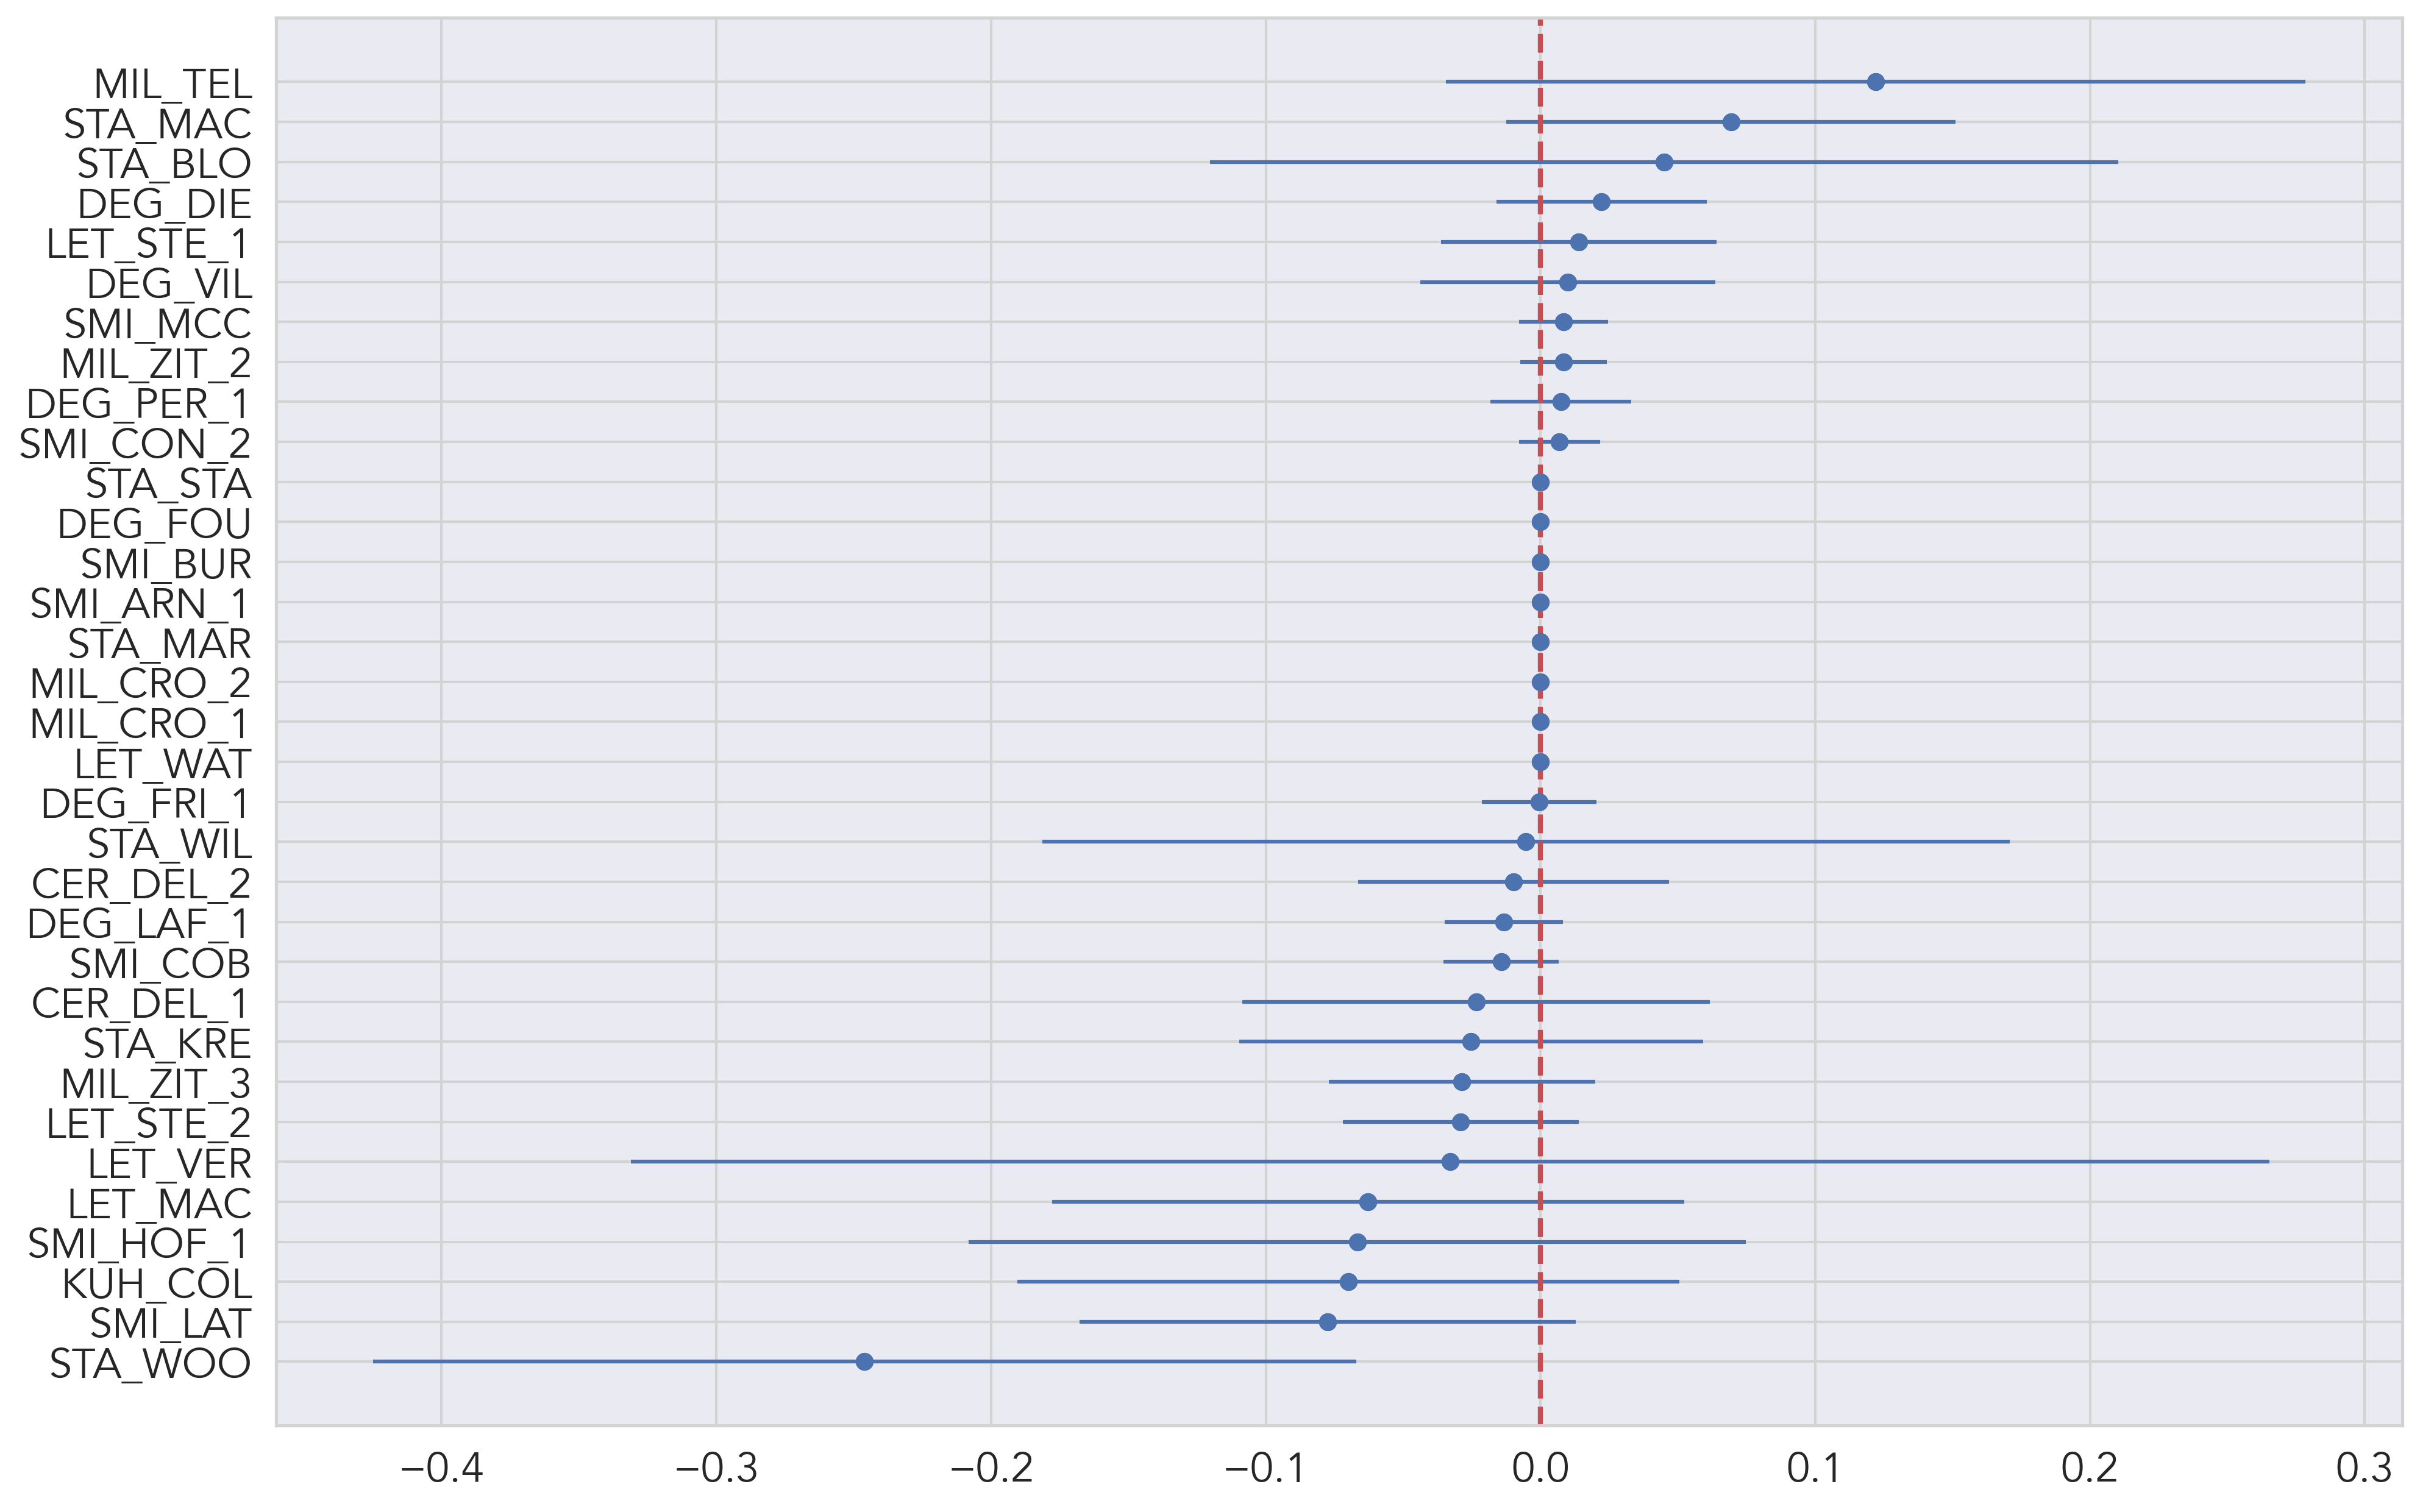

In [327]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 24})

plt.scatter(field_corn_deli_cup_pivot['Diff'], field_corn_deli_cup_pivot['Field ID'])
plt.errorbar(field_corn_deli_cup_pivot['Diff'], field_corn_deli_cup_pivot['Field ID'], xerr=field_corn_deli_cup_pivot['std'], fmt="o")
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)


# Average Planting Temperatures